## Evaluate the Match Results, Part B

More poking and prodding.

The next three cells repeats part A, so I don't comment on them here.

In [1]:
import time, pickle, glob, os
from matching_functions import *

BIBLE_SHINGLE_FOLDER = '/home/spenteco/text_reuse.HOME/bible_pickles/'
EEBO_SHINGLE_FOLDER = '/home/spenteco/0/eebo_shingled/'
RESULTS_FOLDER = '/home/spenteco/0/bible_matches/'
METADATA_FILE = 'metadata/EEBO_metadata.tsv'

metadata = load_metadata(METADATA_FILE)
            
def get_metadata_for_id(tcp_id):
    
    year = 'None'
    author = None
    title = None

    try:
        year = metadata[tcp_id]['year']
        author = metadata[tcp_id]['author'].split('|')[0][:30]
        title = metadata[tcp_id]['title'][:40]
    except KeyError:
        pass
    
    return year, author, title

In [2]:
n_with_none = 0
n_with_some = 0

all_quotation_data = []

for p in glob.glob('/home/spenteco/0/bible_matches/*.pickle'):
        
    tcp_id = p.split('/')[-1].split('.')[0]
    
    if os.stat(p).st_size == 6:
        n_with_none += 1
        all_quotation_data.append([tcp_id, []])
    else:
        n_with_some += 1
    
        f = open(p, 'rb')
        data = pickle.load(f)
        f.close()
        
        all_quotation_data.append([tcp_id, data])
    
print('n_with_none', n_with_none, 
      'n_with_some', n_with_some, 
      'len(all_quotation_data)', len(all_quotation_data))

n_with_none 36370 n_with_some 23962 len(all_quotation_data) 60332


In [3]:
print(all_quotation_data[0])

['A09675', [['/home/spenteco/text_reuse.HOME/bible_pickles/KJV_OTA.pickle', 'Psalms.17.14', 'From men which are thy hand, O LORD, from men of the world, which have their portion in this life, and whose belly thou fillest with thy hid treasure: they are full of children, and leave the rest of their substance to their babes.', ['men which are thy hand, O LORD, from men of the world, which have their portion in this life, and whose belly thou fillest with thy hid treasure: they are full of children, and leave the rest of their substance', 'men by thine hand O Lord, from men of the world, who have their portion in this life, whose bellies thou fillest with thine hidde treasures: their children have enough, and leave the rest of their substance', [2, 86], [5502, 5579]]], ['/home/spenteco/text_reuse.HOME/bible_pickles/KJV_OTA.pickle', 'Psalms.73.2', 'But as for me, my feet were almost gone; my steps had well nigh slipped.', ['feet were almost gone; my steps had well nigh slipped', 'feete wer

### Lard in additional data

Two cells earlier, I created all_quotation_data, which was all the results of matching.

Here, I add some data.  Most of which I don't believe I use.  But I do add metadata, so I can tell which year each EEBO-TCP text was published, and thus when each quotes the Bible.

In [4]:
all_source_files = {}

for a in range(0, len(all_quotation_data)):
    
    all_verses = []
    all_source_counts = {'A10675': 0, 'A97378': 0, 'KJV_OTA': 0}
    
    for v in all_quotation_data[a][1]:
        
        source_file = v[0].split('/')[-1].split('.')[0]
        all_source_counts[source_file] += 1
        
        try:
            all_source_files[source_file] += 1
        except KeyError:
            all_source_files[source_file] = 1
            
        all_verses.append((source_file, v[1]))
        
    
    all_verses = sorted(list(set(all_verses)))
    all_quotation_data[a].append(all_verses)
    all_quotation_data[a].append(get_metadata_for_id(all_quotation_data[a][0]))
    all_quotation_data[a].append(all_source_counts)
    
print(all_source_files)

{'KJV_OTA': 1288578, 'A10675': 738215, 'A97378': 1291991}


### Well, this is embarrassing

I print out a little of the freshly larded all_quotation_data, because I've lost track of what I had just created.

In [5]:
from collections import defaultdict

n_quotation_hash = defaultdict(int)

for a in all_quotation_data:
    n_quotation_hash[len(a[2])] += 1
    
#print()
#for k in sorted(n_quotation_hash.keys()):
#    print('n verses quoted', k, 'n texts:', n_quotation_hash[k])
    
print()
for a in all_quotation_data:
    if len(a[2]) == 338:
        print()
        print(0, str(a[0])[:80])
        print(1, str(a[1])[:80])
        print(2, str(a[2])[:80])
        print(3, str(a[3])[:80])
        print(4, str(a[4])[:80])



0 B13520
1 [['/home/spenteco/text_reuse.HOME/bible_pickles/KJV_OTA.pickle', 'Exodus.20.15',
2 [('A10675', '1 Corinthians.1.26'), ('A10675', '1 Corinthians.1.27'), ('A10675', 
3 ('1619', 'Favour, John, 1556 or 7-1624.', 'Antiquitie triumphing ouer noueltie w
4 {'A10675': 132, 'A97378': 110, 'KJV_OTA': 115}

0 A19503
1 [['/home/spenteco/text_reuse.HOME/bible_pickles/KJV_OTA.pickle', 'Genesis.18.21'
2 [('A10675', '1 Chronicles.16.28'), ('A10675', '1 Chronicles.29.14'), ('A10675', 
3 ('1619', 'Cowper, William, 1568-1619.', 'Pathmos: or, A commentary on the Reuela
4 {'A10675': 162, 'A97378': 144, 'KJV_OTA': 148}

0 A02484
1 [['/home/spenteco/text_reuse.HOME/bible_pickles/KJV_OTA.pickle', 'Genesis.6.4', 
2 [('A10675', '1 Corinthians.11.31'), ('A10675', '1 John.2.18'), ('A10675', '1 Kin
3 ('1627', 'Hakewill, George, 1578-1649.', 'An apologie of the povver and prouiden
4 {'A10675': 95, 'A97378': 137, 'KJV_OTA': 122}


### Functions to graph and count

In what follows, I'm going to be doing a lot of counting things by year, and of graphing those counts.  These functions should make that easier.

**Question**: If a text quotes a source from a text more than once (e.g., of someone quotes John 3:15 5 times from Geneva), do I count that only once?  Does it matter for these purposes?

In [6]:
%matplotlib inline

from collections import defaultdict, Counter
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

def graph_series(years_for_graph, values_for_graph, title, color, display_trend=False):
    
    sns.set_style("white")

    plt.figure(figsize=(20, 5))

    plt.bar(years_for_graph, values_for_graph, alpha=0.5, color=color)
    plt.ylabel('n quotations')
    plt.xlabel('year')
    plt.title(title)
    
    if display_trend == True:
        values_smoothed = savgol_filter(values_for_graph, 51, 3)
        plt.plot(years_for_graph, values_smoothed, color, linewidth=3)
        
    plt.show()
    
def get_data_for_graphs(tcp_id, n_quotation_limit):

    book_hash = defaultdict(int)
    verse_hash = defaultdict(int)
    year_hash = defaultdict(int)

    book_year_hash = defaultdict(lambda: defaultdict(int))
    verse_year_hash = defaultdict(lambda: defaultdict(int))

    for a in all_quotation_data:

        if len(a[2]) < n_quotation_limit:

            for verse in a[2]:
                
                if tcp_id == verse[0]:
                    pass
                else:
                    continue

                book = verse[1].split('.')[0]

                try:
                    year = int(a[3][0])

                    book_hash[book] += 1
                    verse_hash[verse] += 1
                    year_hash[year] += 1

                    book_year_hash[book][year] += 1
                    verse_year_hash[verse][year] += 1
                except ValueError:
                    pass
                
    return book_hash, verse_hash, year_hash, book_year_hash, verse_year_hash

### Graph Quotation by Year

Here, I produce three graphs for each Bible:

In **blue**, I graph the absolute number of total quotations by year.

Next, I compute a scaling factor such that 1660 equals 1.  I graph this scaling factor in **gray**.

In **orange**, I graph the number of quotations with the scaling factor applied.

Note that I only graph from 1590 forward.

As we all know, EEBO-TCP (or, the volume of English printing during the period) increases in volume as time goes on, and explodes during the civil wars.  I want to test with scaling for that increase, so that any trends I find are actual trends in quotation, and not simply trends due to more or less publication.

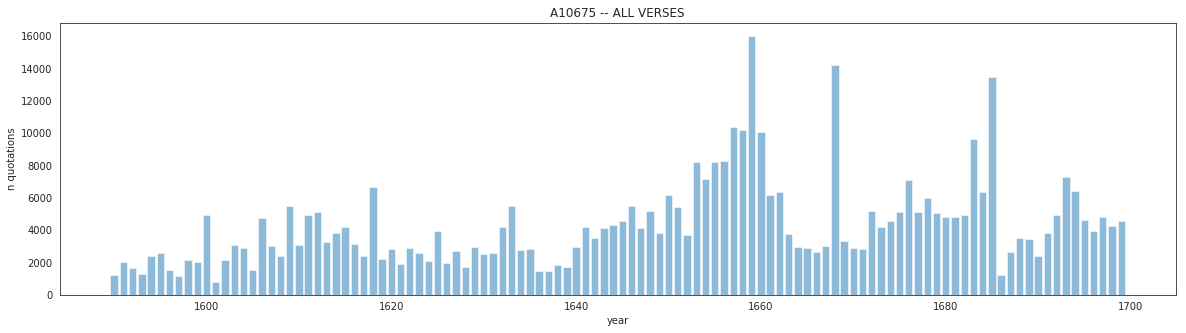

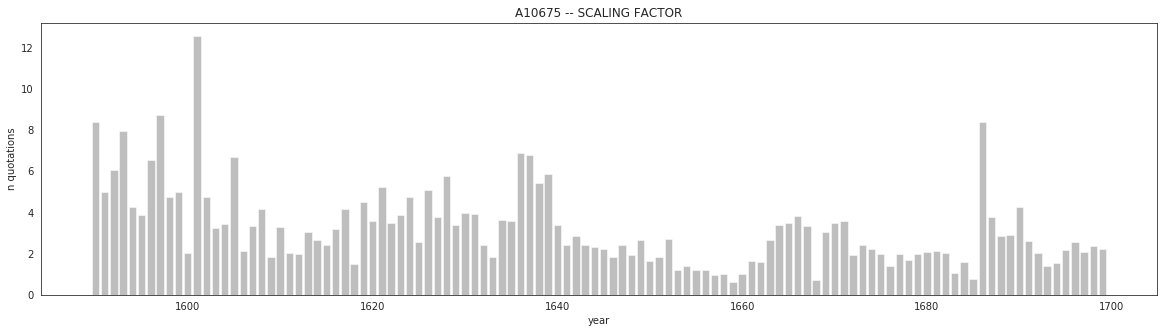

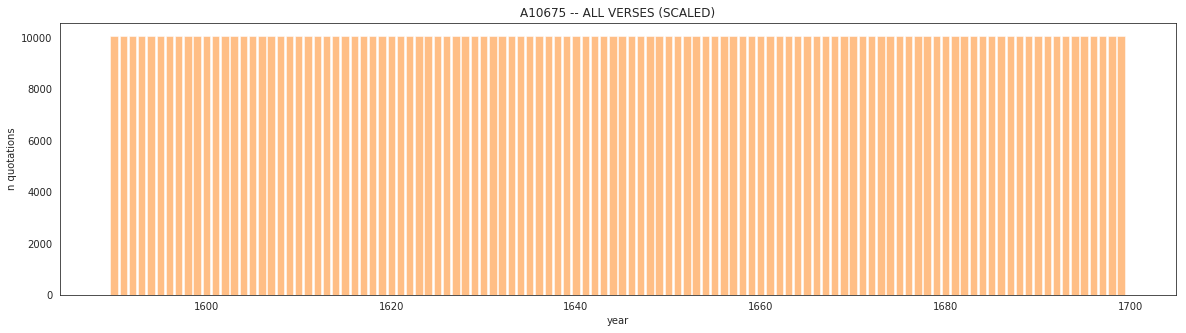

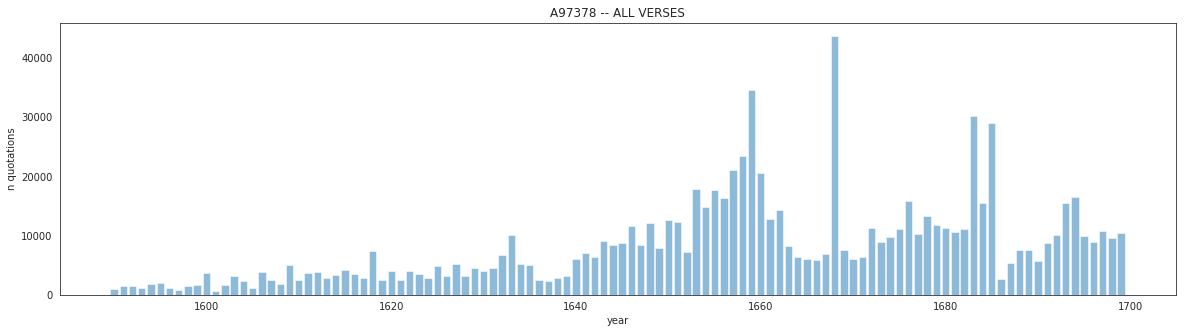

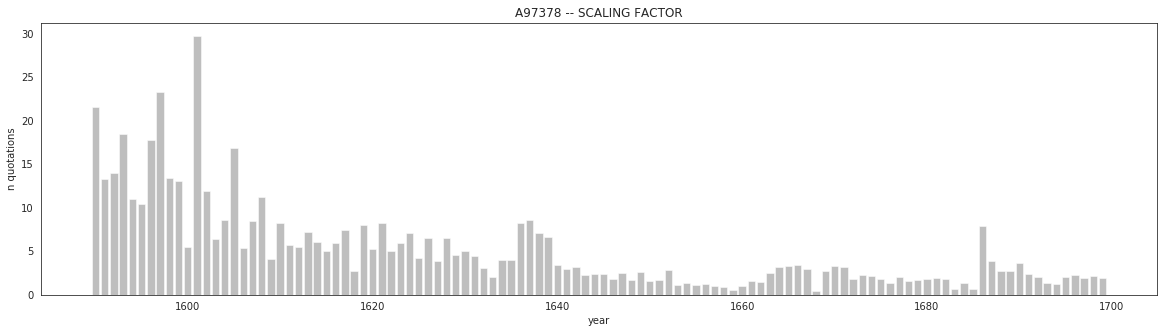

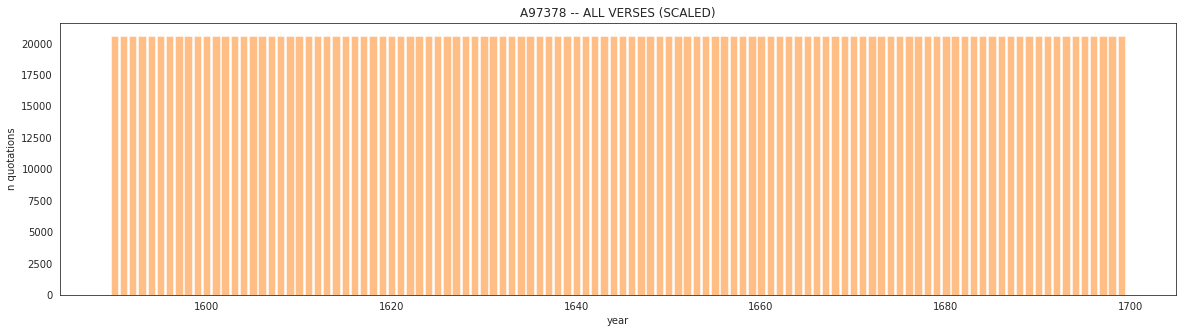

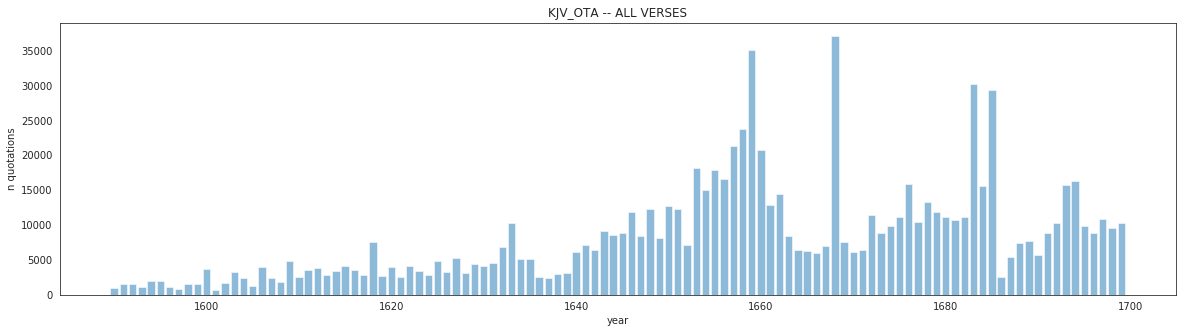

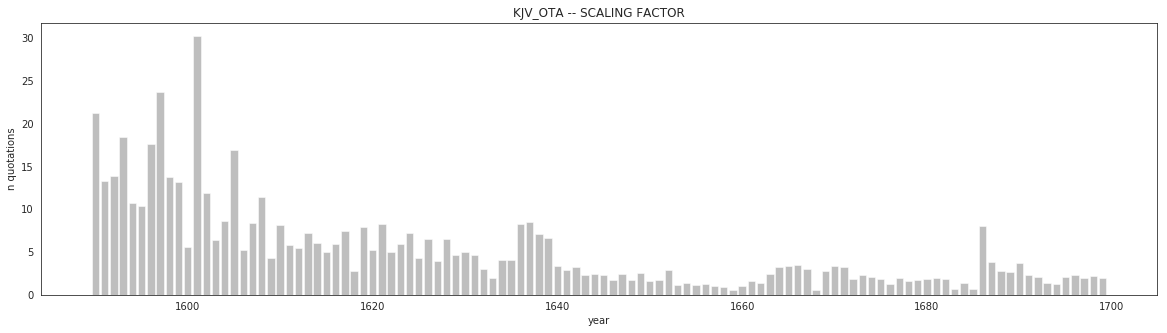

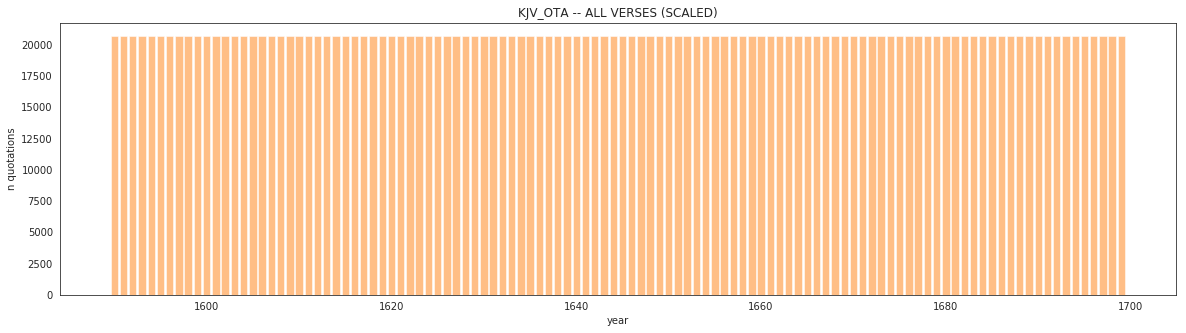

In [7]:
years_for_graph = []
for y in range(1590, 1700):
    years_for_graph.append(y)
    
save_year_scale_factors = {}

for tcp_id in ['A10675', 'A97378', 'KJV_OTA']:
    
    book_hash, verse_hash, year_hash, book_year_hash, verse_year_hash = get_data_for_graphs(tcp_id, 999999)
    
    raw_year_values_for_graph = []
    for y in years_for_graph:
        try:
            raw_year_values_for_graph.append(year_hash[y])
        except KeyError:
            raw_year_values_for_graph.append(0)
    
    graph_series(years_for_graph, raw_year_values_for_graph, (tcp_id + ' -- ALL VERSES'), 'tab:blue')

    year_scale_factors = []
    for a in range(0, len(years_for_graph)):
        year_scale_factors.append(float(year_hash[1660] / raw_year_values_for_graph[a]))
        
    save_year_scale_factors[tcp_id] = year_scale_factors

    graph_series(years_for_graph, year_scale_factors, tcp_id + ' -- SCALING FACTOR', 'tab:gray')

    scaled_year_values_for_graph = []
    for a in range(0, len(years_for_graph)):
        scaled_year_values_for_graph.append(year_scale_factors[a] * raw_year_values_for_graph[a])

    graph_series(years_for_graph, 
                 scaled_year_values_for_graph, 
                 tcp_id + ' -- ALL VERSES (SCALED)', 
                 'tab:orange')



### How many times is each book of the Bible quoted?

This feels tedious and repetitive, but if proved useful for checking for reasonableness.  For example, in an earlier iteration, this section showed that Psalms from the EEBP-TCP bibles was never quoted.  Which is, of course, ridiculous.  It turned out that they were marked in a slight, but unique way, which in turn gummed up the works.

The graphs, which follow the lists of books, follows the same scheme as the preceding ones, except that I don't  show the scaling factor (which remains constant), and I add a trend line.

**These graphs may end up changing my assumptions.** I had assumed that I could find meaningful variation for some books across the 110 years between 1590 and 1700.  But I'm not seeing that; or, perhaps, it's not as marked as I would have expected it to be.


A10675

	 Psalms 61385
	 Matthew 46831
	 John 42103
	 Romans 32880
	 Luke 31151
	 1 Corinthians 27413
	 Acts 19526
	 Ephesians 18180
	 Proverbs 18023
	 Isaiah 17862
	 Hebrews 17749
	 Ezekiel 17020
	 Revelation 16484
	 Mark 13904
	 Deuteronomy 13753
	 Exodus 13138
	 Job 13108
	 Jeremiah 11522
	 Galatians 10974
	 Genesis 10084
	 1 John 10027
	 2 Corinthians 9777
	 Colossians 8072
	 1 Peter 7145
	 1 Timothy 6983
	 Philippians 6907
	 James 6544
	 Ecclesiasticus 6219
	 Numbers 5401
	 1 Thessalonians 5222
	 2 Timothy 4801
	 Ecclesiastes 4568
	 Leviticus 3753
	 1 Kings 3706
	 Daniel 3612
	 2 Chronicles 3594
	 1 Samuel 3541
	 2 Esdras 3245
	 1 Chronicles 3237
	 2 Samuel 3085
	 2 Peter 3008
	 Titus 2830
	 2 Kings 2828
	 Zechariah 2523
	 Lamentations 2493
	 2 Thessalonians 2483
	 Hosea 2344
	 Amos 2139
	 Judges 2139
	 Joshua 2077
	 Song of Solomon 2031
	 Wisdom of Solomon 1996
	 1 Maccabees 1852
	 Micah 1463
	 Malachi 1335
	 Nehemiah 1207
	 Habakkuk 1116
	 2 Maccabees 1049
	 Baruch 1034
	 Joel 

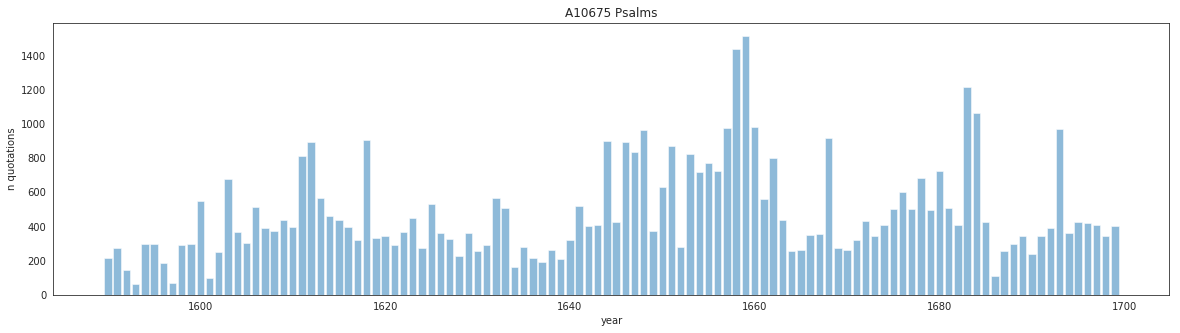

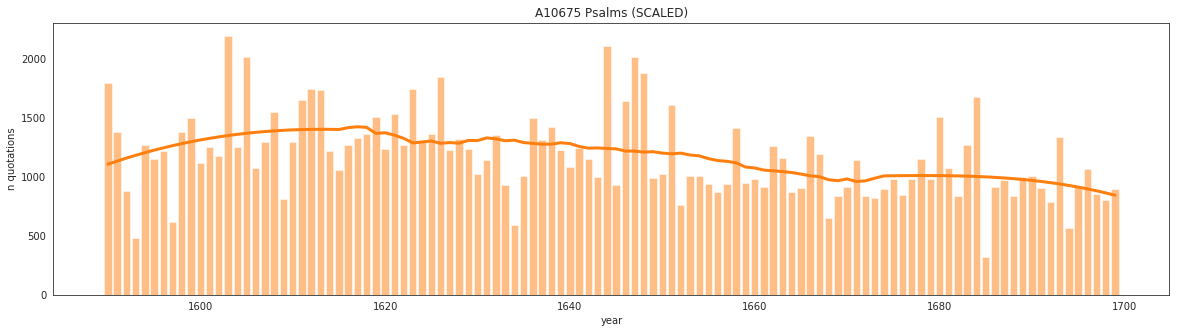

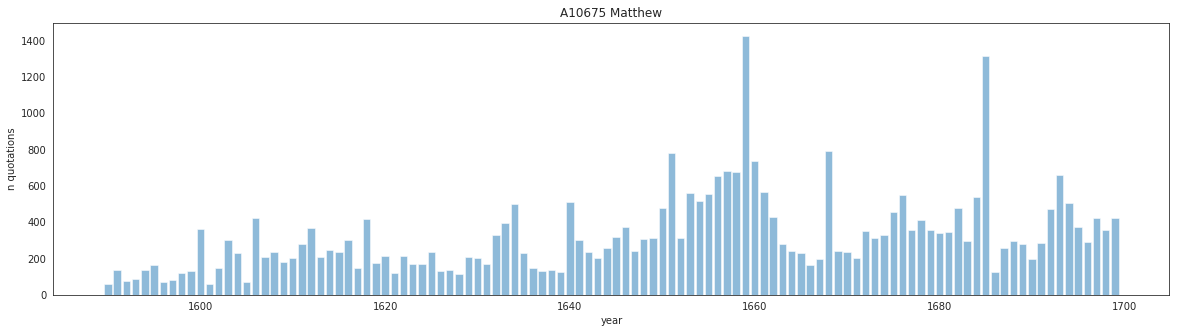

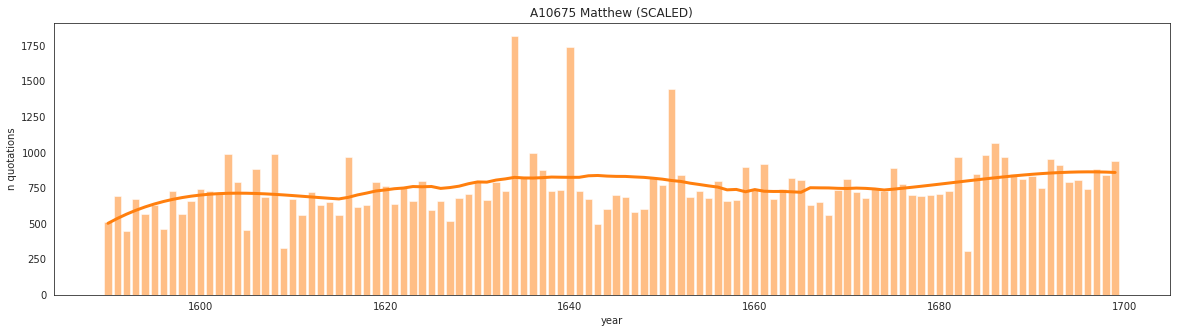

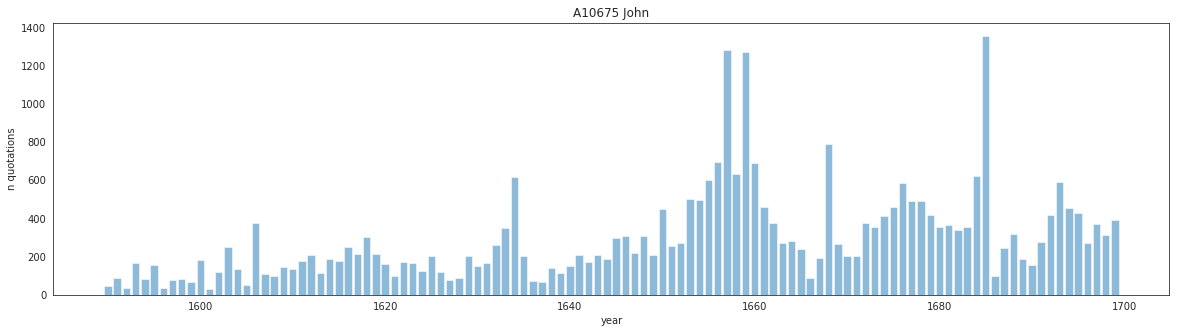

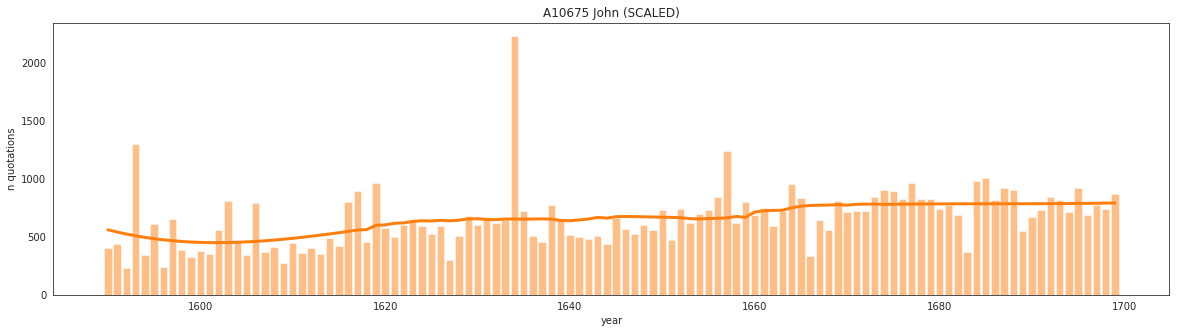

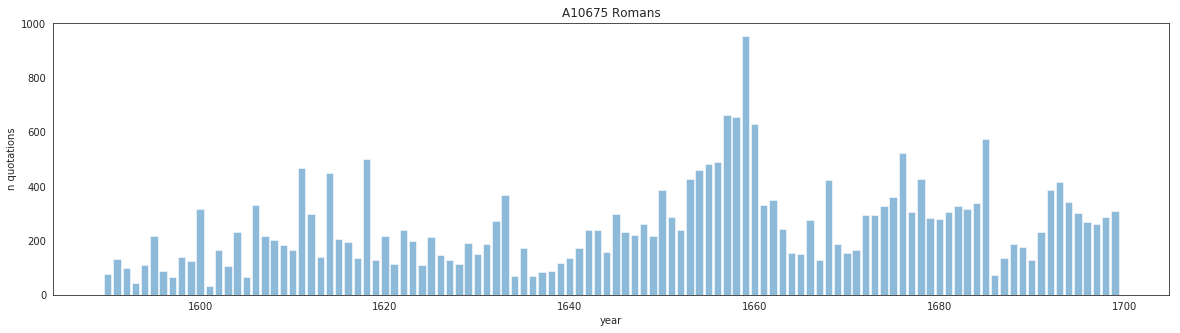

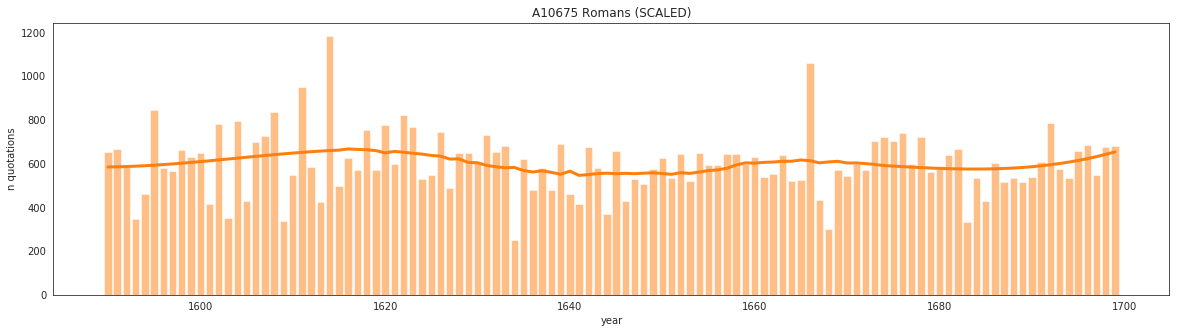

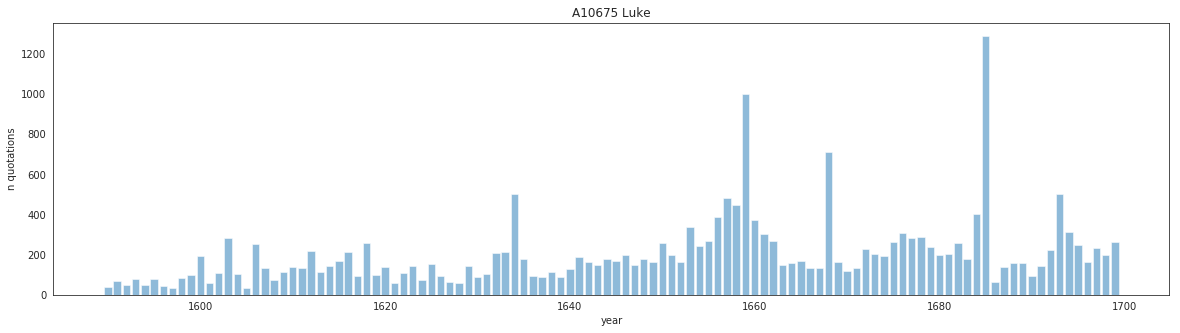

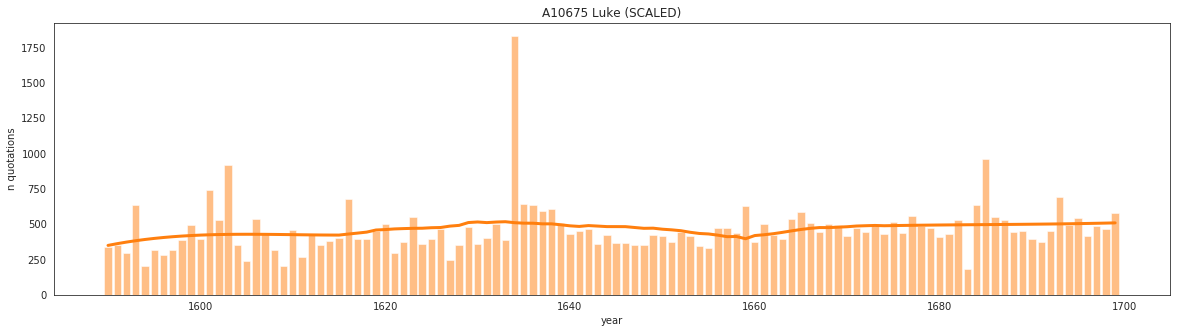

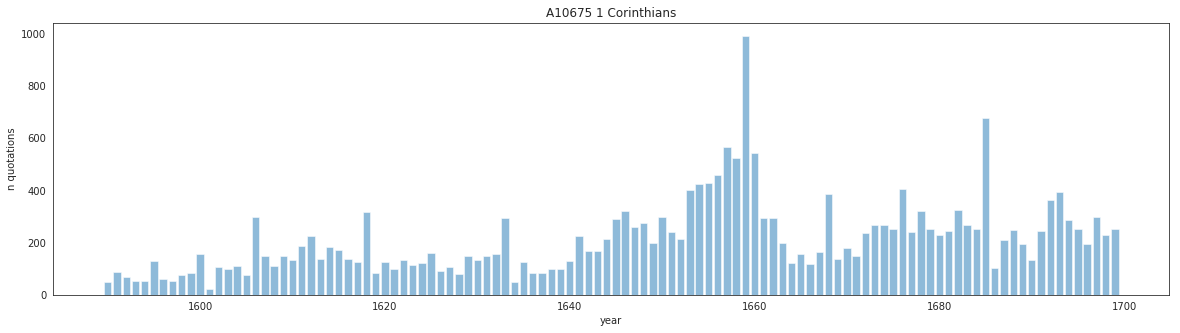

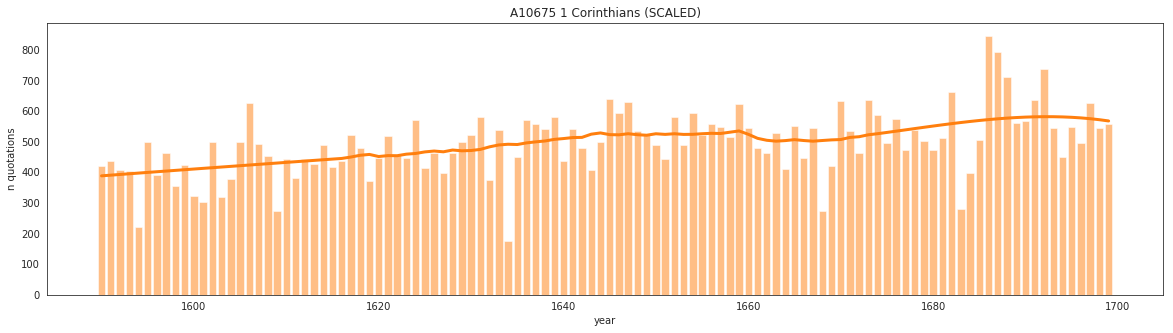

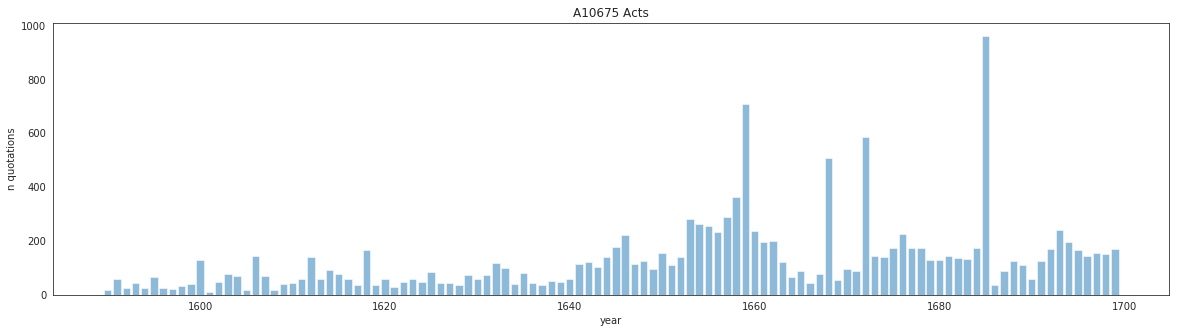

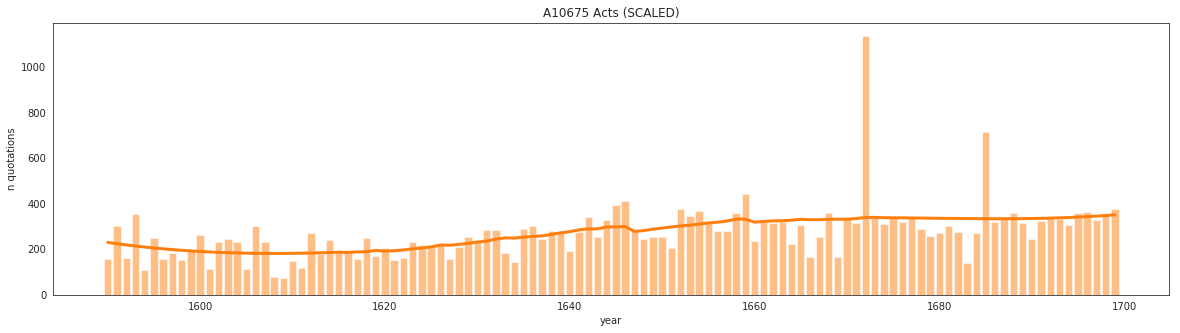

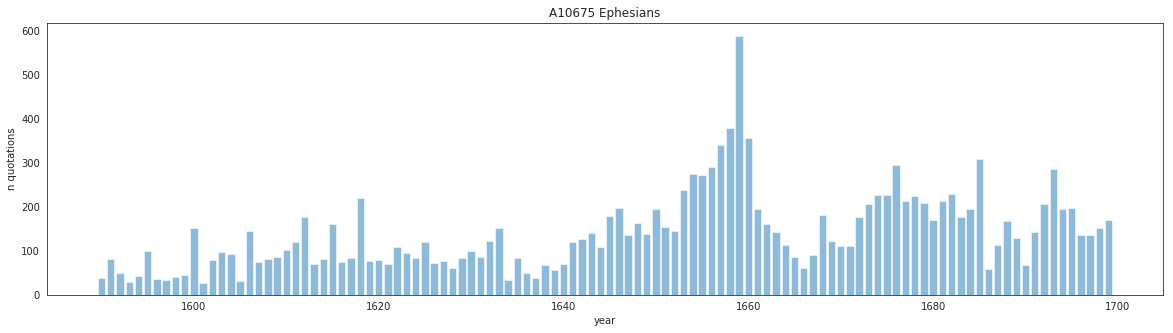

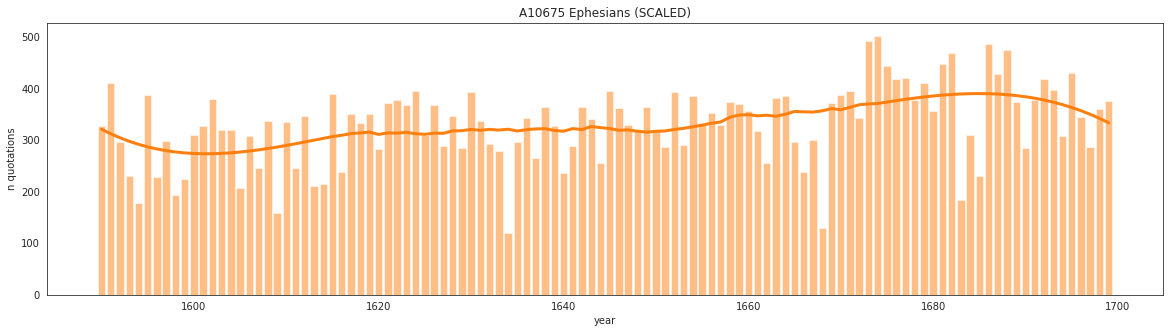

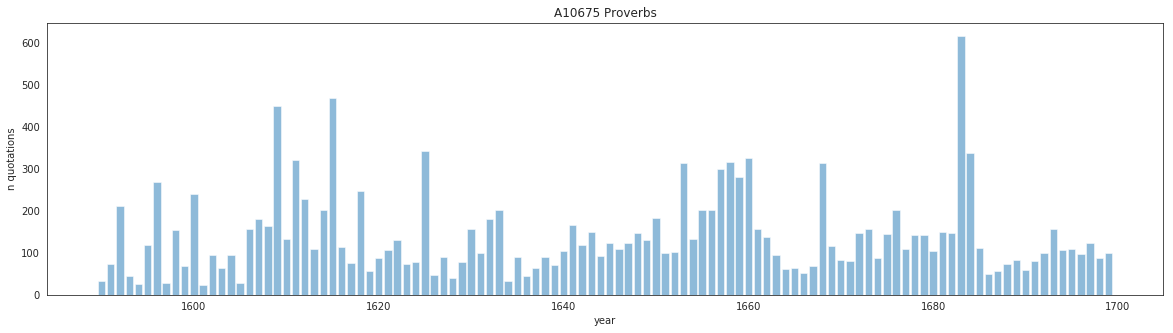

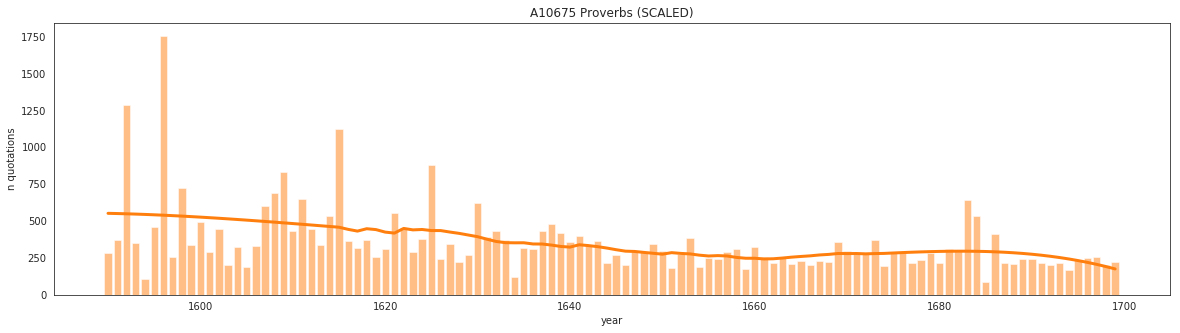

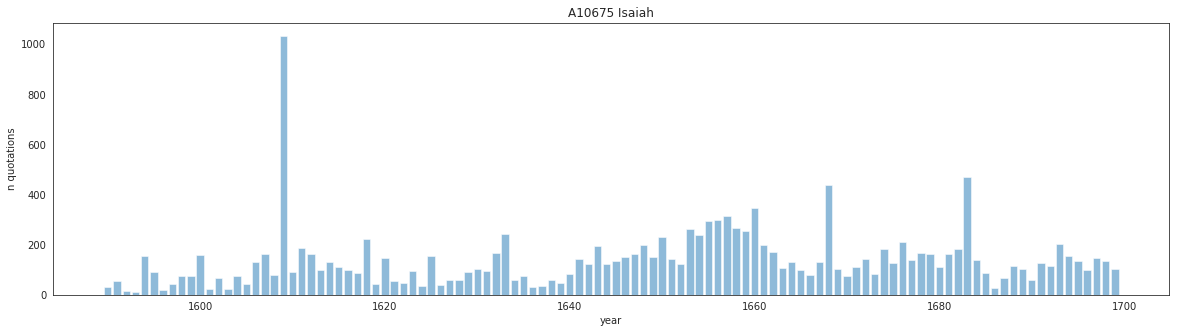

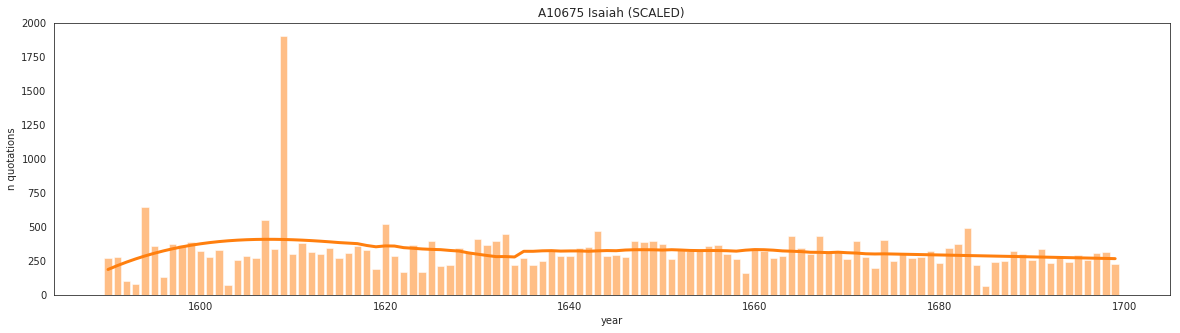

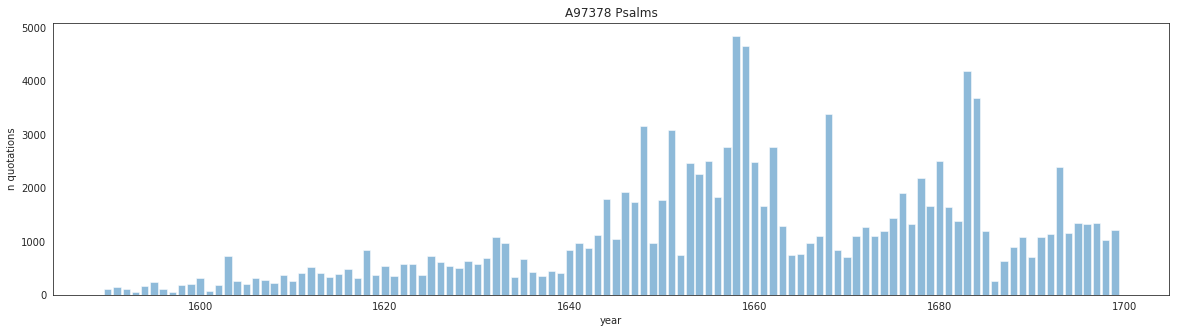

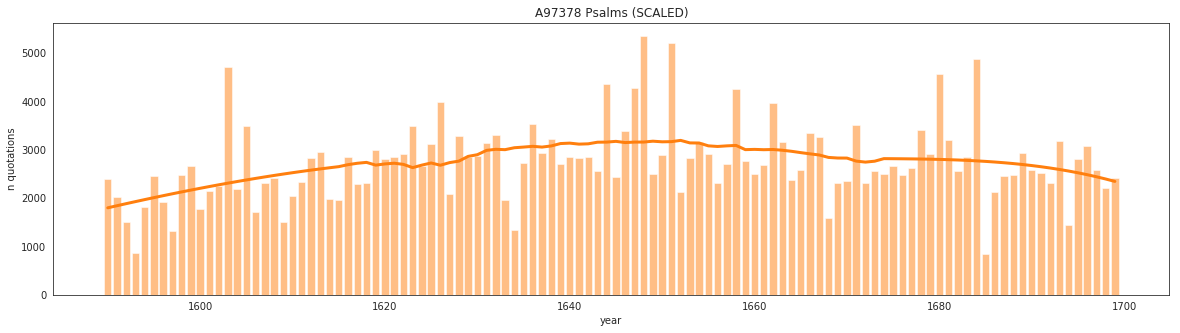

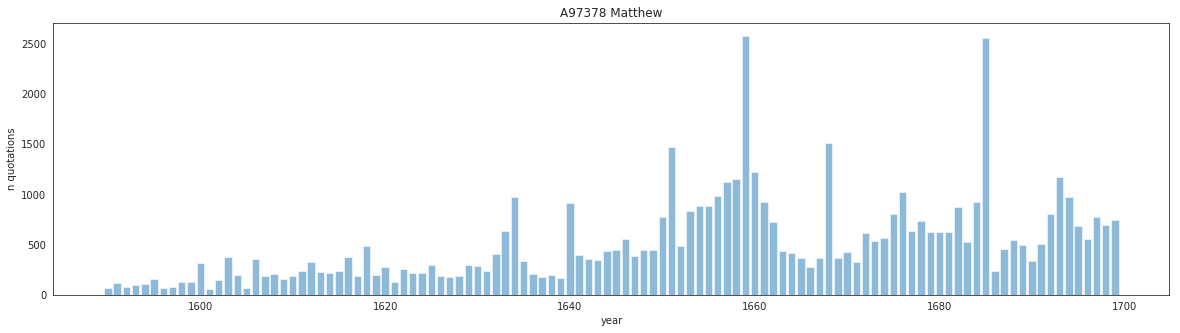

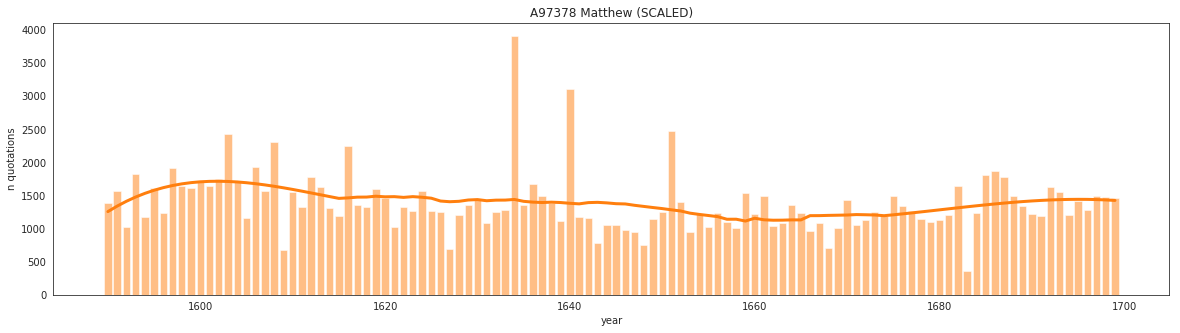

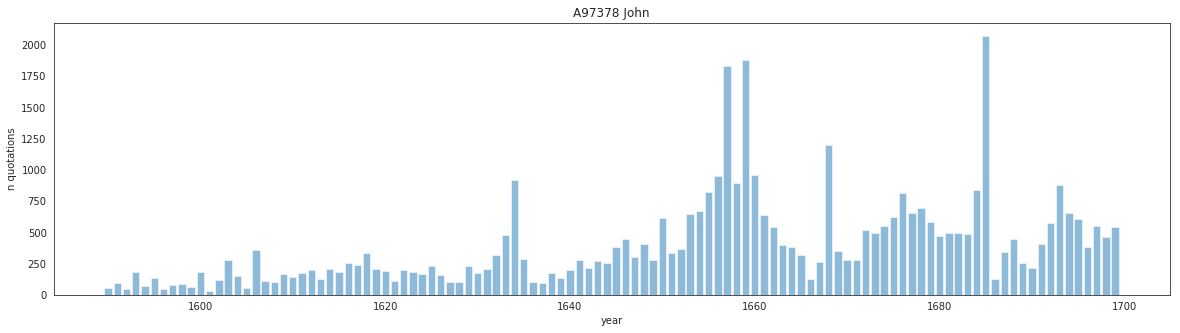

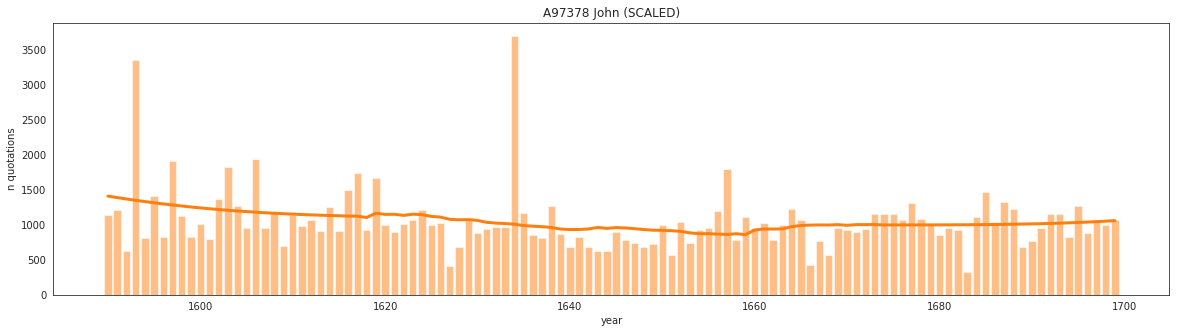

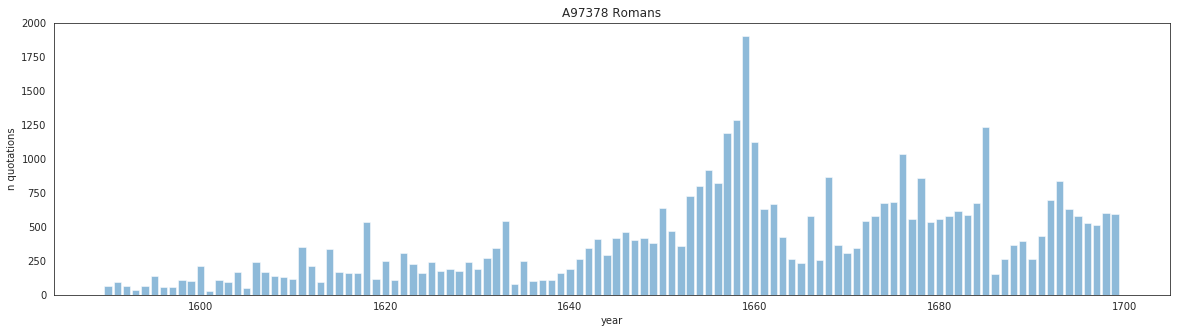

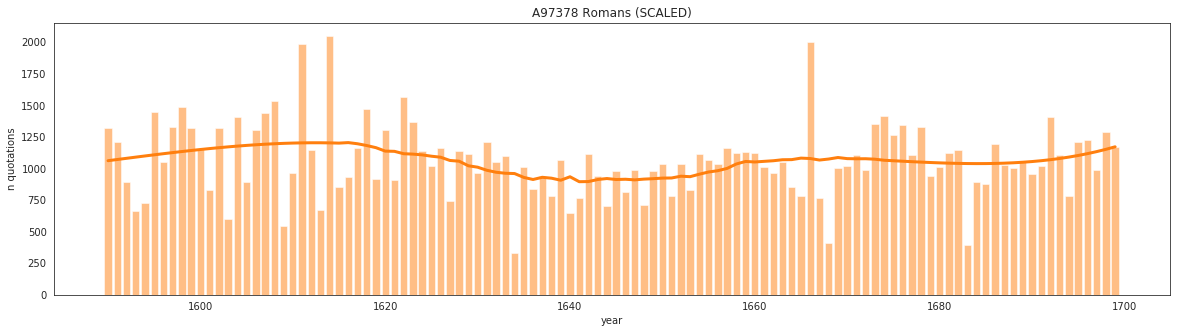

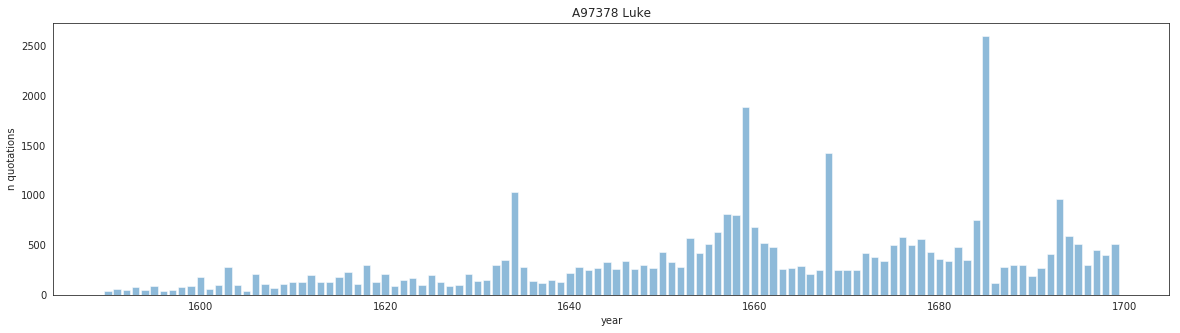

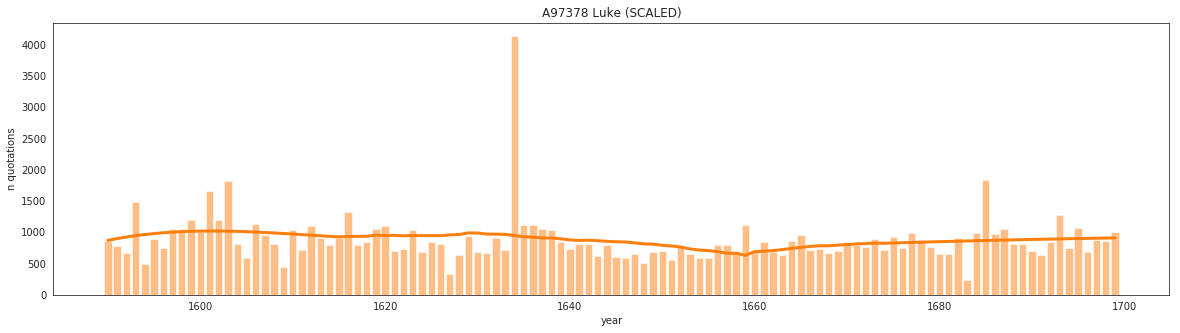

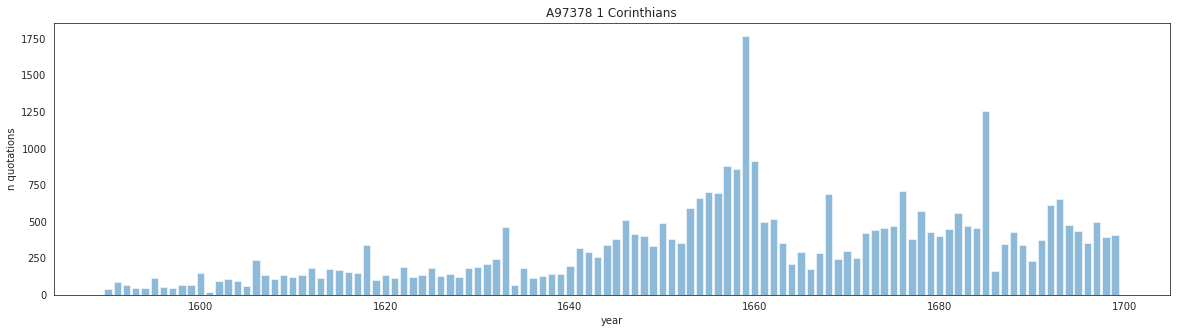

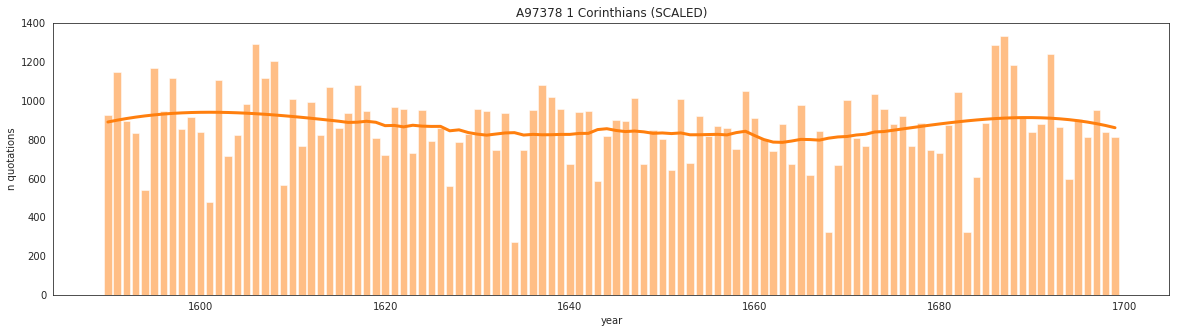

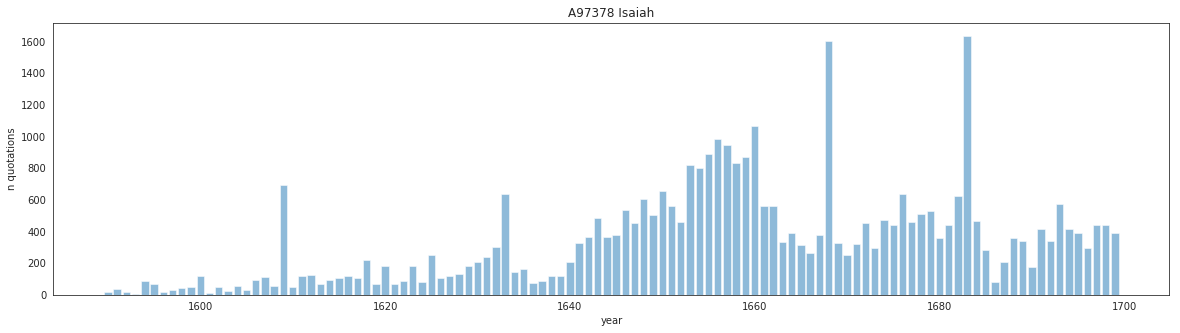

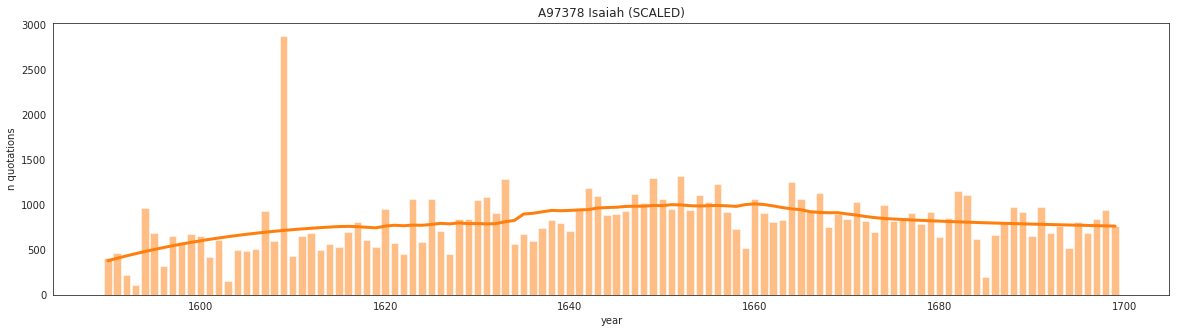

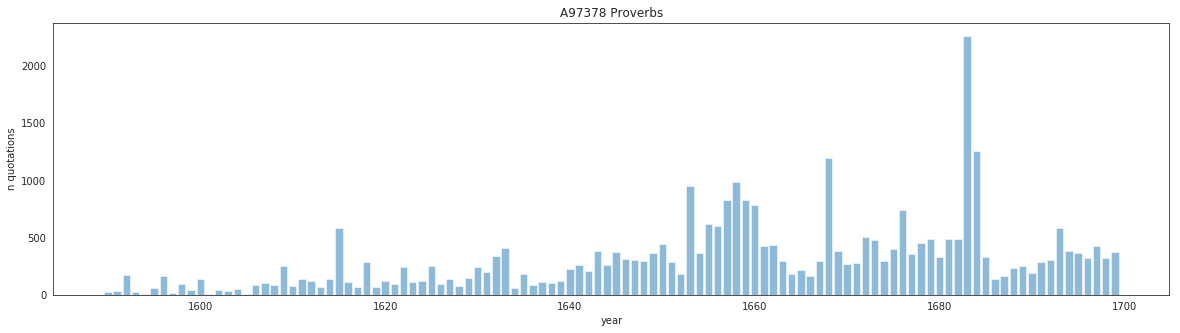

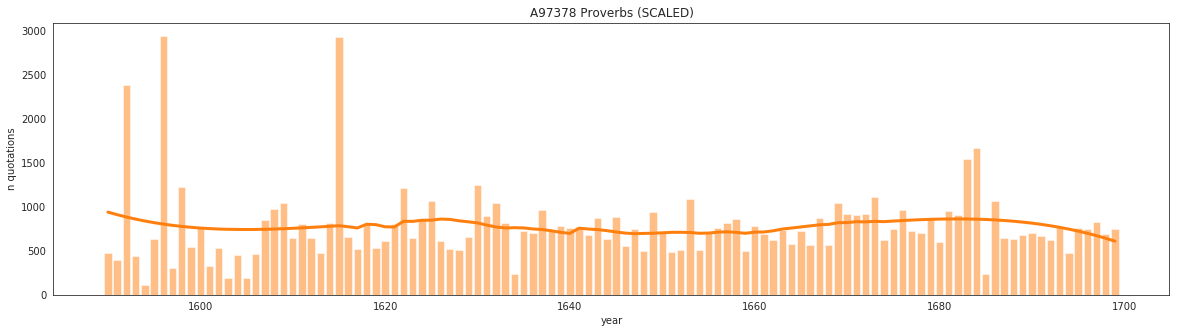

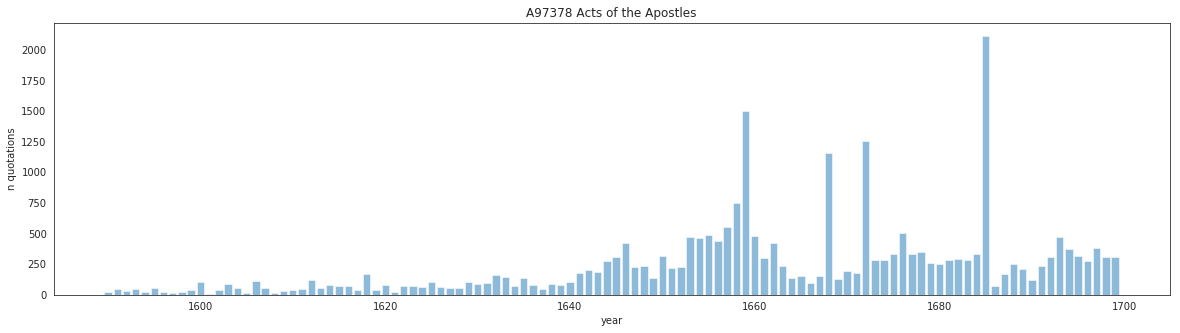

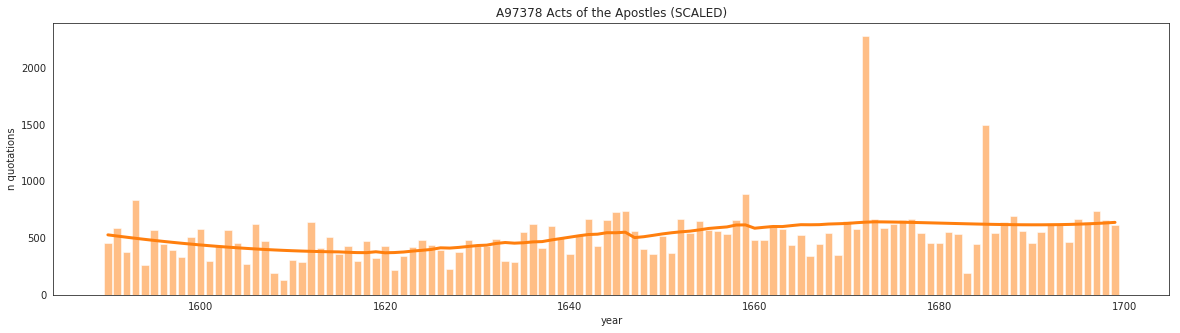

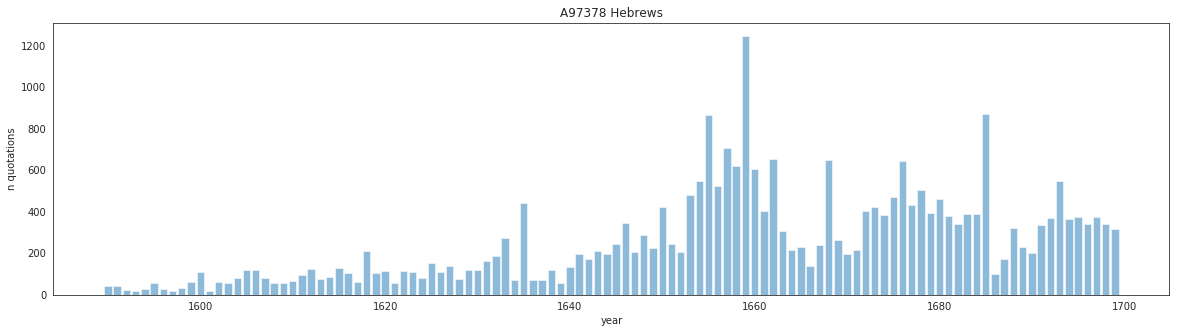

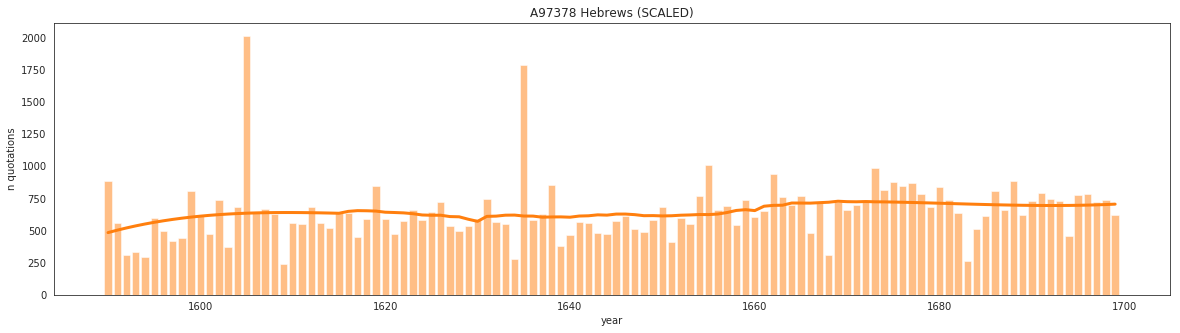

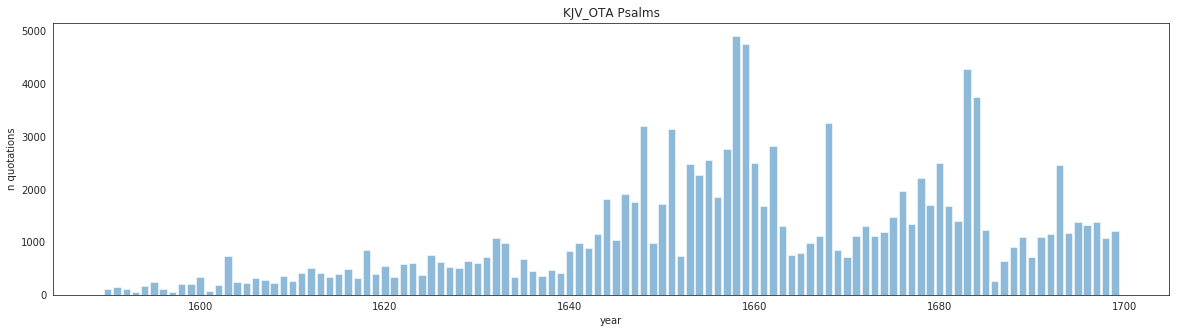

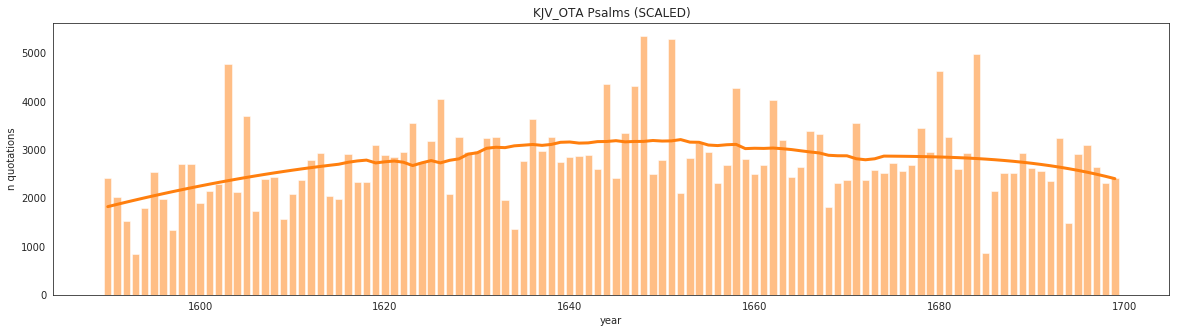

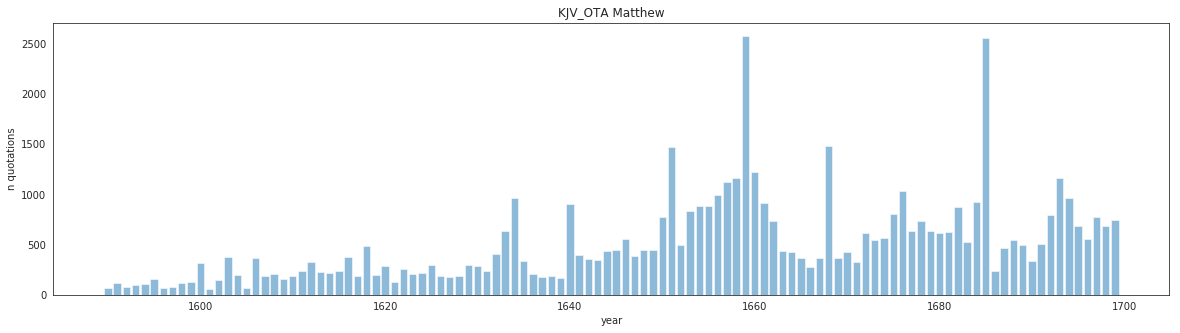

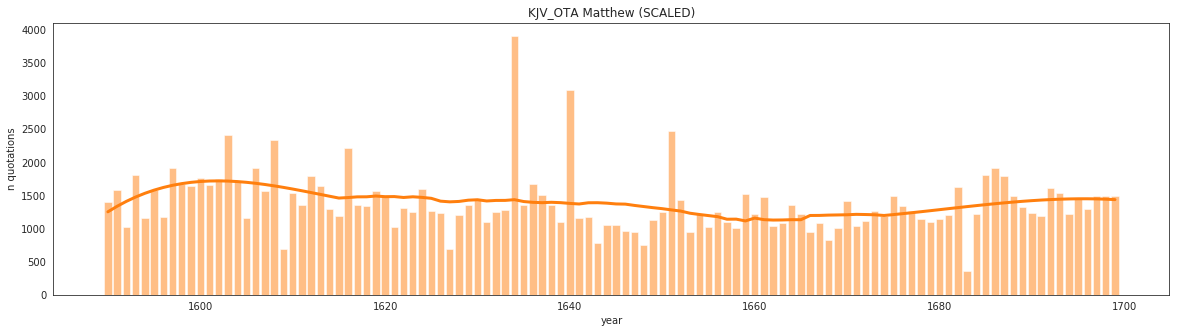

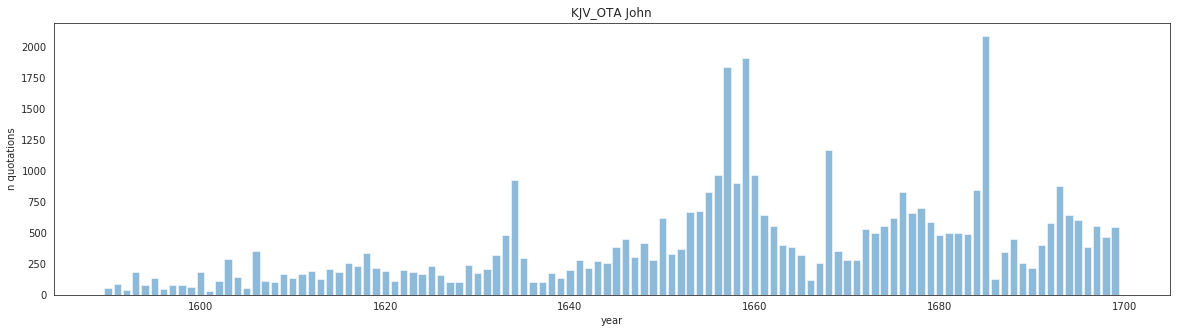

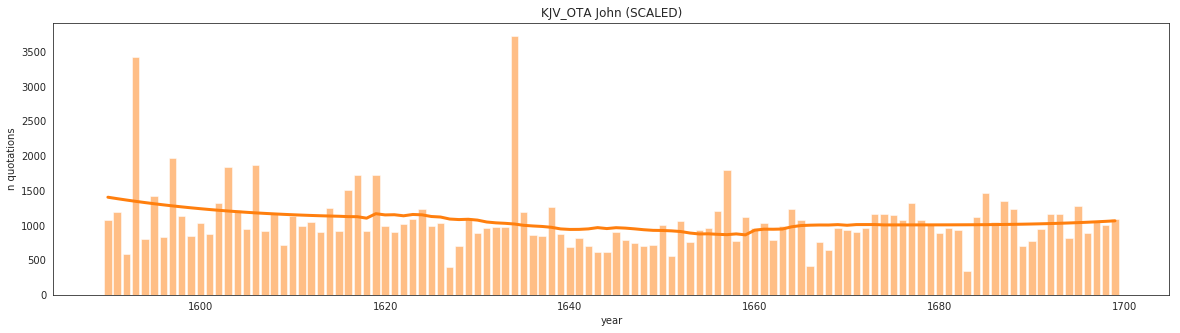

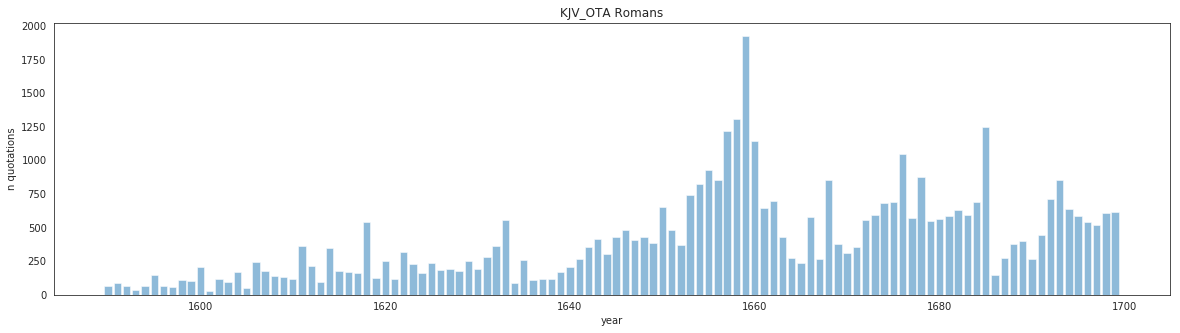

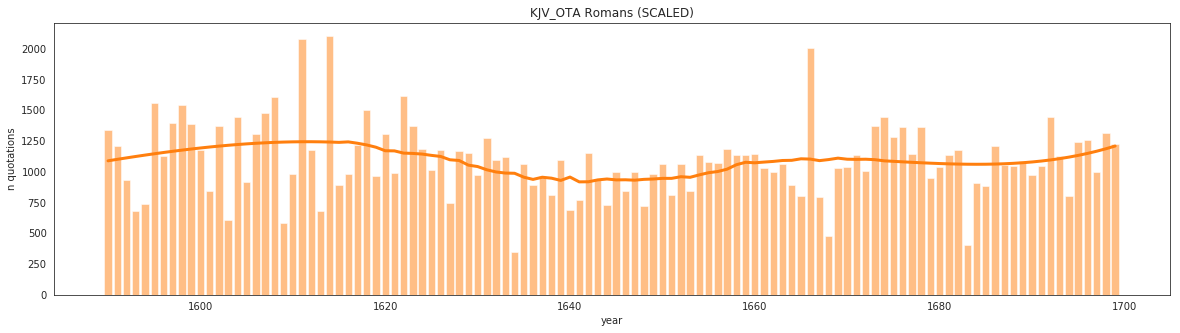

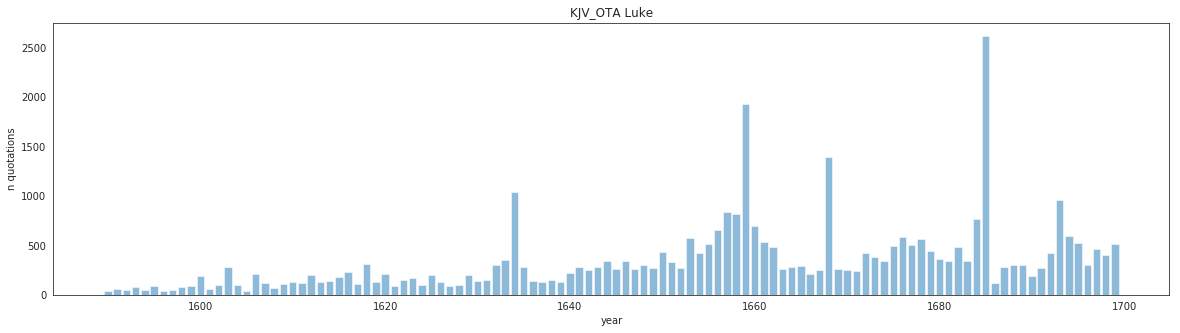

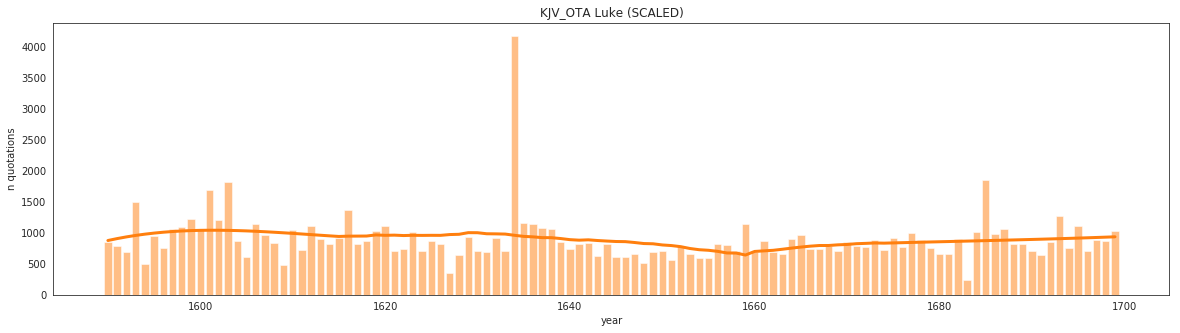

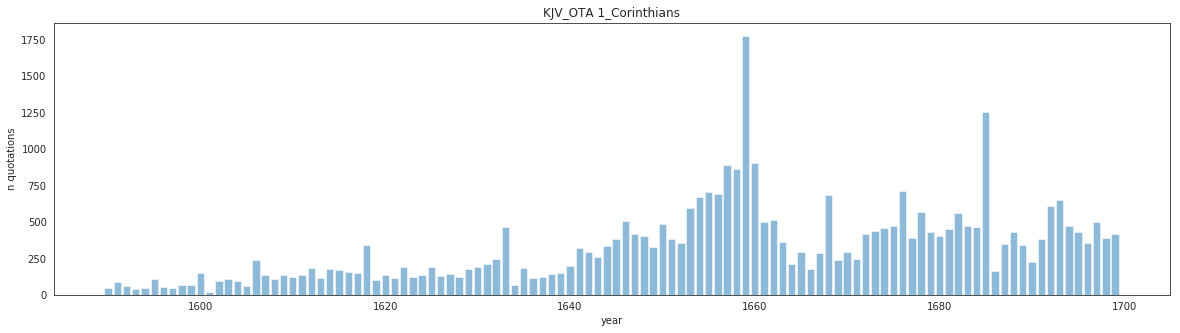

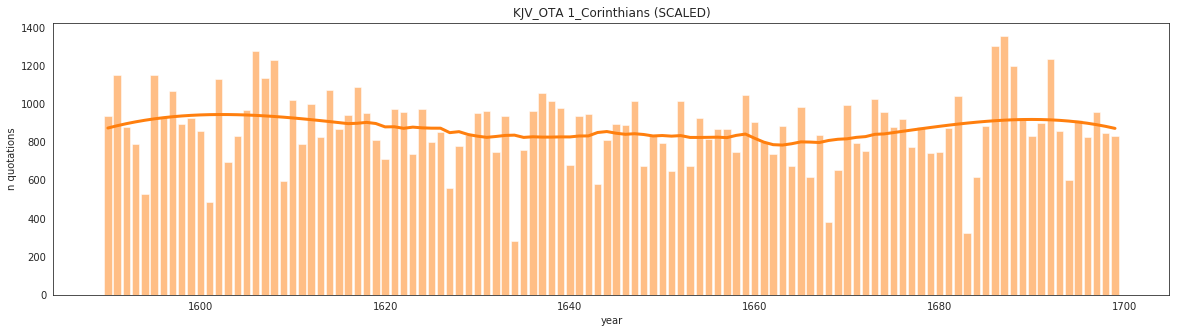

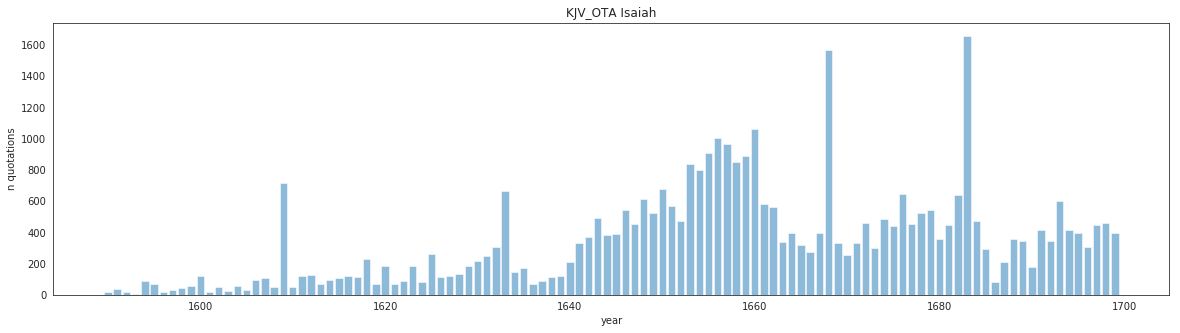

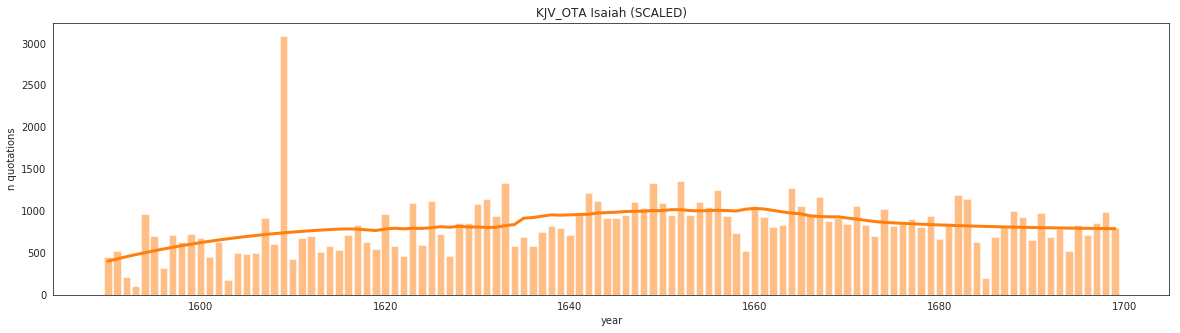

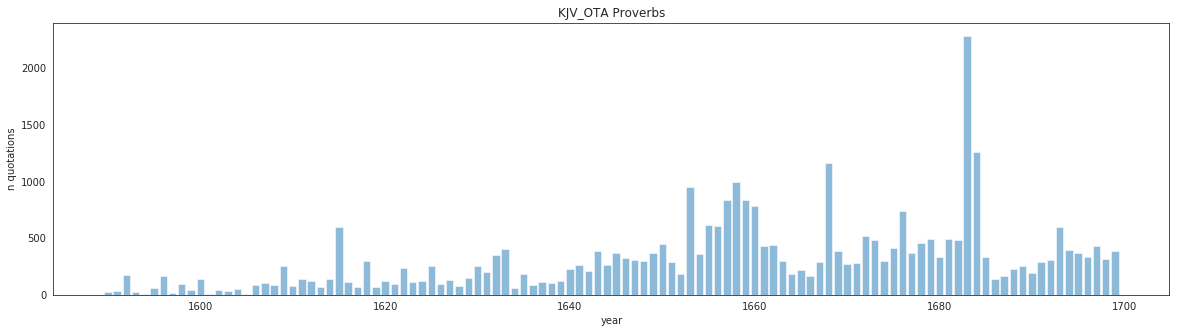

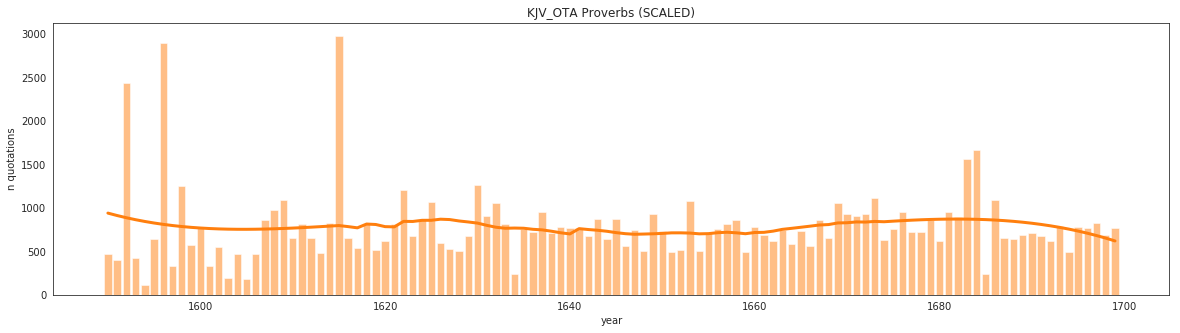

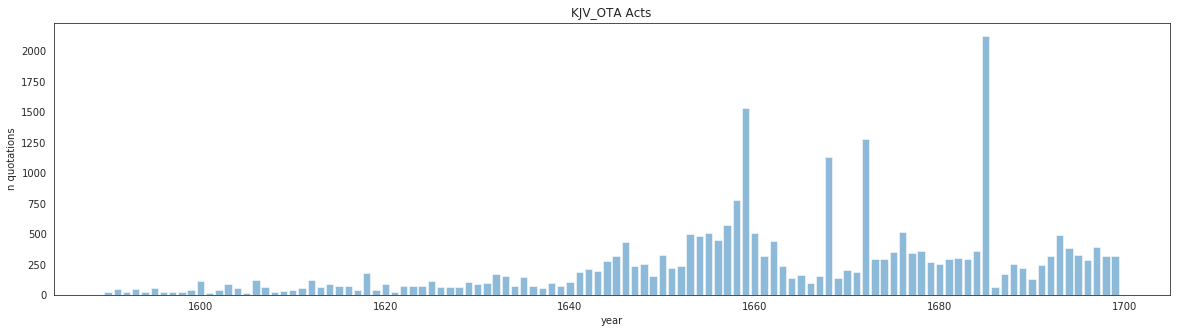

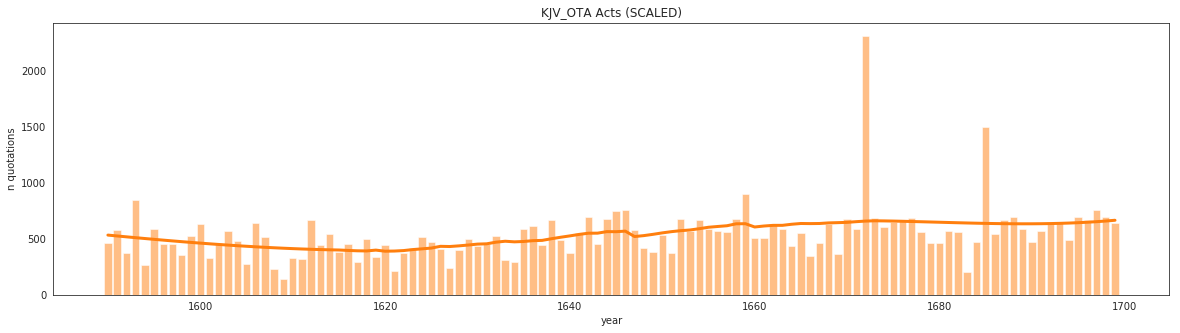

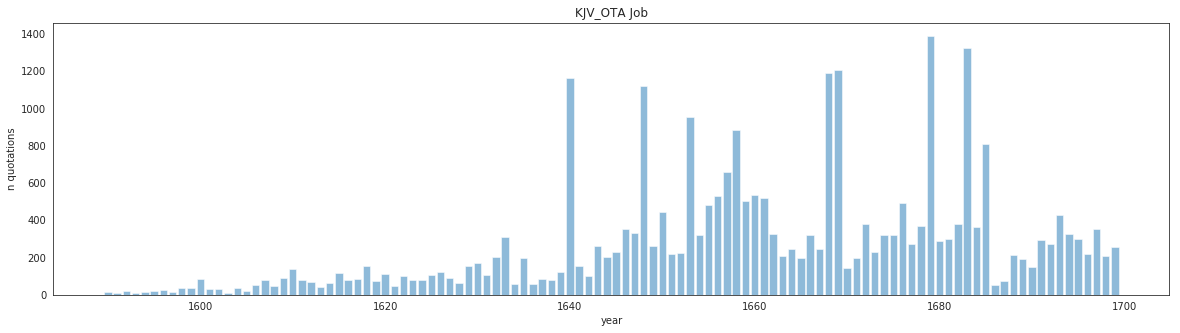

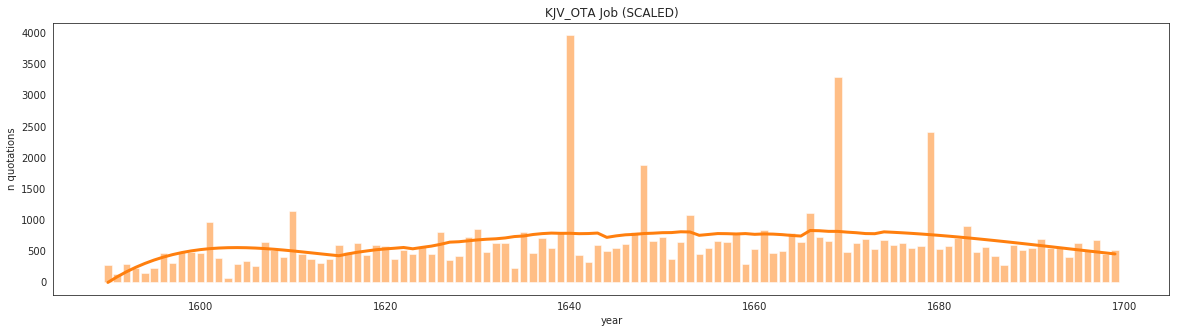

In [9]:
years_for_graph = []
    
for y in range(1590, 1700):
    years_for_graph.append(y)

for tcp_id in ['A10675', 'A97378', 'KJV_OTA']:
    
    print()
    print(tcp_id)
    print()
    
    book_hash, verse_hash, year_hash, book_year_hash, verse_year_hash = get_data_for_graphs(tcp_id, 999999)

    n_found = 0
    
    for w in Counter(book_hash).most_common():
        print('\t', w[0], w[1])
        n_found += 1
        
    print()
    print('\t', 'n_found', n_found)
    print()

for tcp_id in ['A10675', 'A97378', 'KJV_OTA']:
    
    book_hash, verse_hash, year_hash, book_year_hash, verse_year_hash = get_data_for_graphs(tcp_id, 999999)

    for w in Counter(book_hash).most_common(10):
        
        book = w[0]

        raw_year_values_for_graph = []
        for year in years_for_graph:
            raw_year_values_for_graph.append(book_year_hash[book][year])

        graph_series(years_for_graph, raw_year_values_for_graph, tcp_id + ' ' + book, 'tab:blue')

        scaled_year_values_for_graph = []
        for a in range(0, len(years_for_graph)):
            scaled_year_values_for_graph.append(save_year_scale_factors[tcp_id][a] * \
                                                raw_year_values_for_graph[a])

        graph_series(years_for_graph, 
                         scaled_year_values_for_graph, 
                         tcp_id + ' ' + book + ' (SCALED)', 
                         'tab:orange',
                         display_trend=True)


### Count and graph individual verses

Here, I do the same thing with individual verses, except for most of the overquoted verses.

Verse trend lines show much more variabilibity.


A10675

	 John.6.56 1368
	 John.3.16 836
	 Titus.2.12 767
	 Matthew.5.16 724
	 1 Timothy.2.5 709
	 Matthew.11.30 706
	 Hebrews.10.31 698
	 Matthew.28.19 663
	 1 Timothy.2.2 654
	 Galatians.5.24 649
	 Exodus.20.16 639
	 Genesis.1.1 628
	 Romans.10.17 621
	 Jeremiah.32.38 619
	 Deuteronomy.6.5 612
	 Mark.4.23 607
	 Matthew.11.15 605
	 Matthew.13.9 605
	 2 Timothy.4.7 600
	 Colossians.2.3 574
	 John.1.16 569
	 Matthew.7.21 556
	 John.4.24 555
	 Matthew.5.8 554
	 Matthew.10.6 547

A97378

	 John.6.56 1368
	 John.3.16 932
	 Titus.2.12 811
	 Matthew.5.16 724
	 1 Timothy.2.5 709
	 Matthew.11.30 706
	 Hebrews.10.31 698
	 1 Timothy.2.2 654
	 Galatians.5.24 649
	 Matthew.28.19 648
	 Exodus.20.16 639
	 Genesis.1.1 637
	 1 Thessalonians.5.21 625
	 Ephesians.4.11 623
	 Jeremiah.30.22 619
	 Jeremiah.32.38 619
	 Deuteronomy.6.5 612
	 Romans.10.17 609
	 Mark.4.23 607
	 Mark.7.16 607
	 Matthew.11.15 605
	 Matthew.13.9 605
	 2 Timothy.4.7 600
	 Hebrews.13.8 576
	 Colossians.2.3 574

KJV_OTA

	 John.6.5

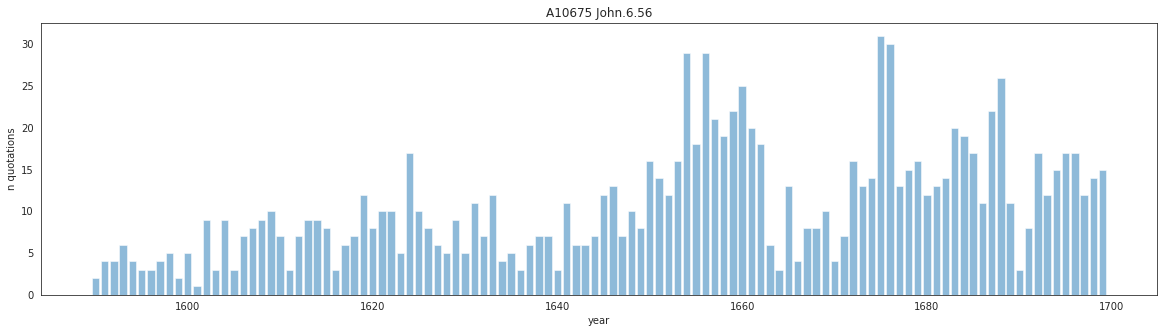

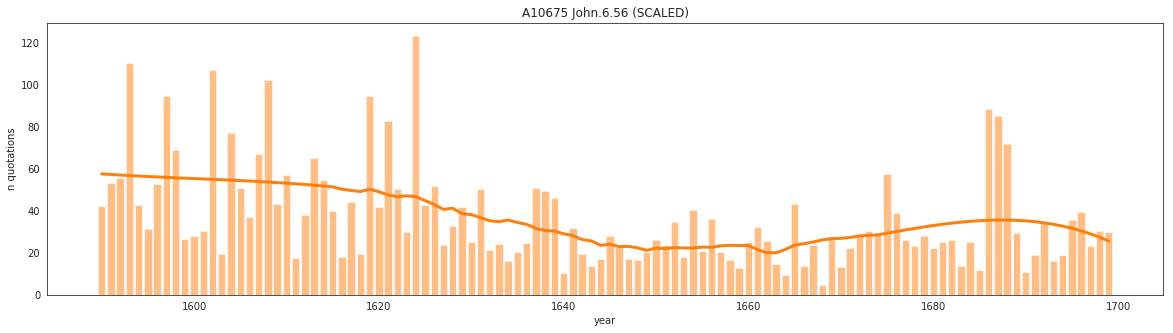

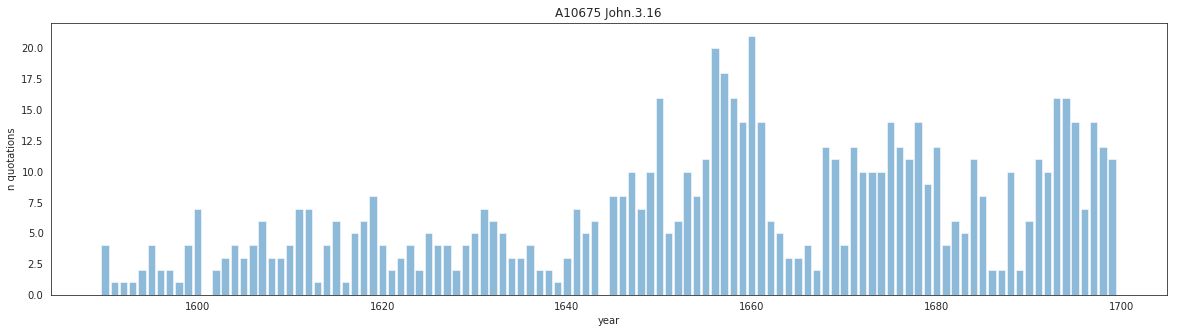

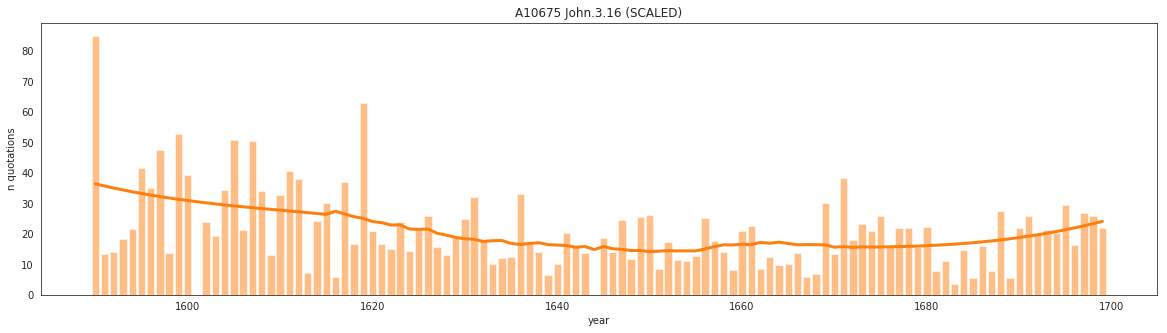

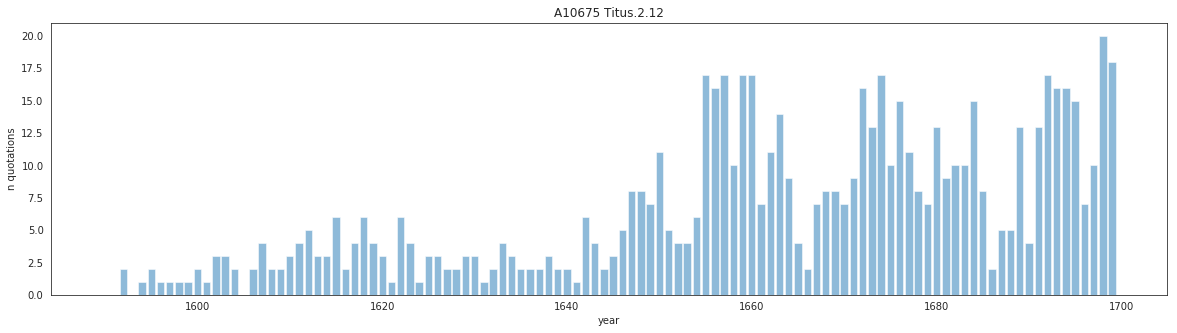

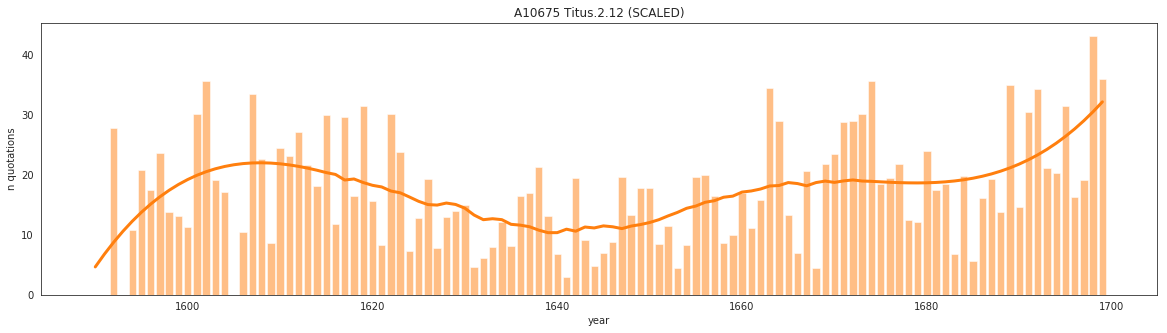

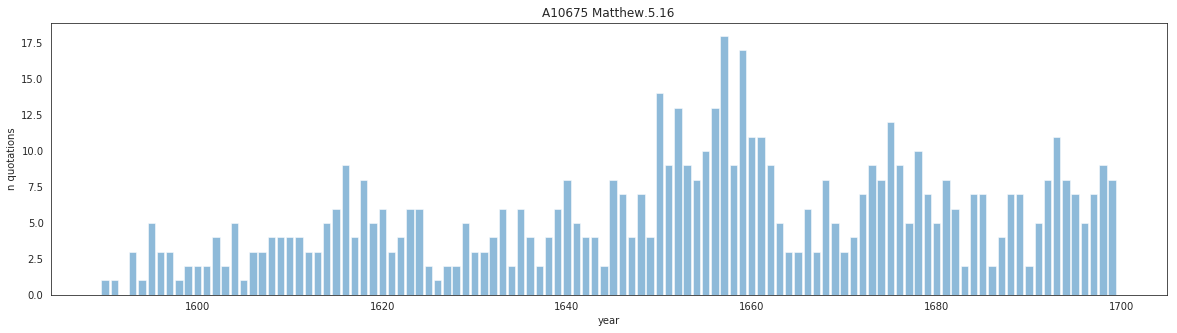

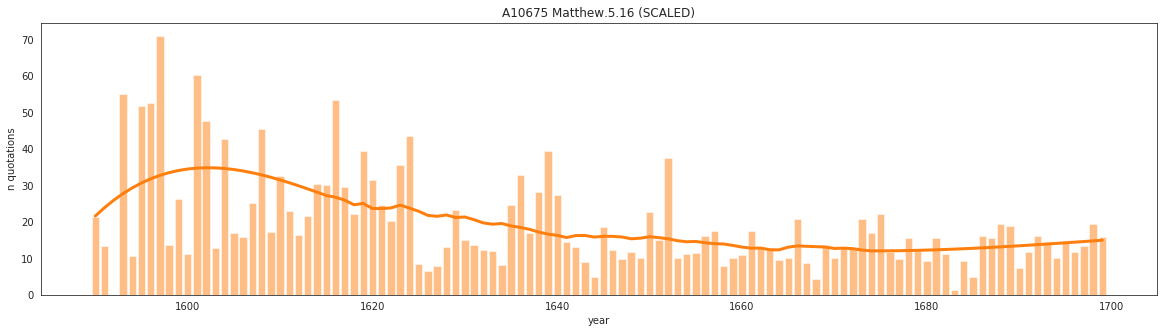

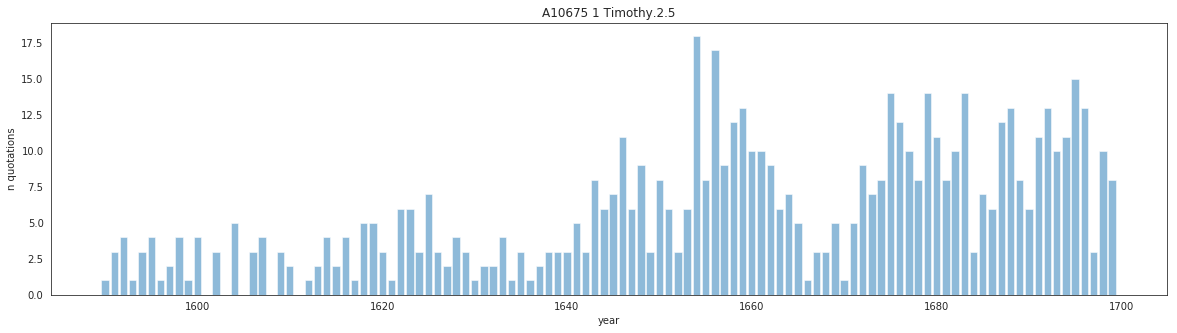

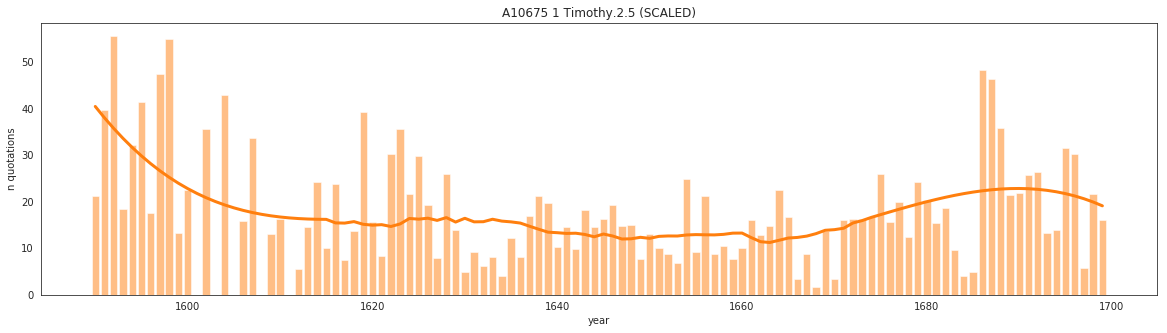

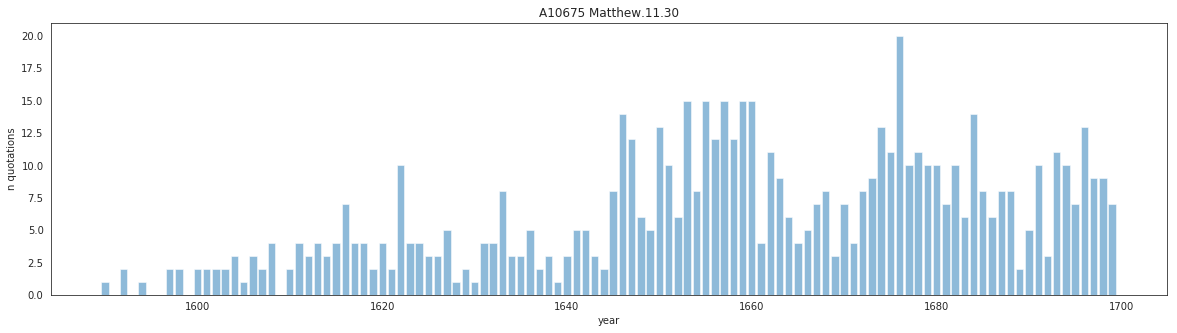

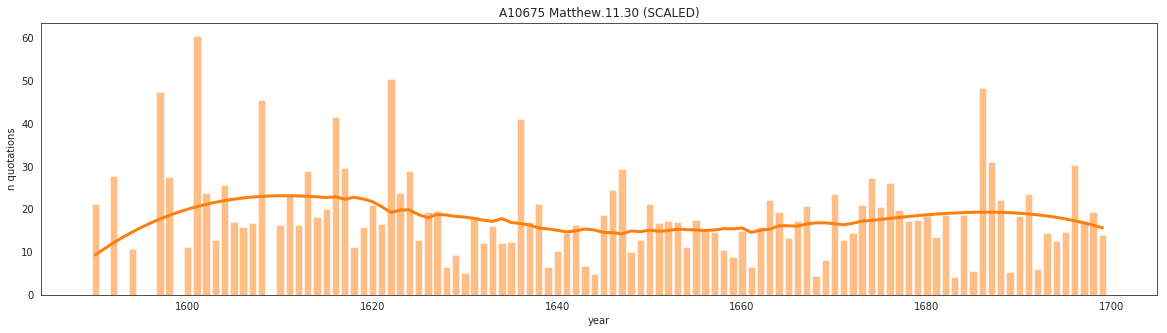

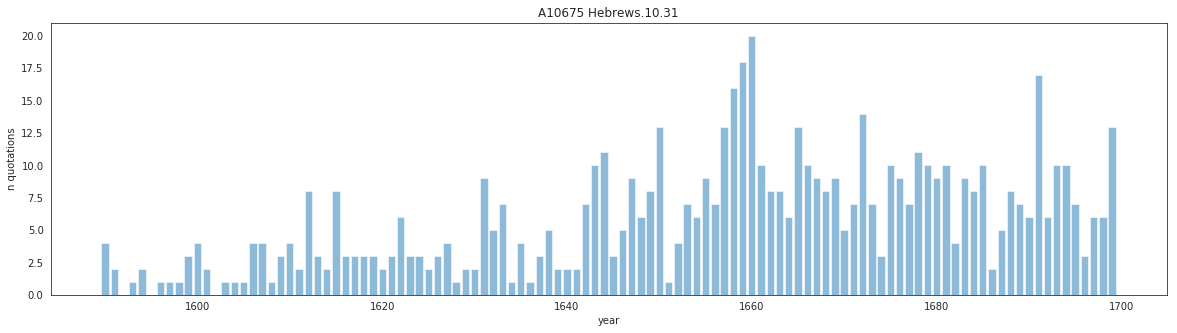

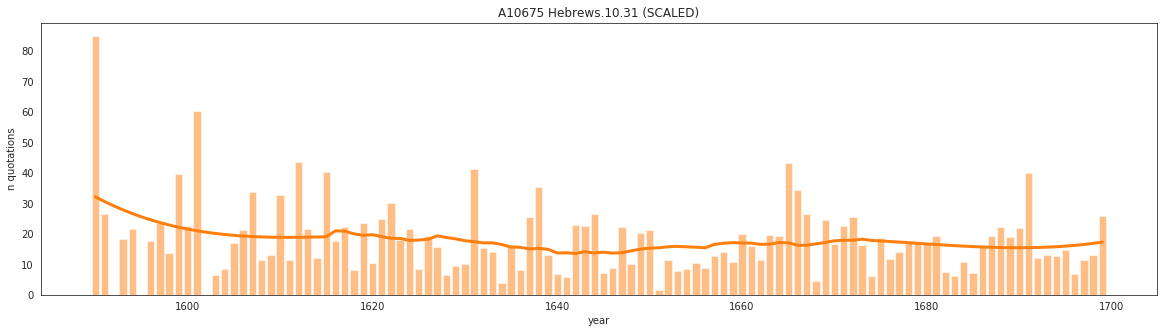

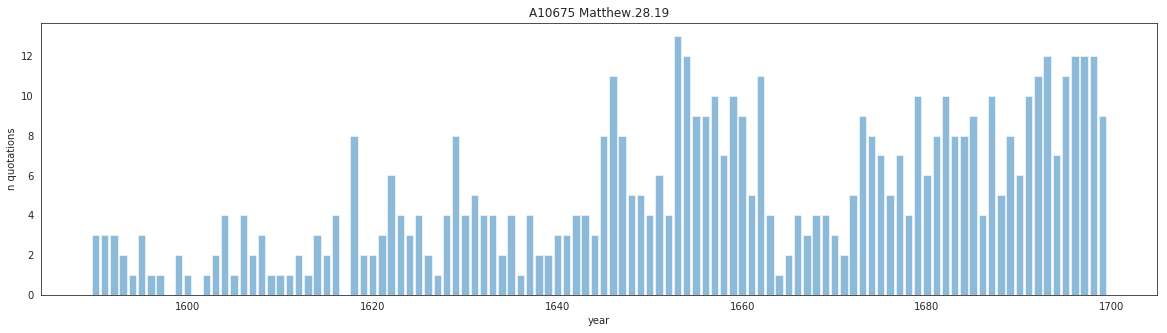

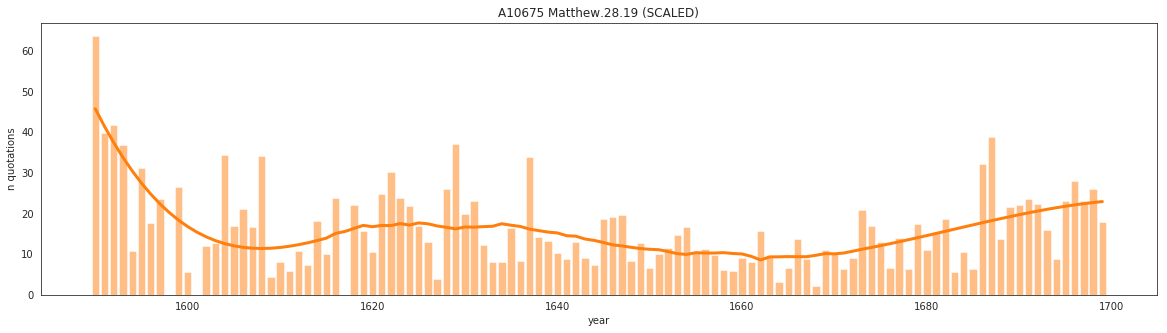

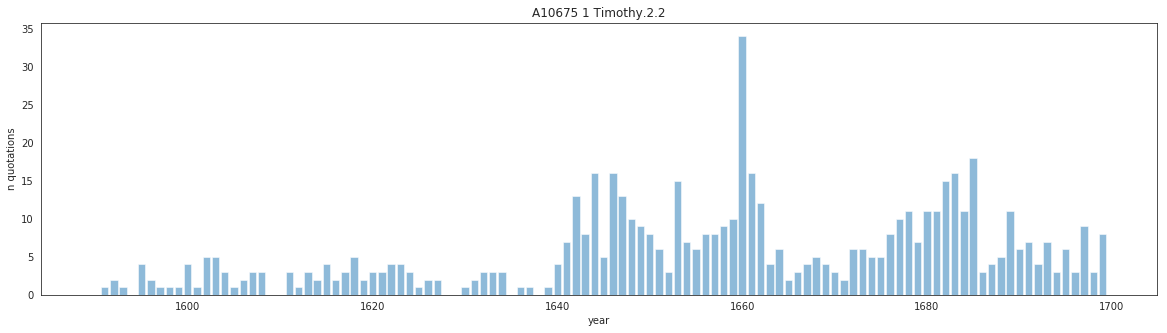

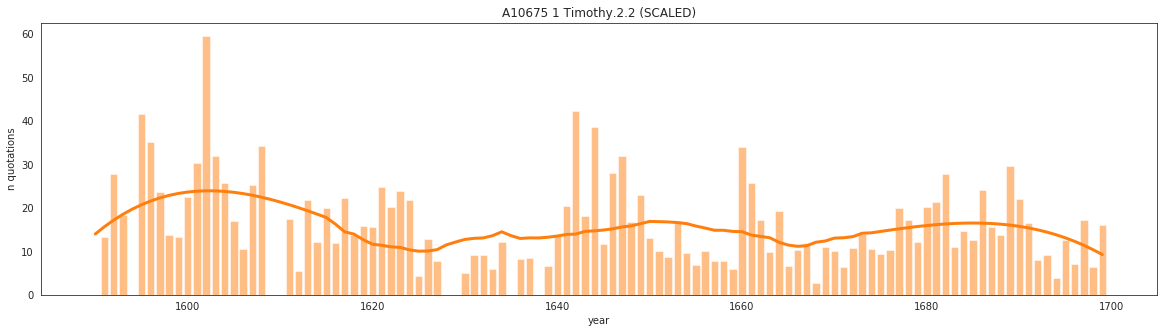

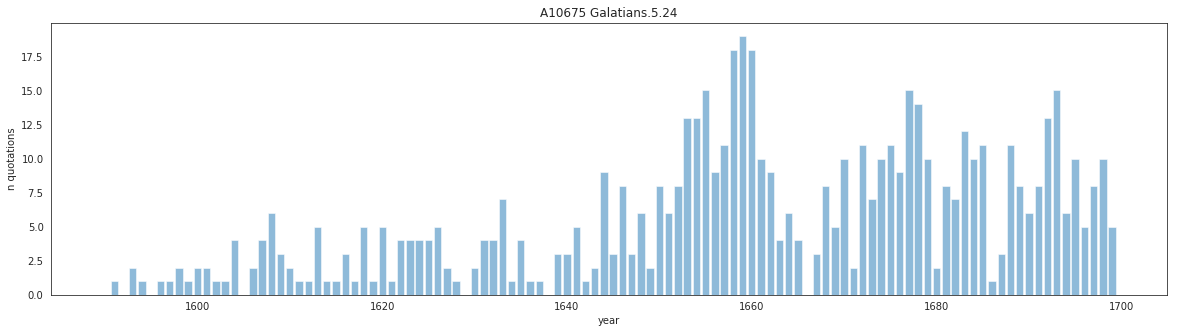

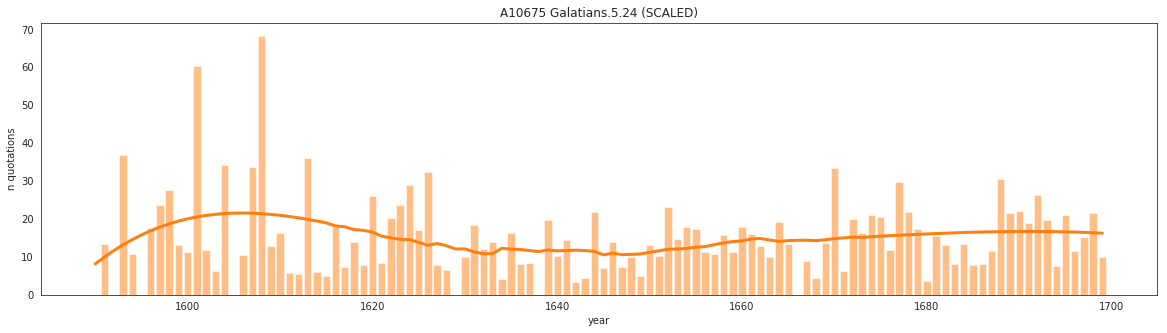

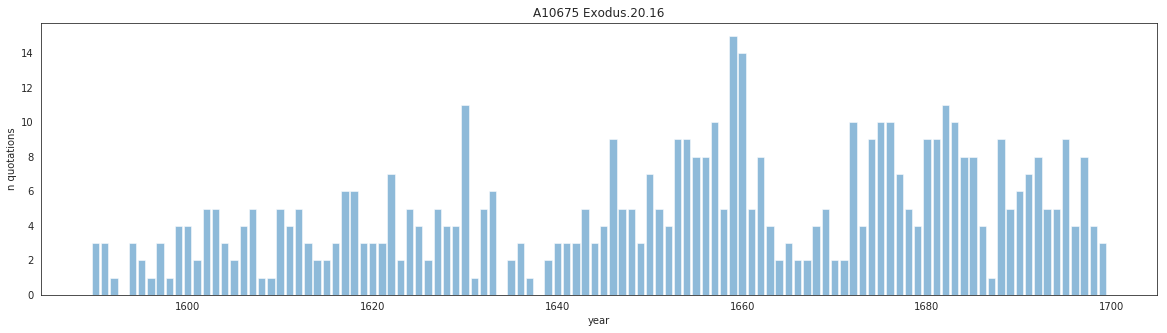

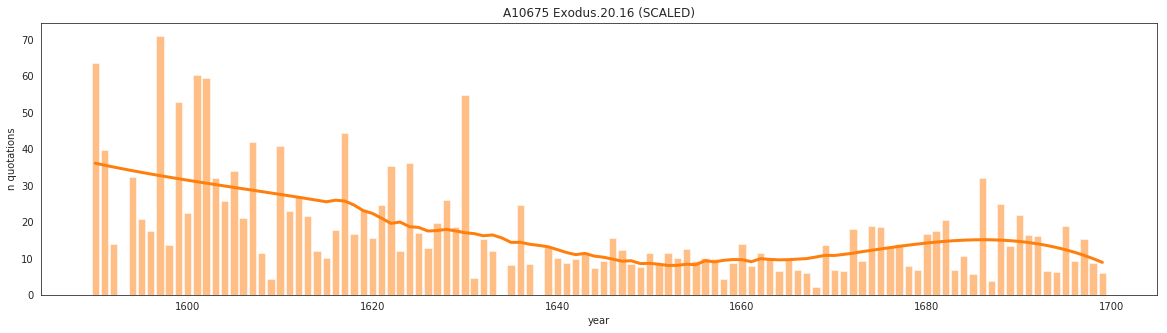

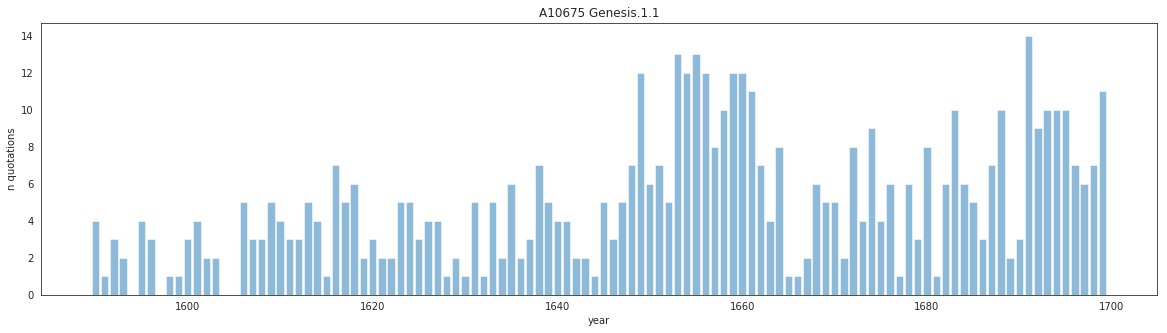

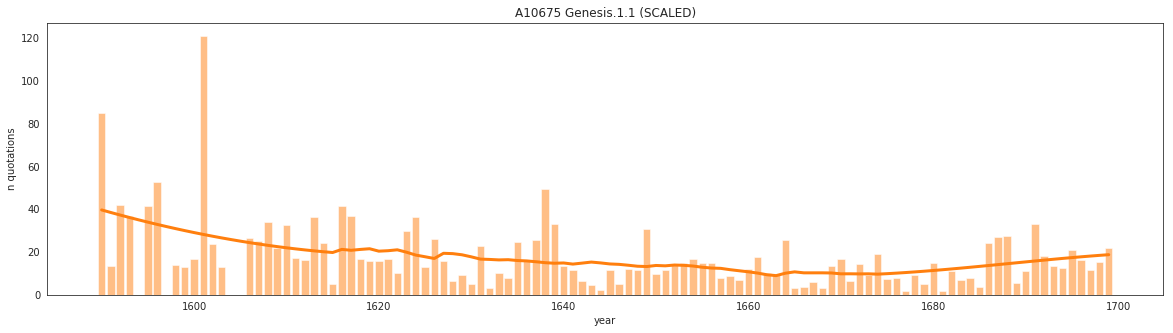

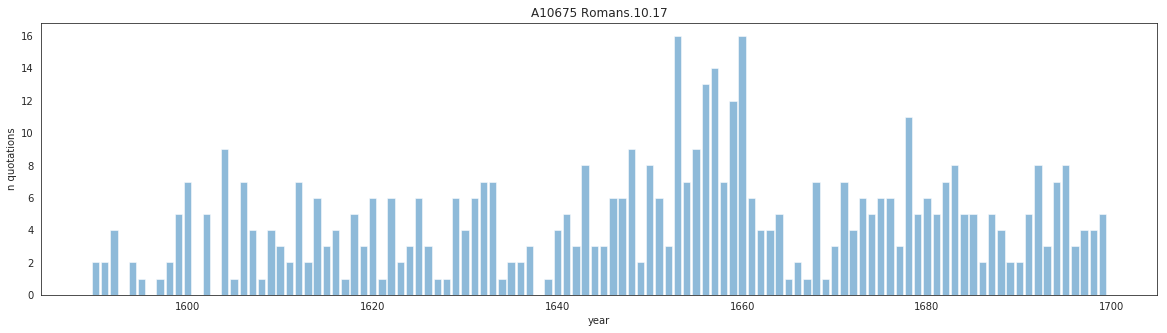

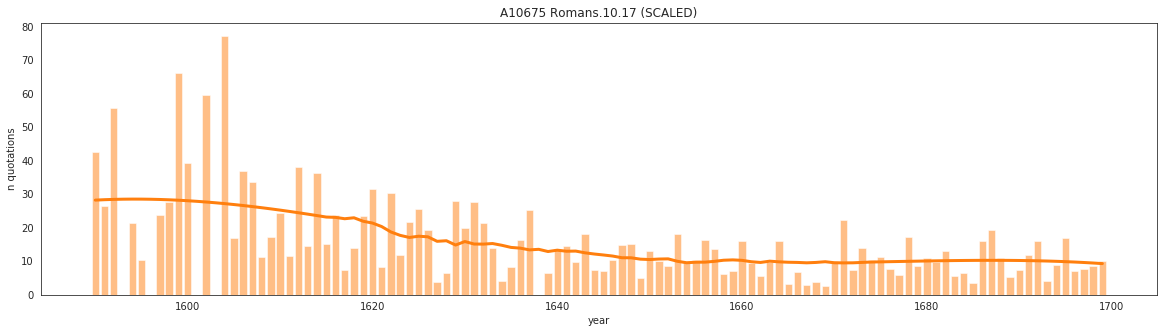

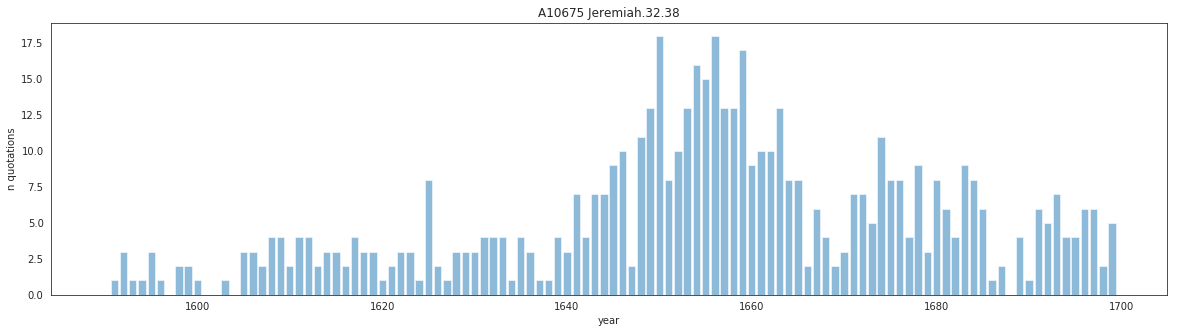

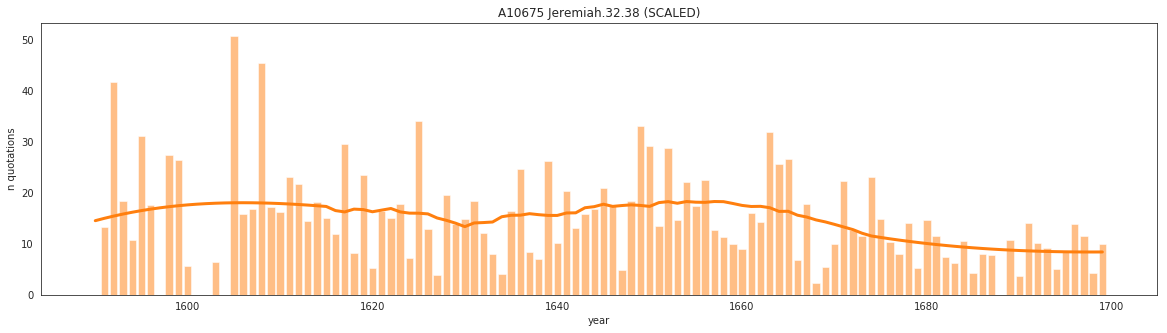

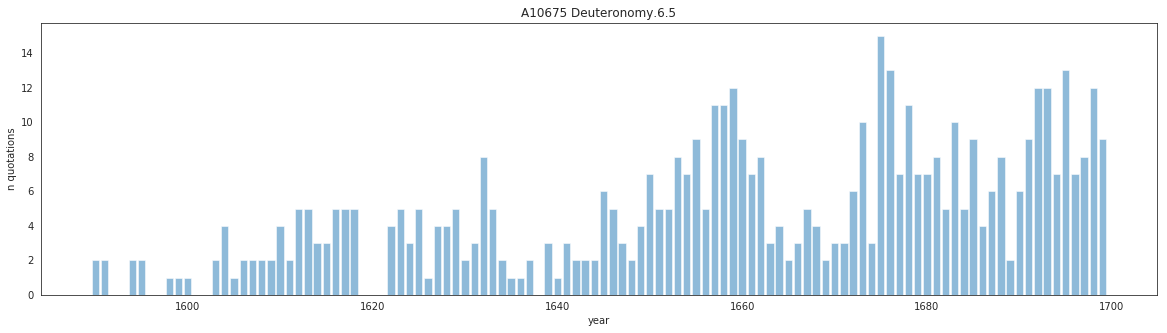

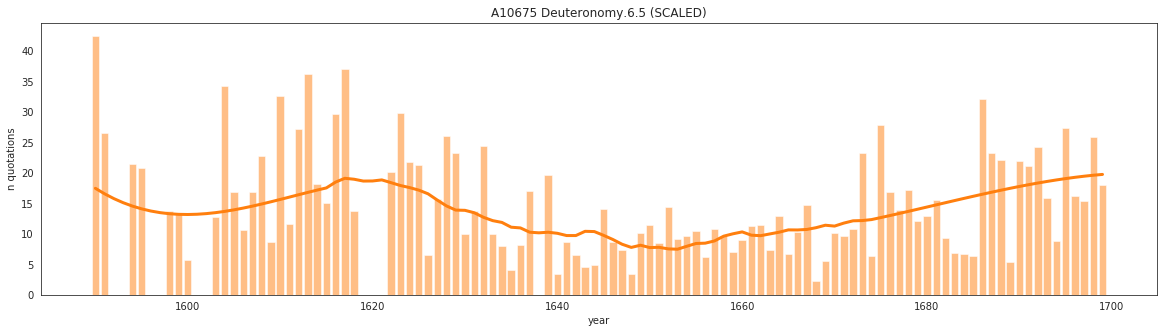

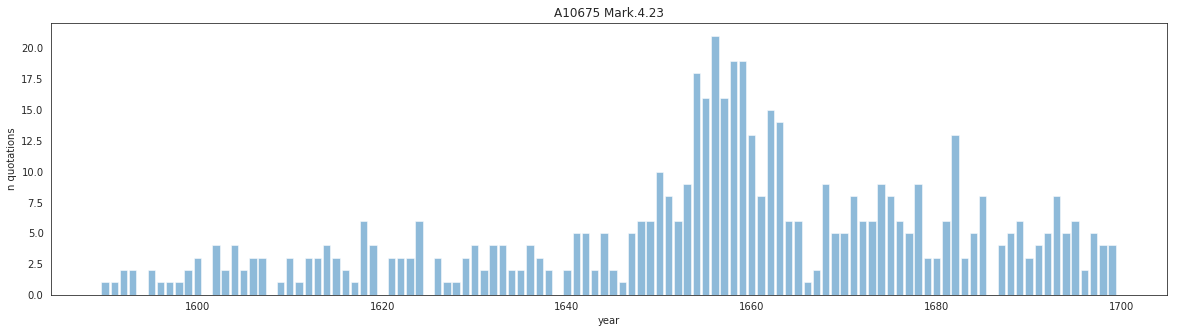

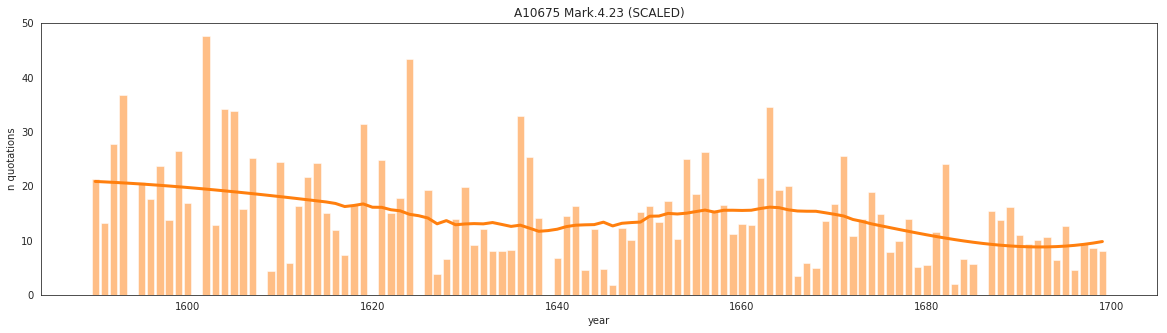

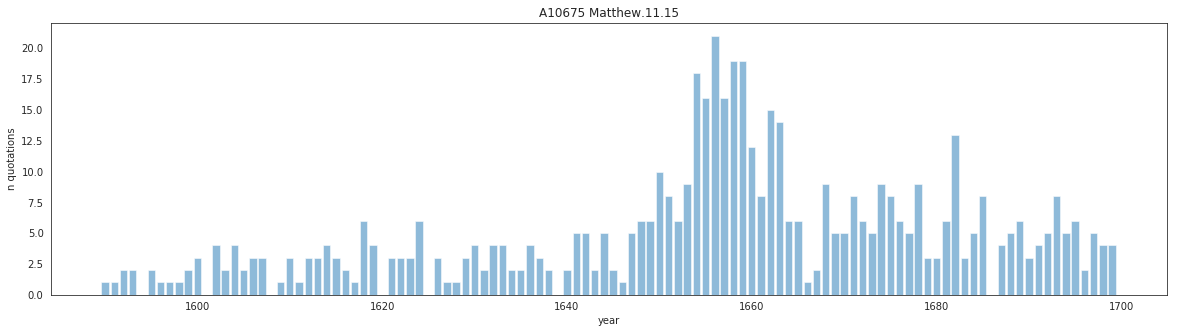

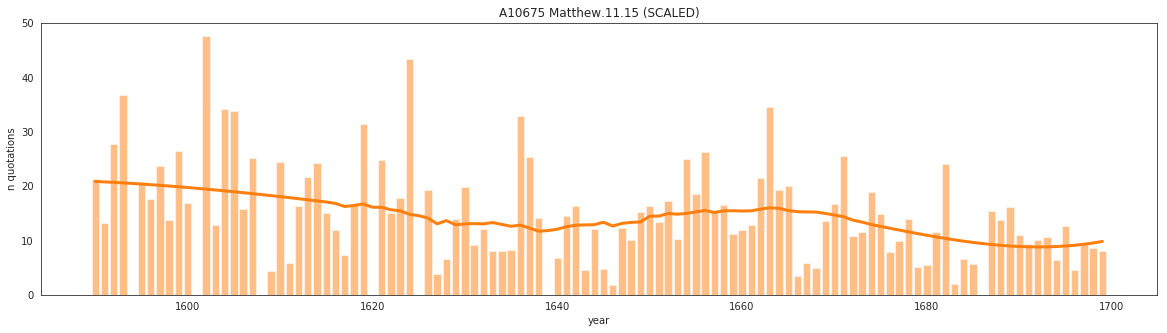

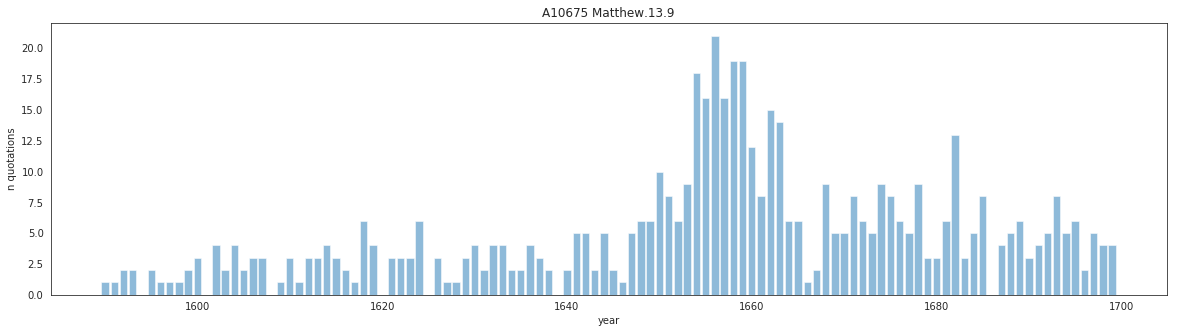

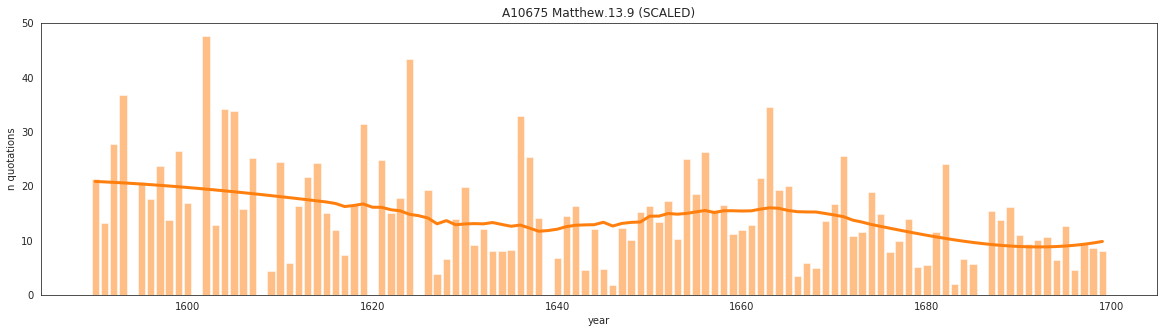

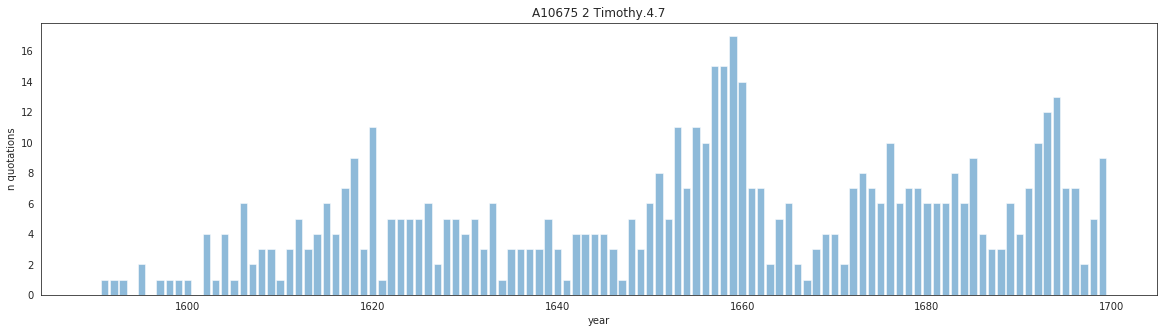

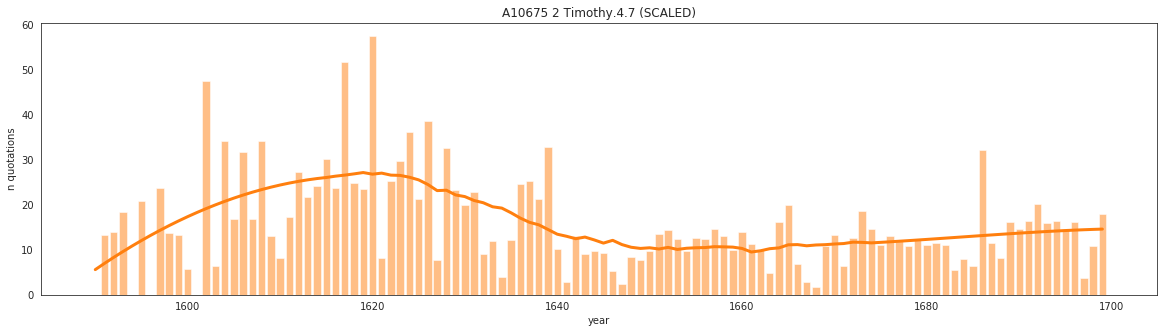

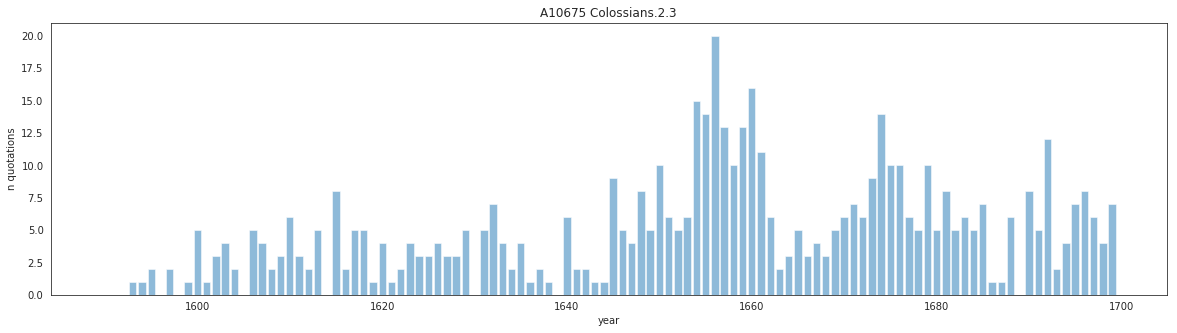

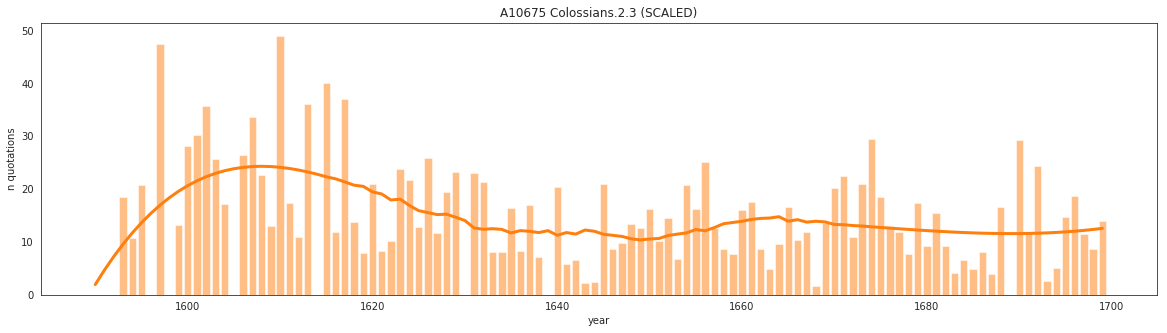

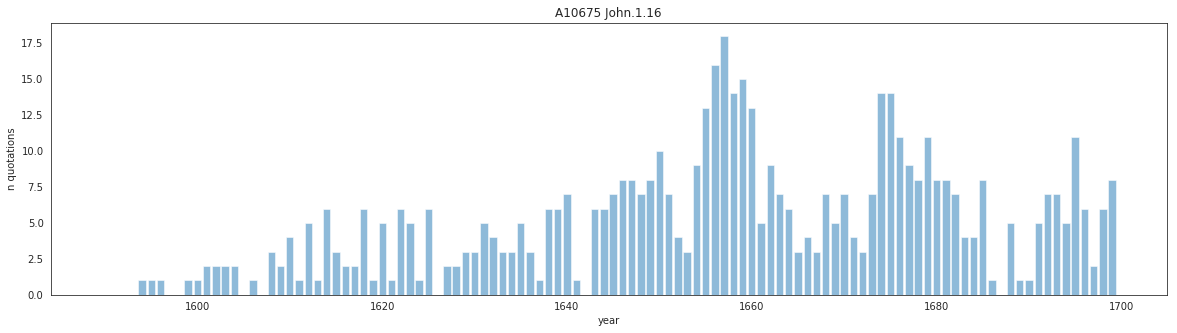

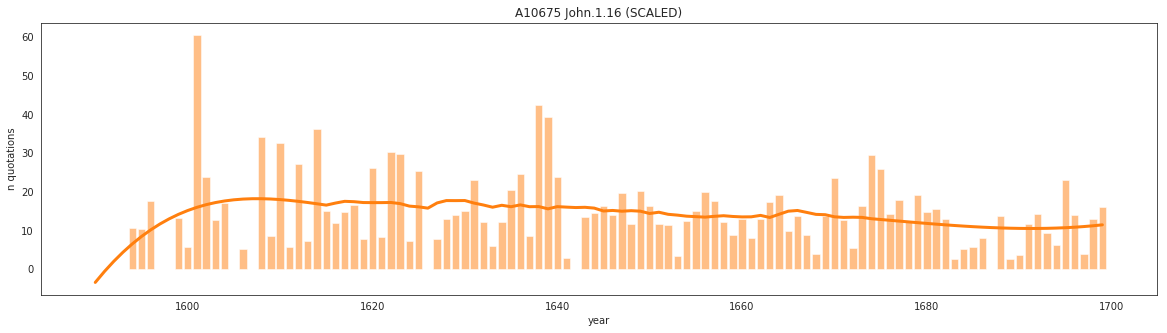

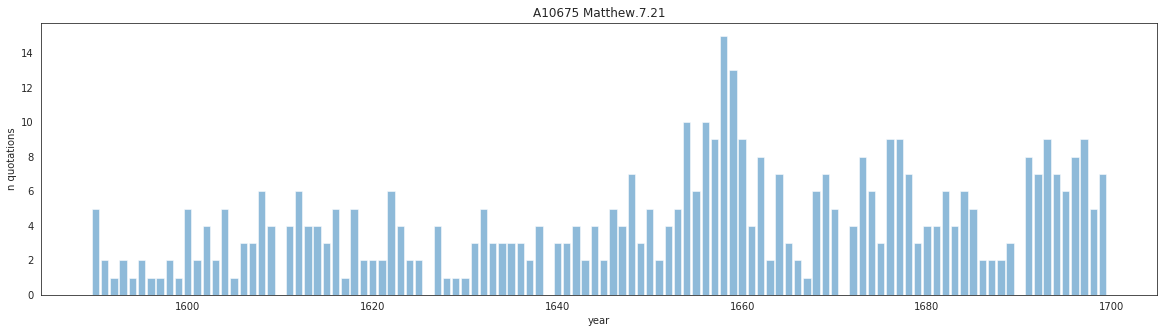

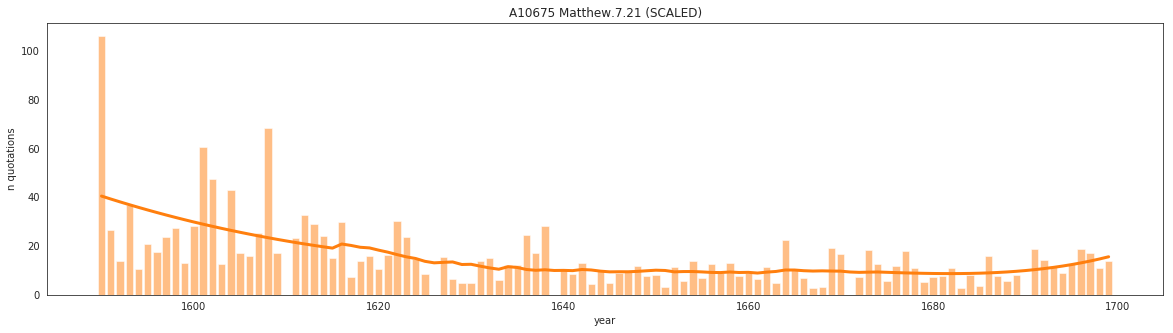

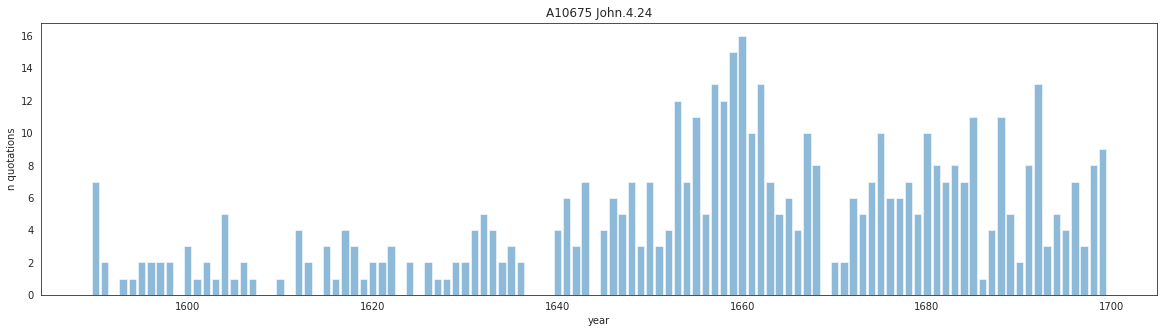

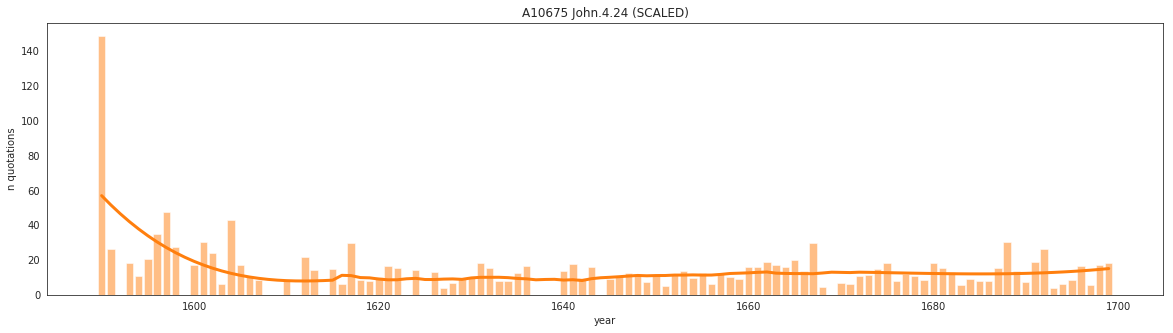

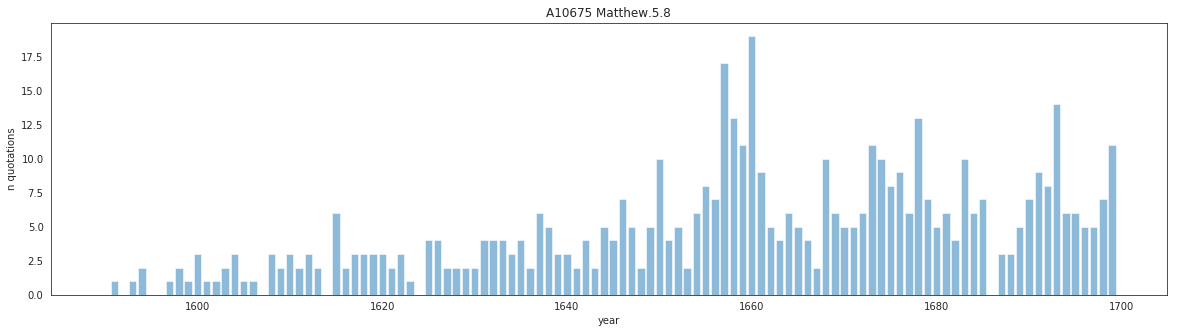

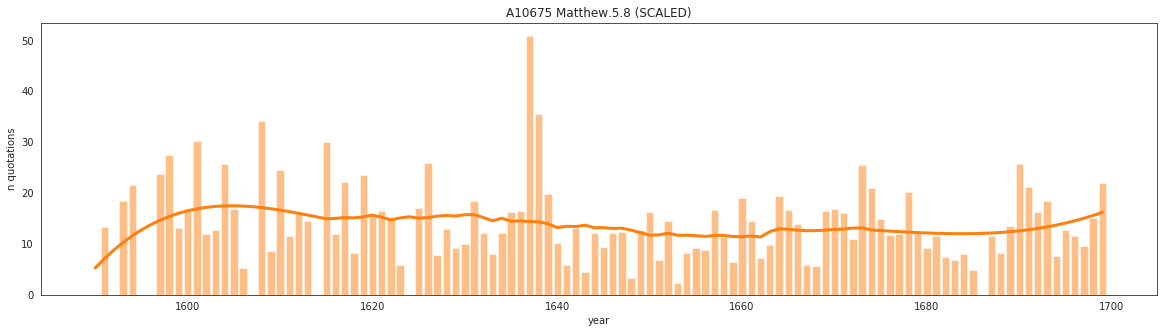

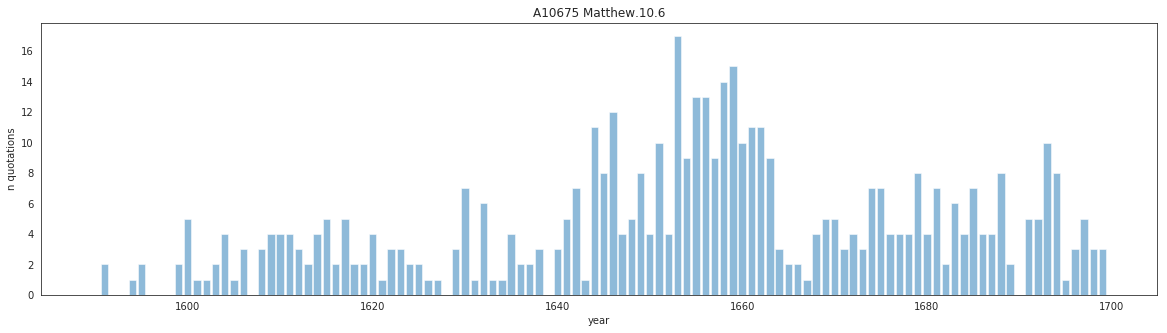

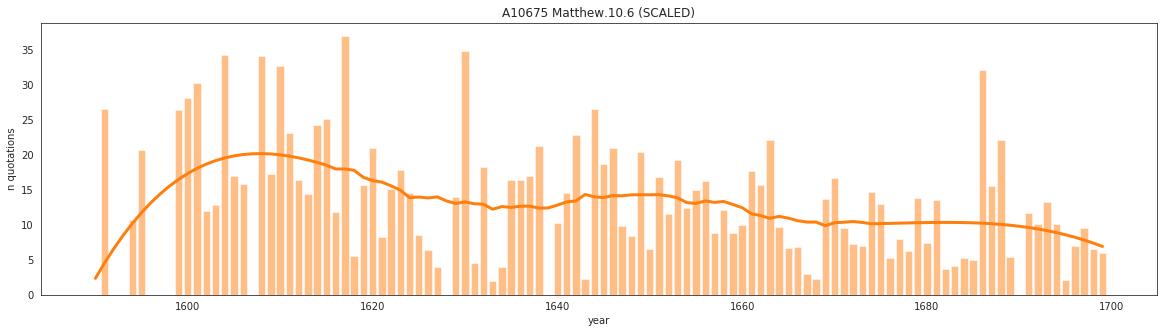

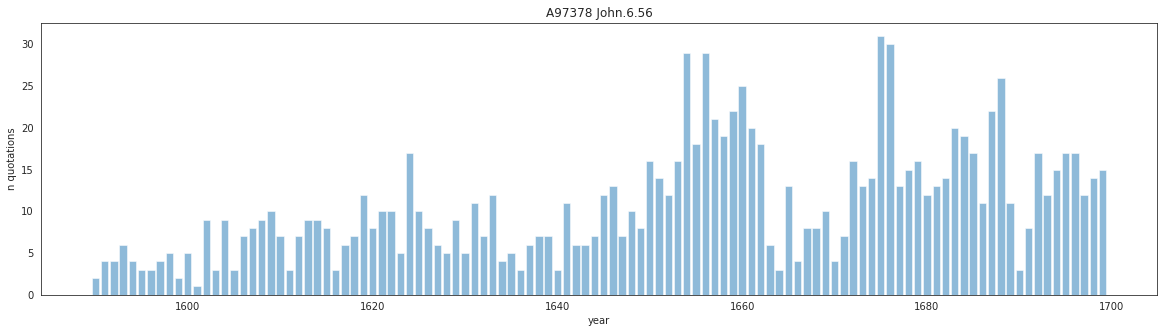

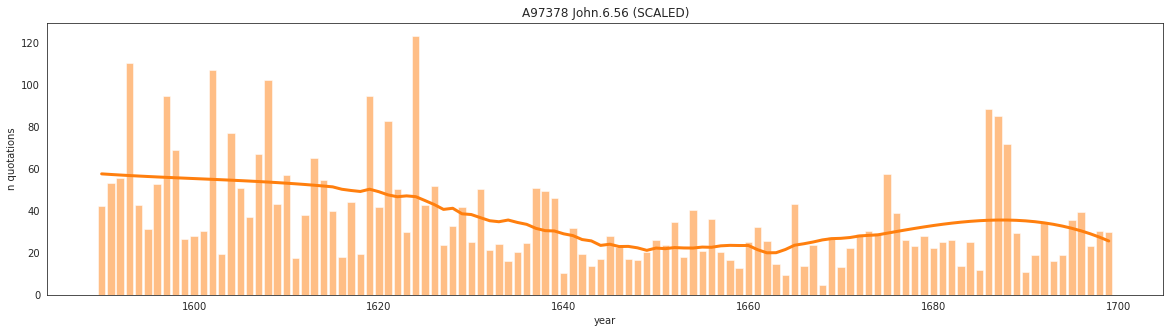

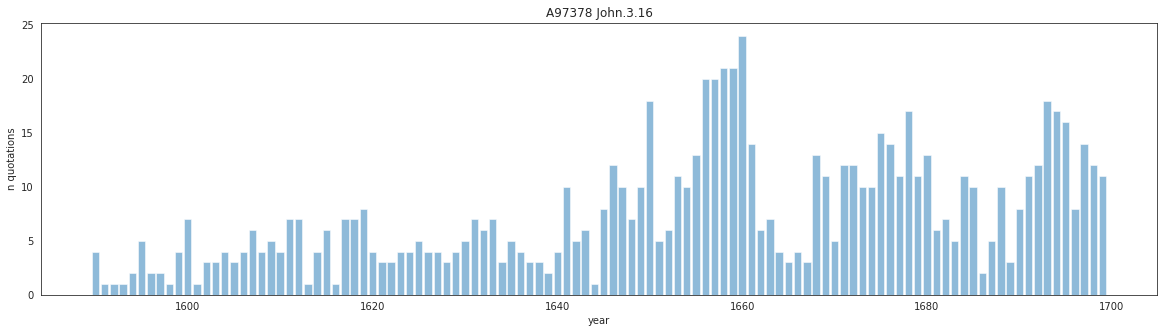

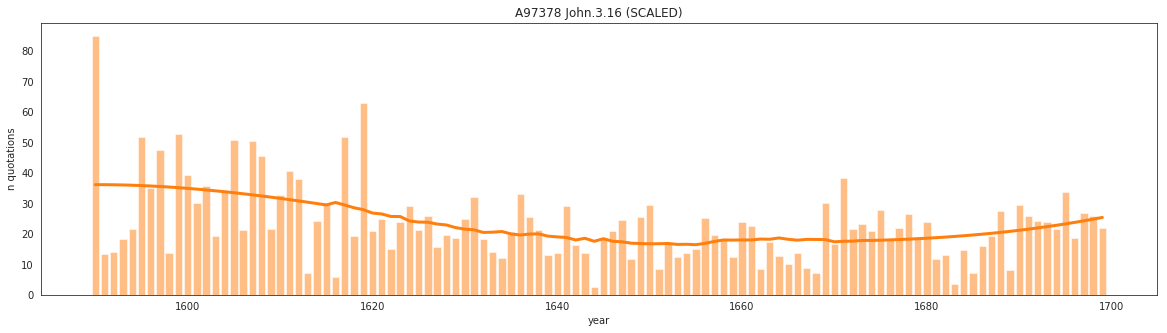

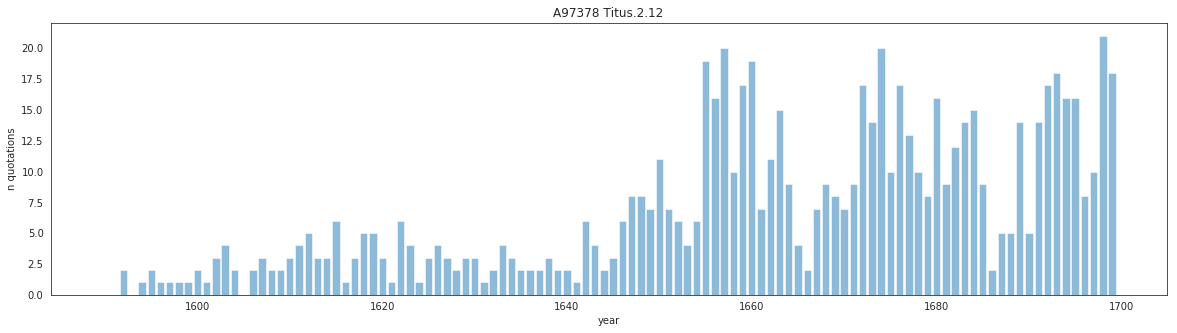

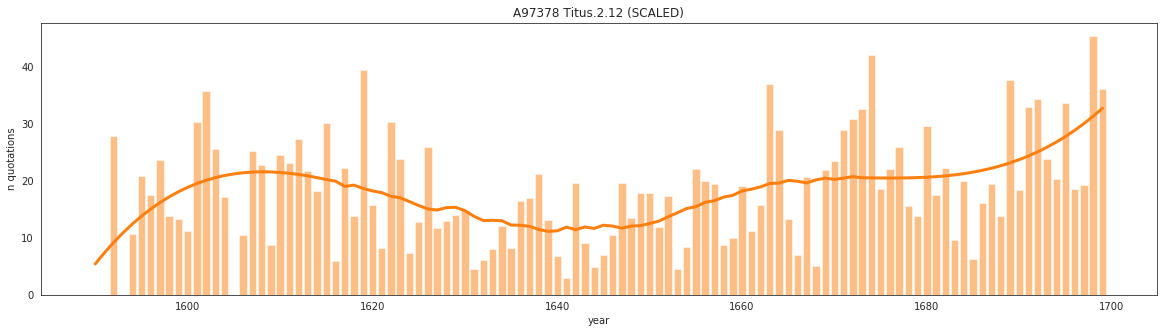

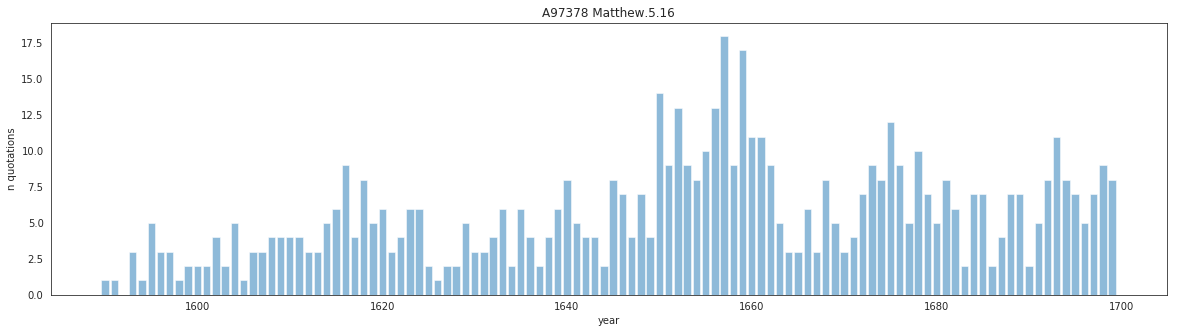

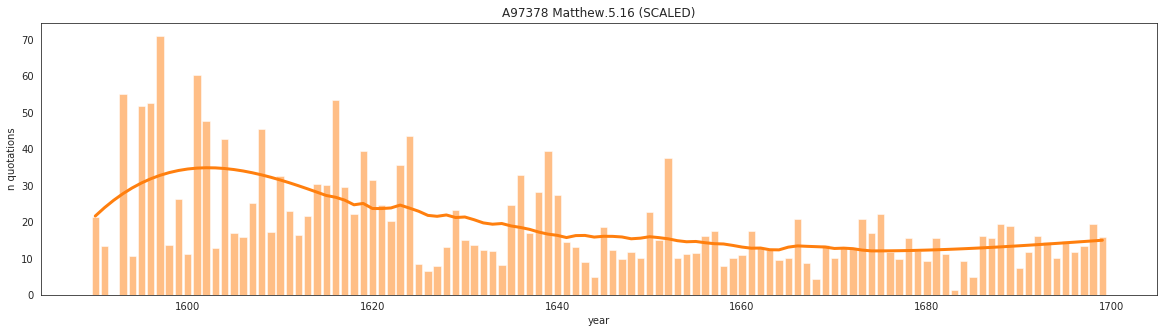

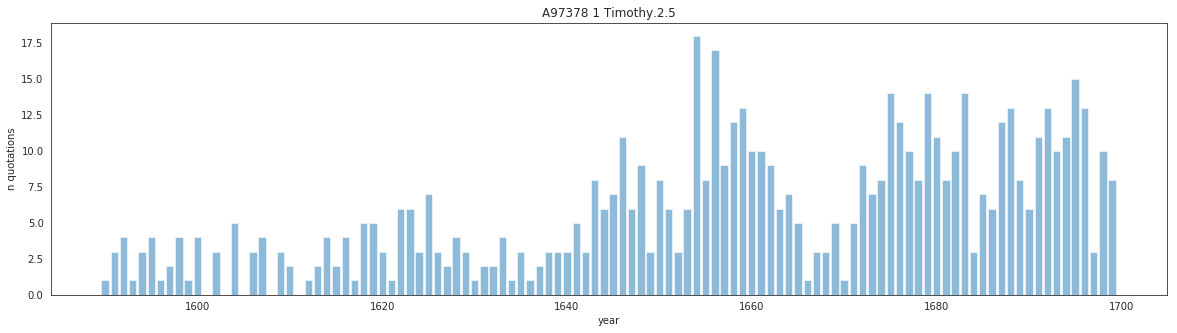

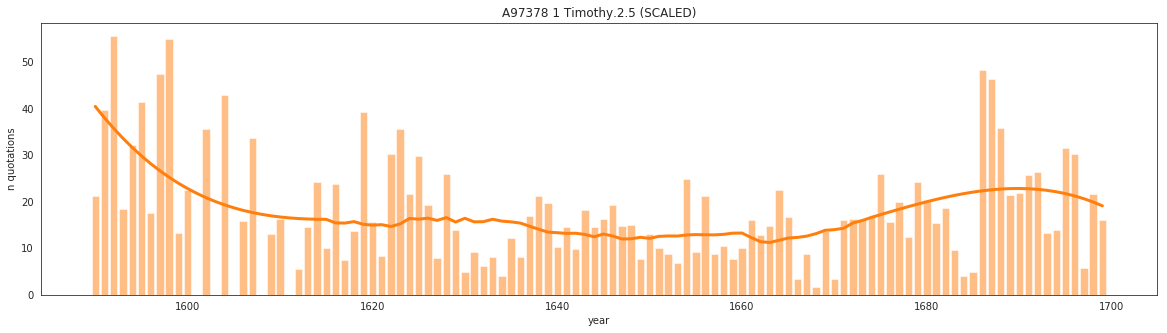

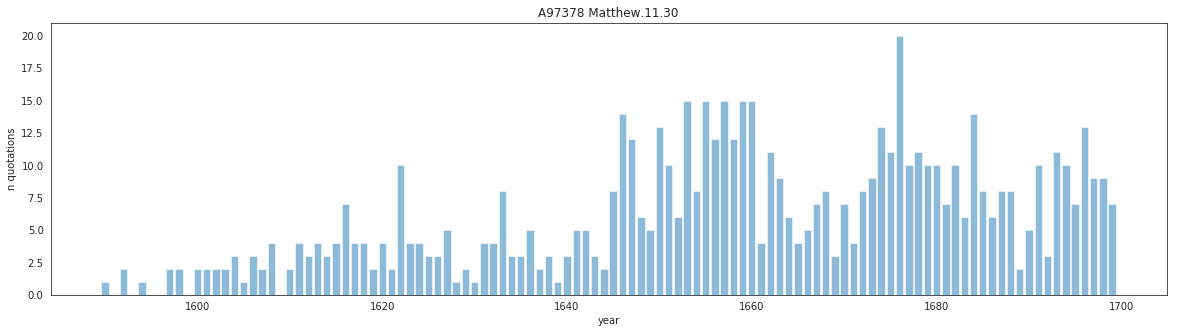

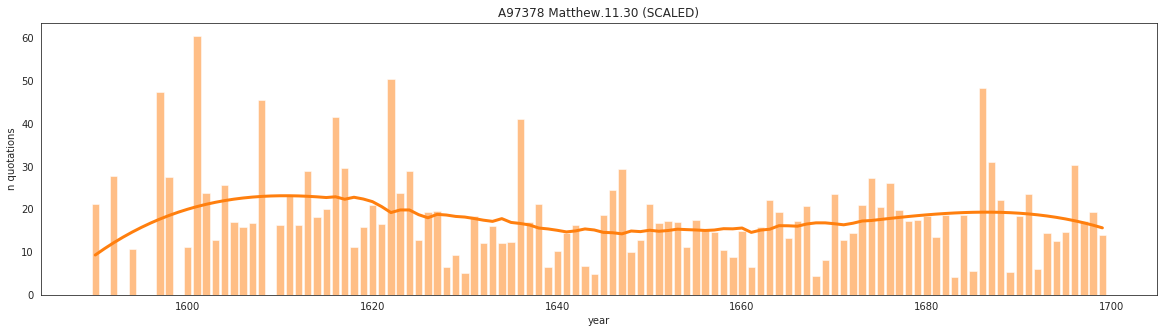

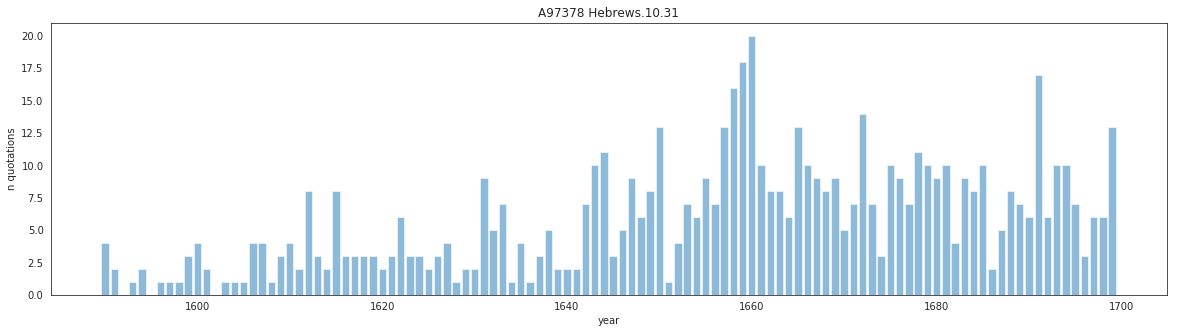

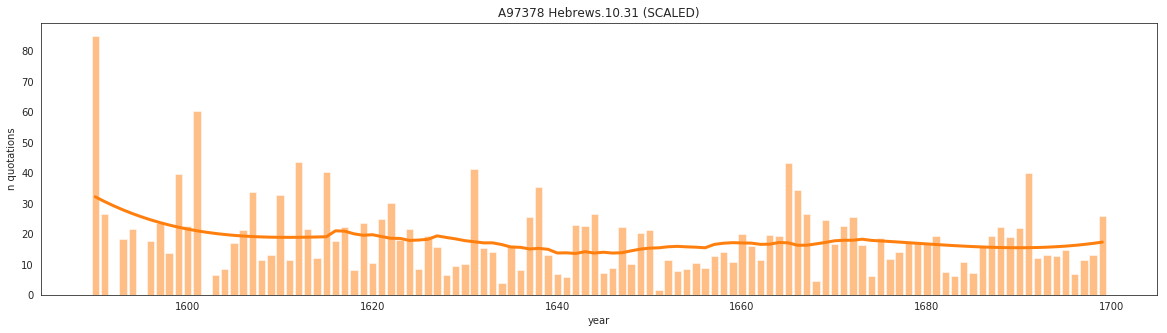

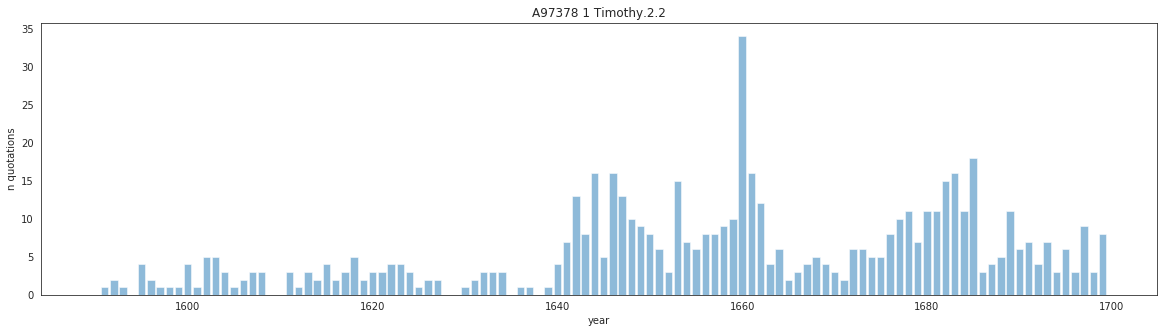

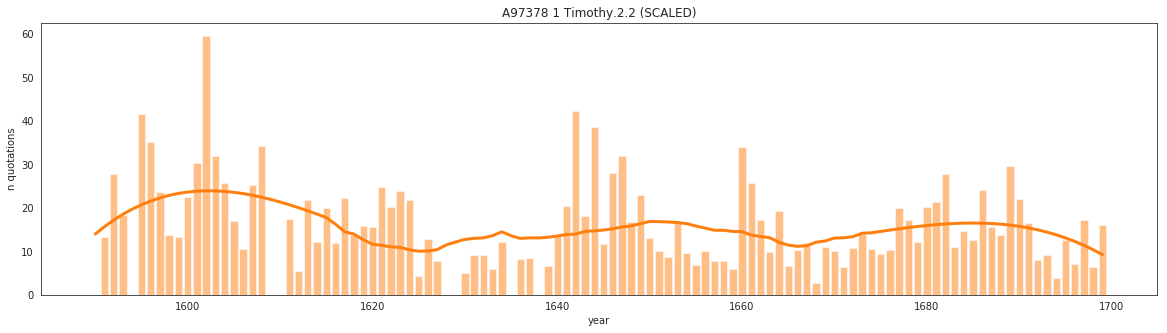

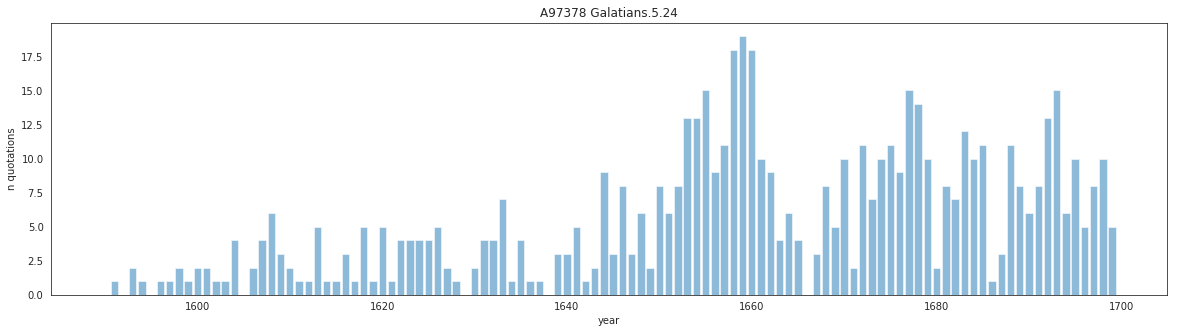

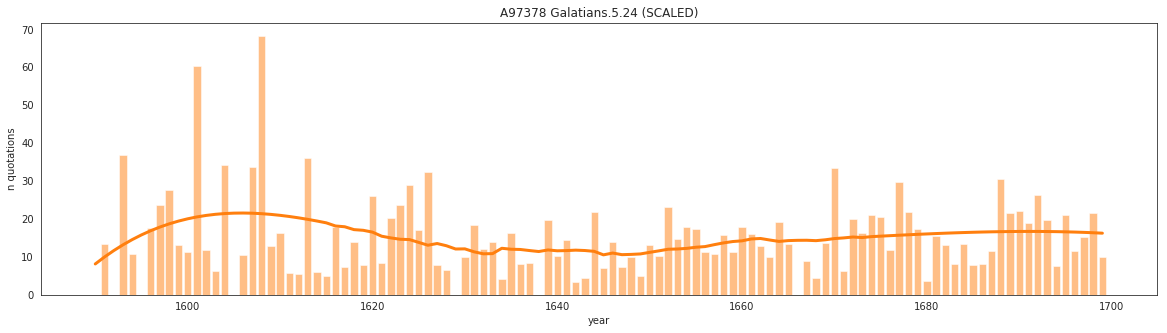

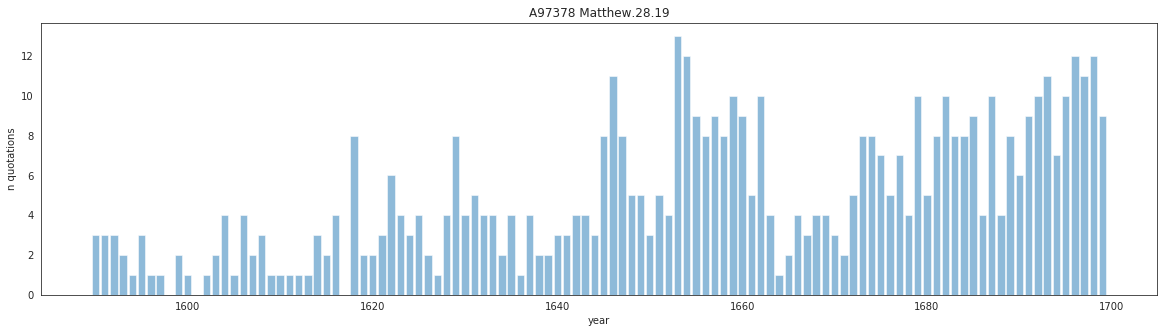

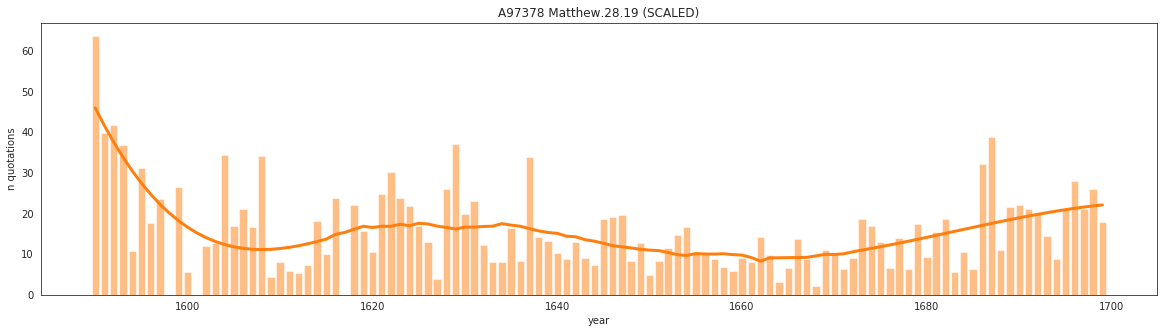

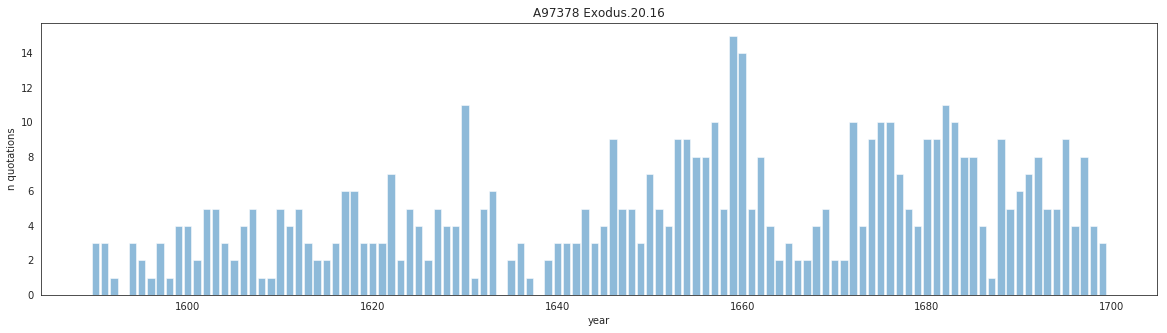

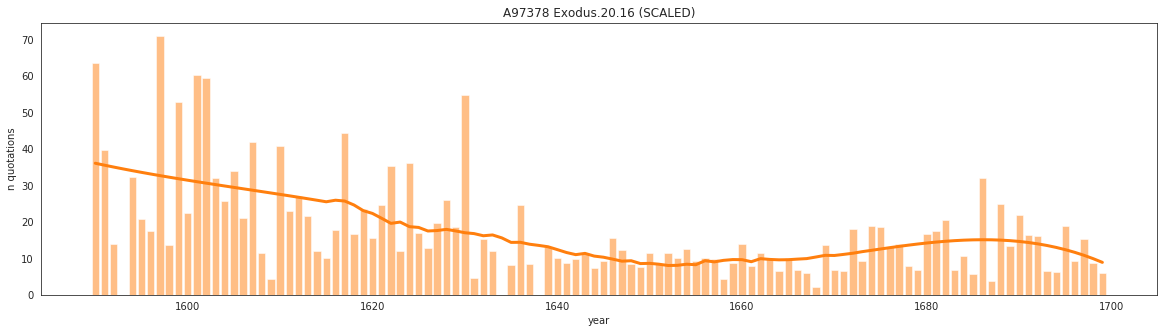

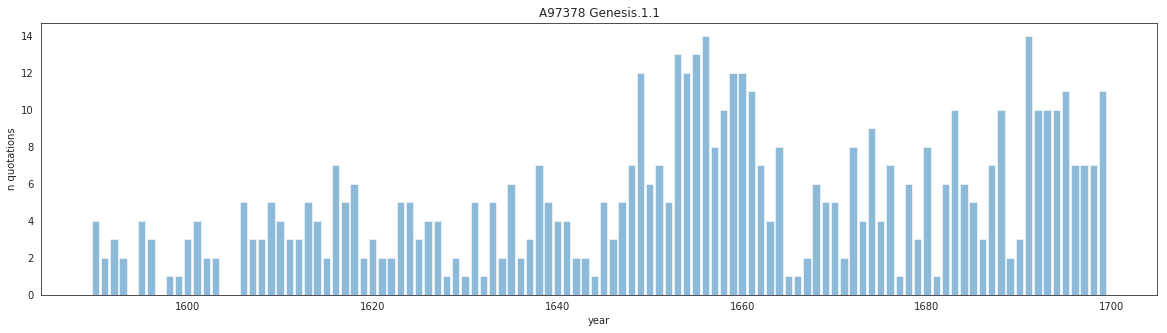

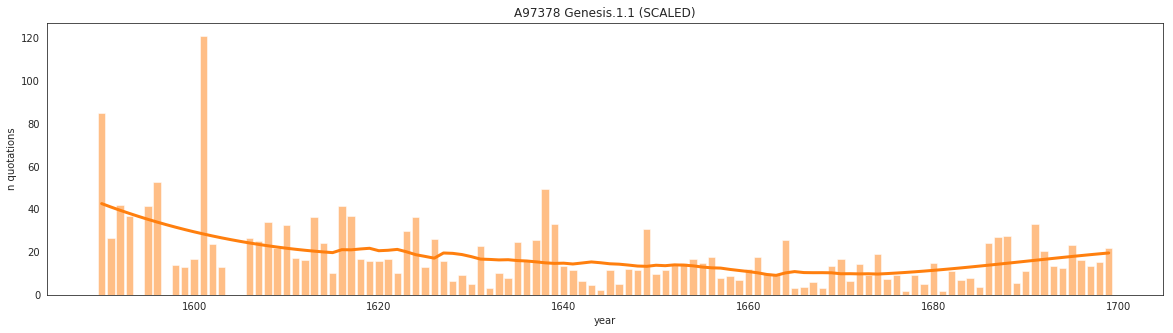

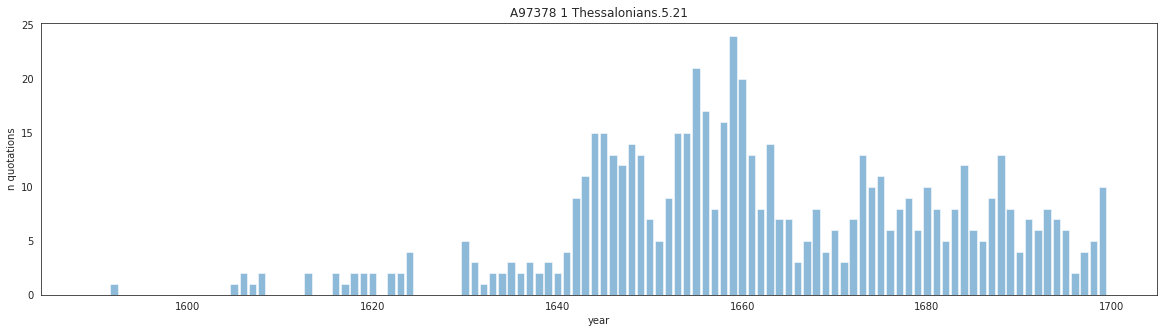

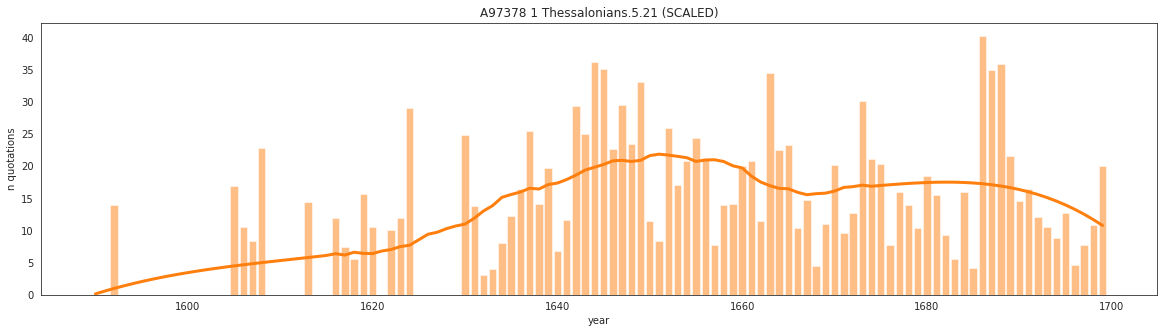

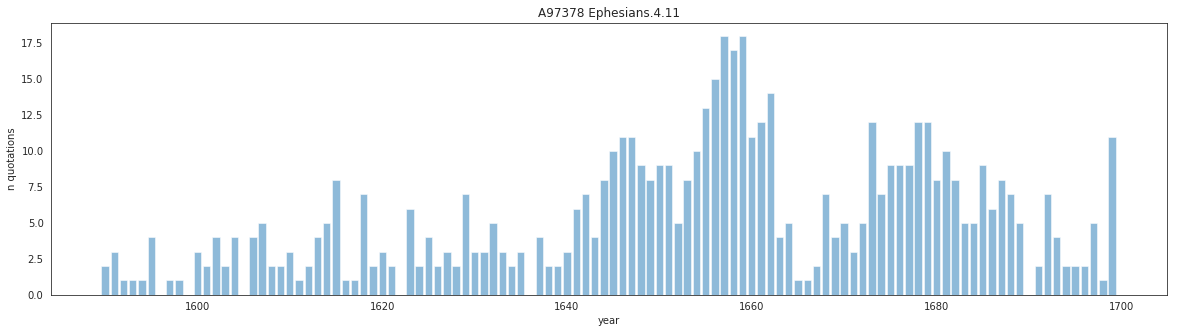

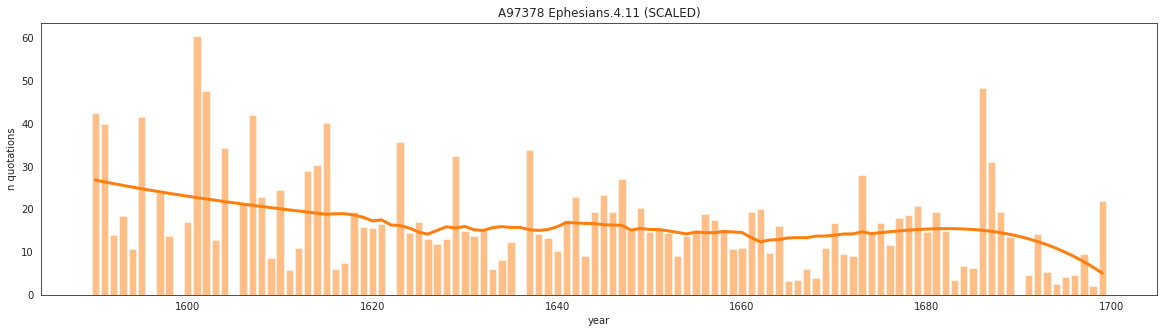

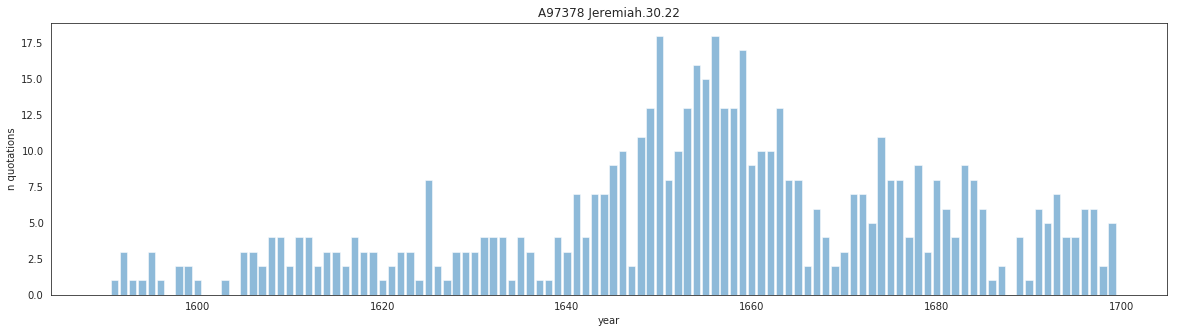

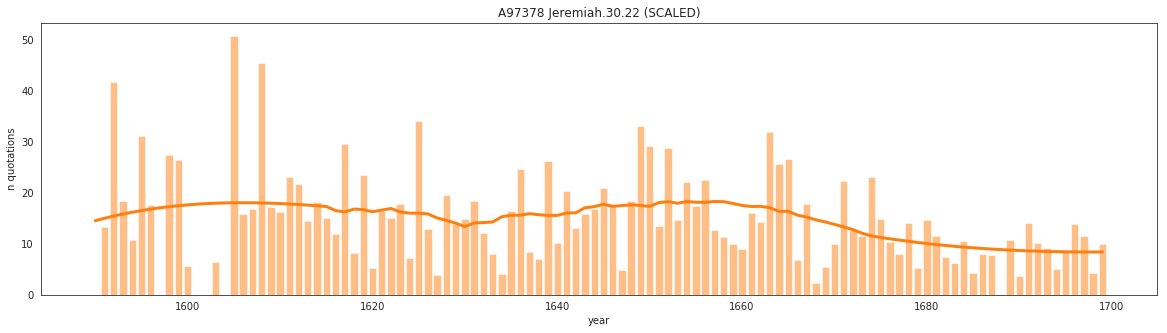

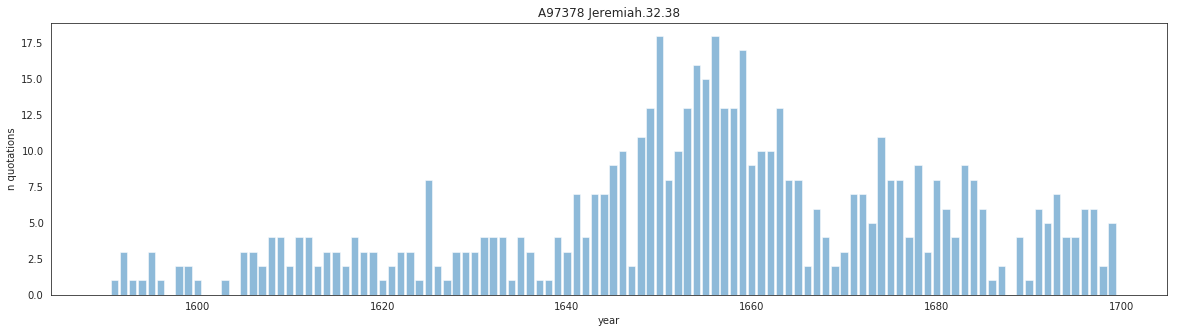

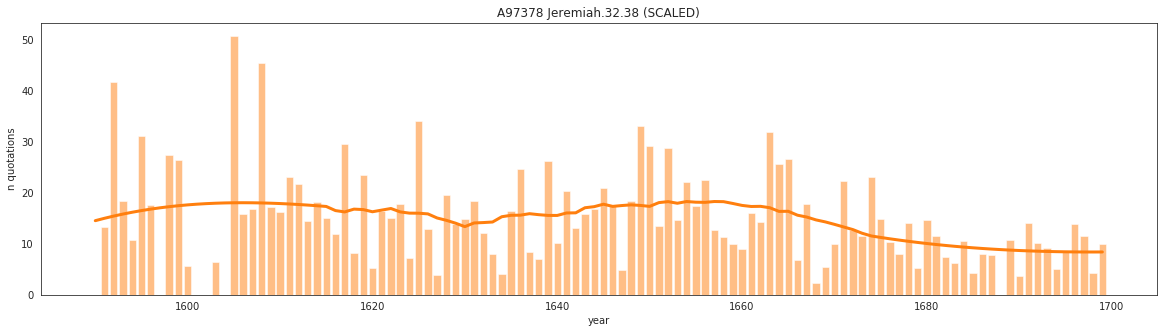

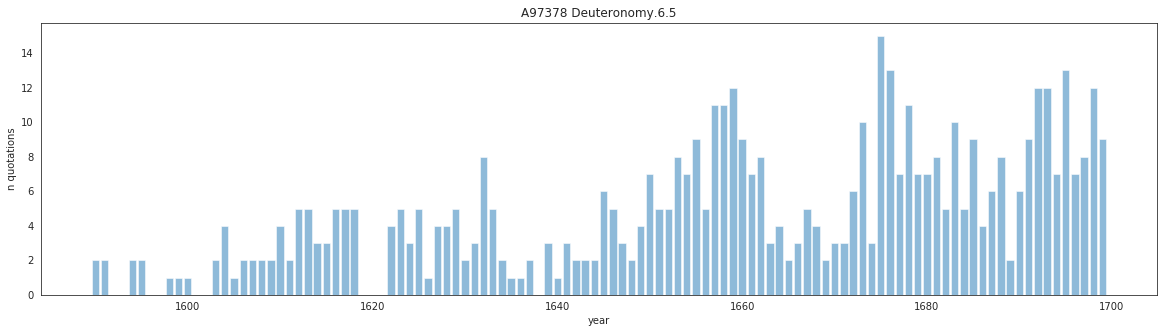

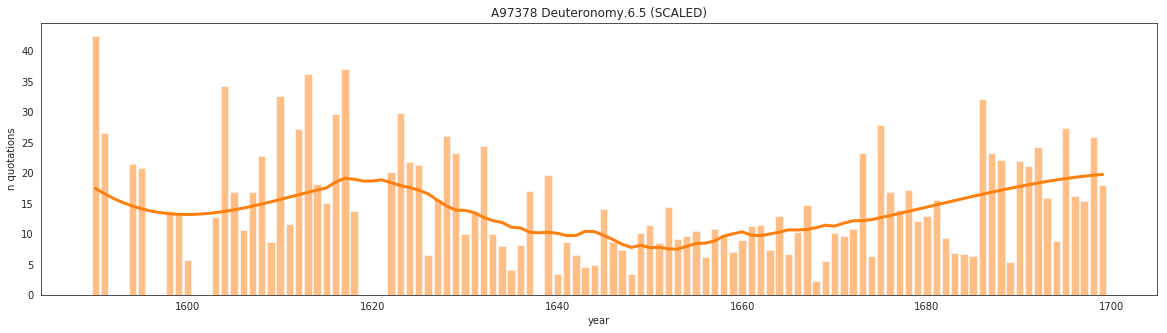

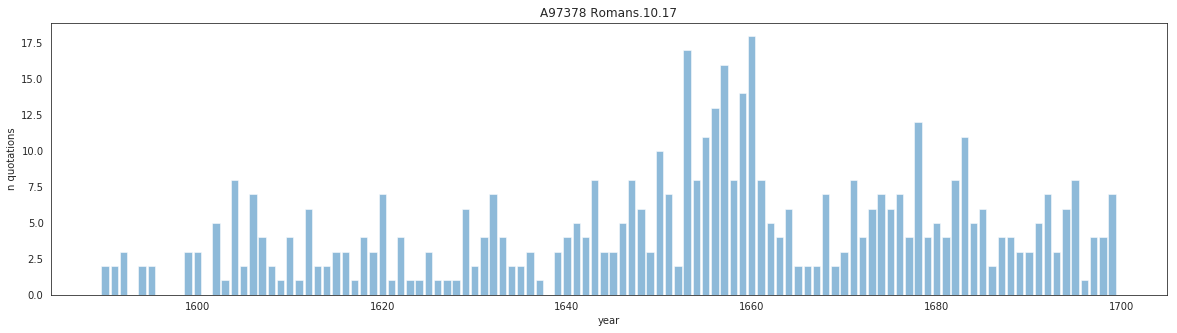

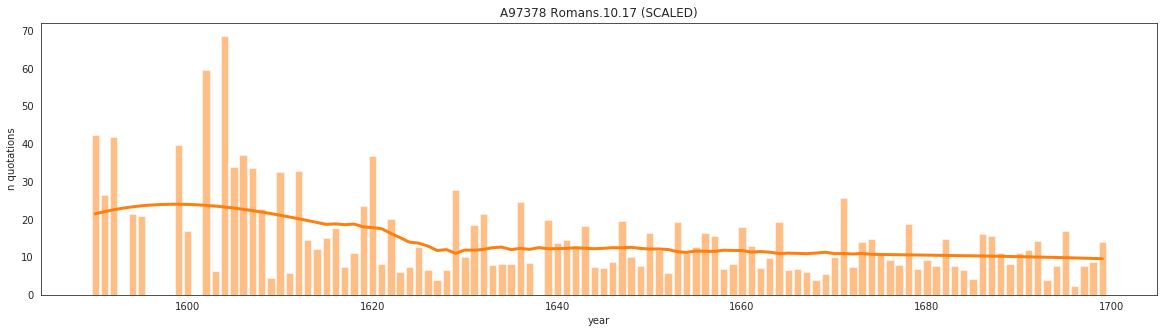

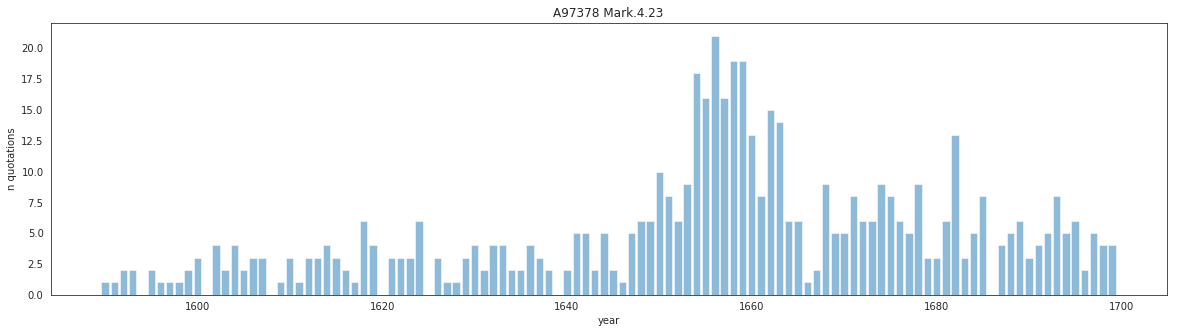

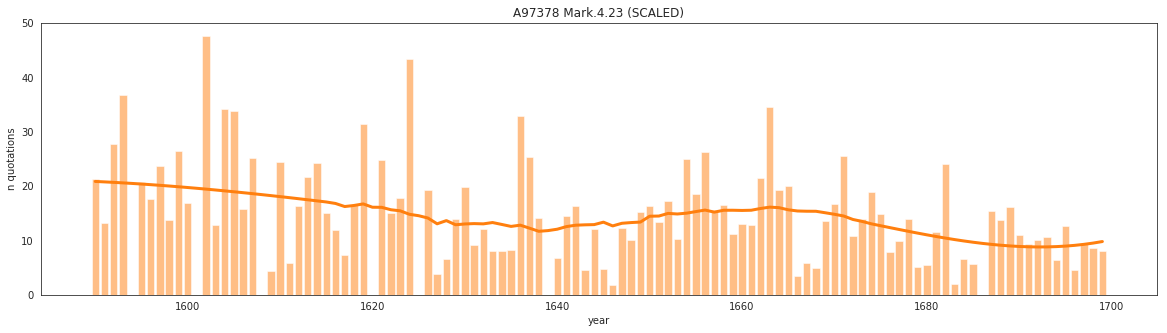

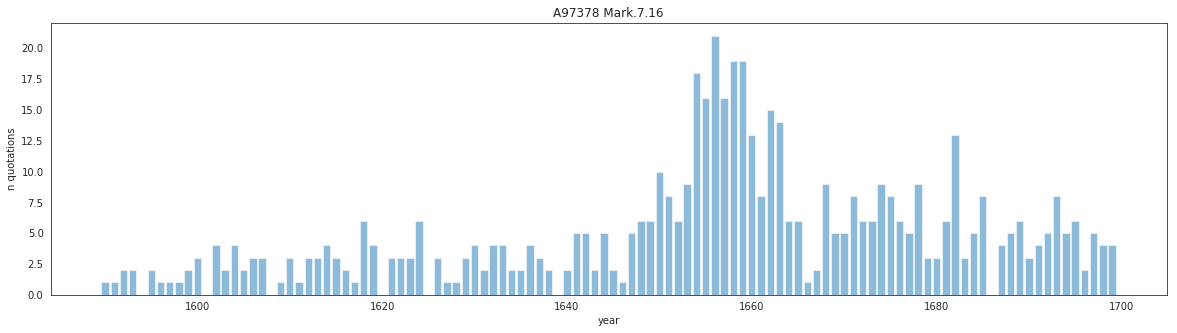

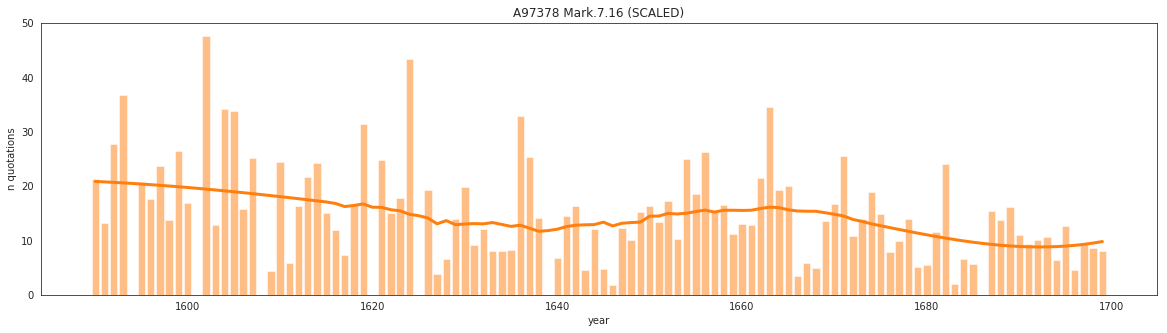

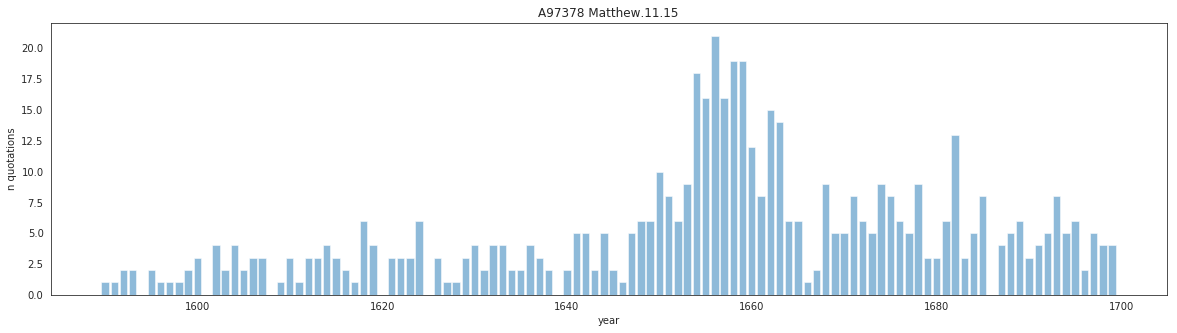

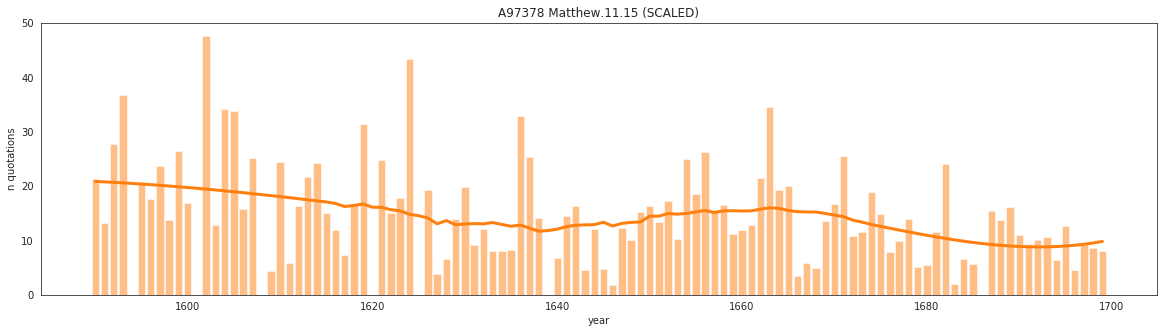

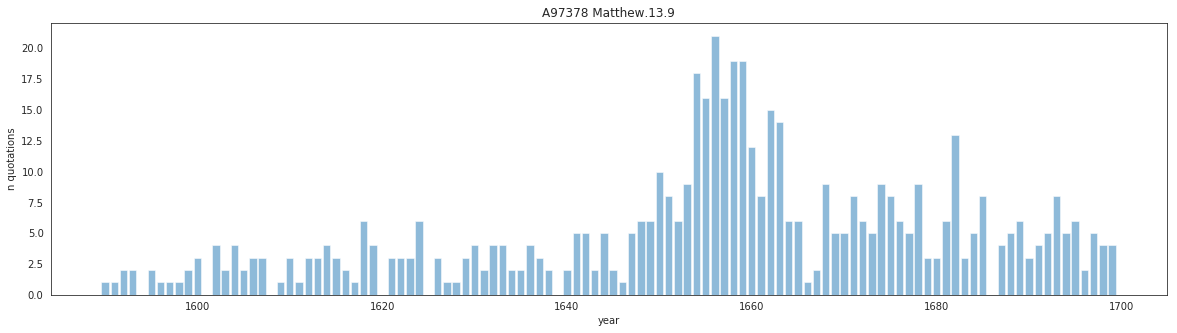

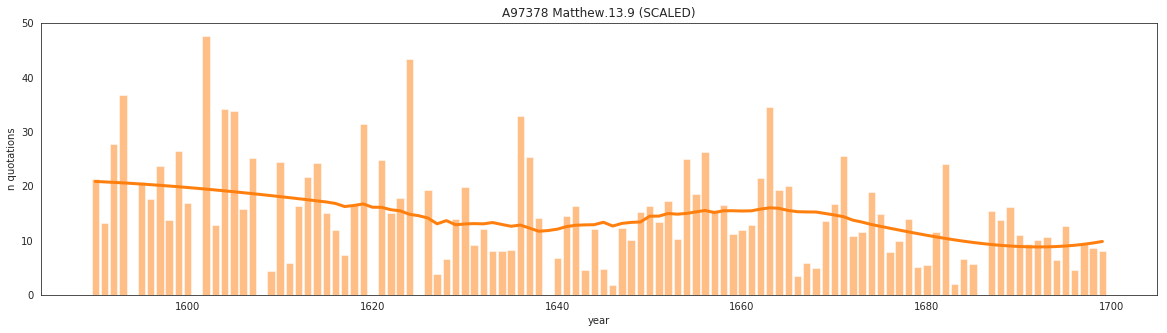

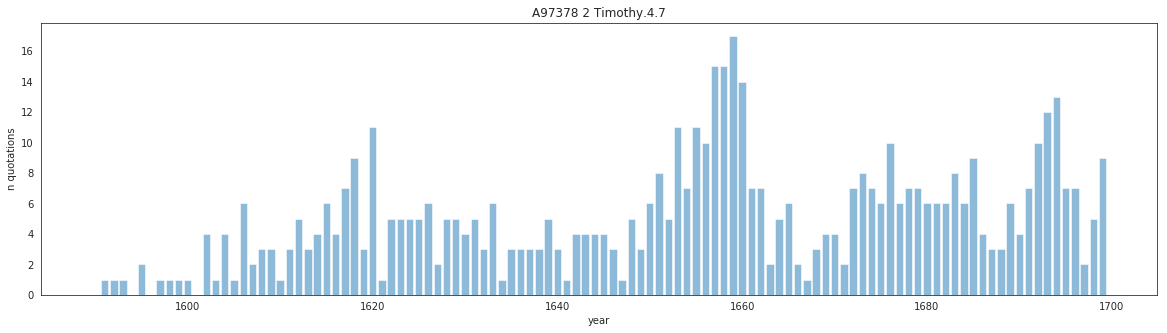

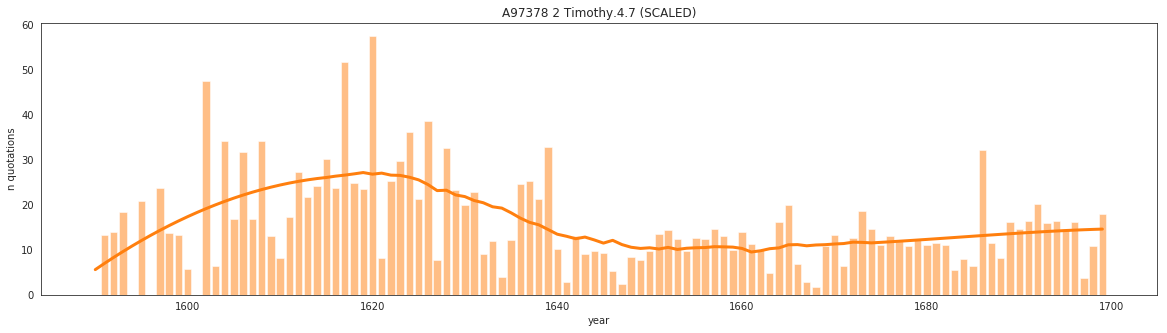

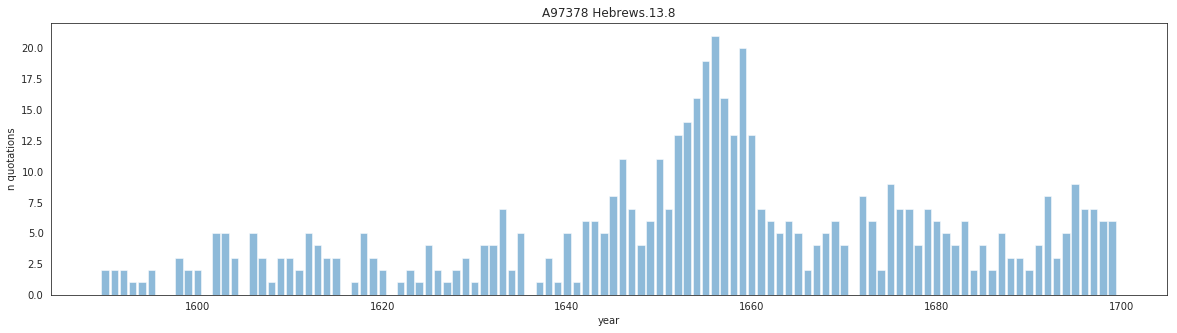

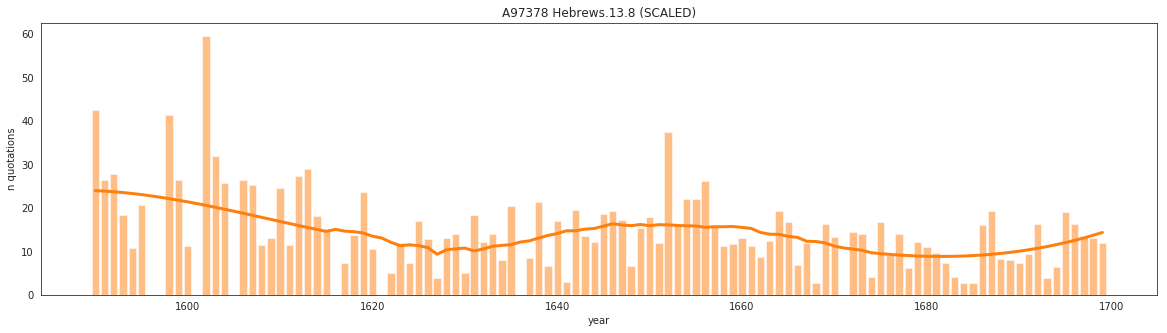

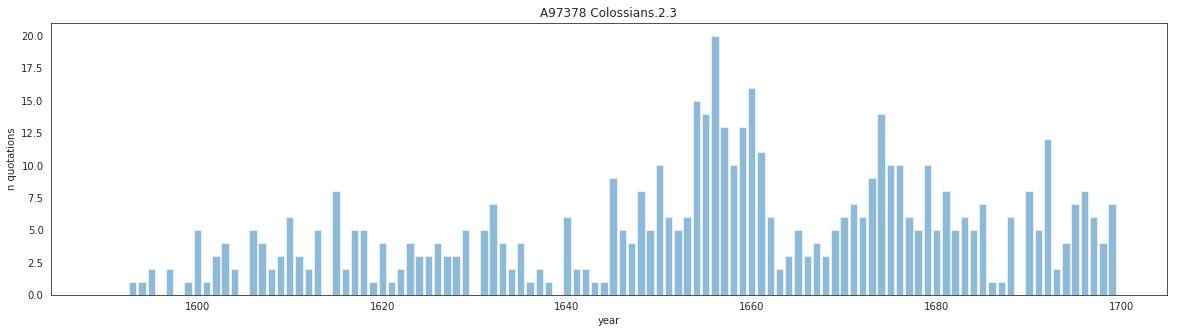

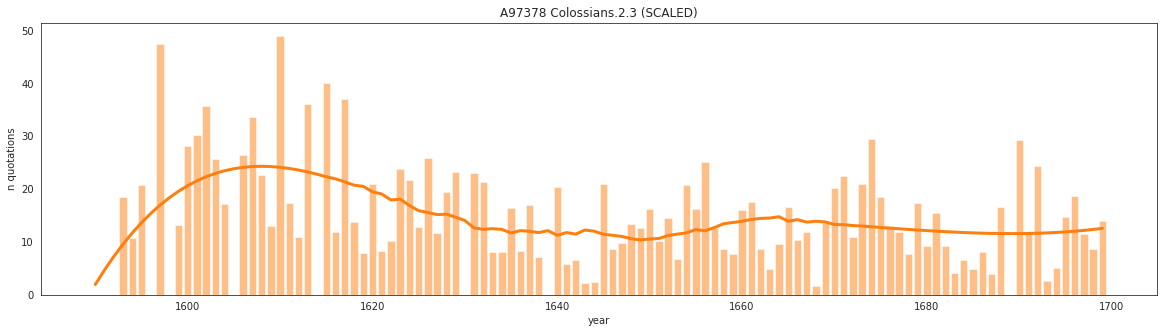

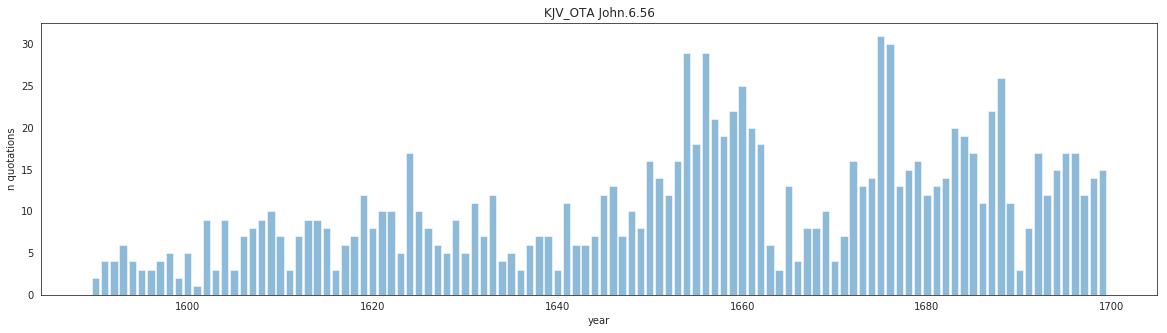

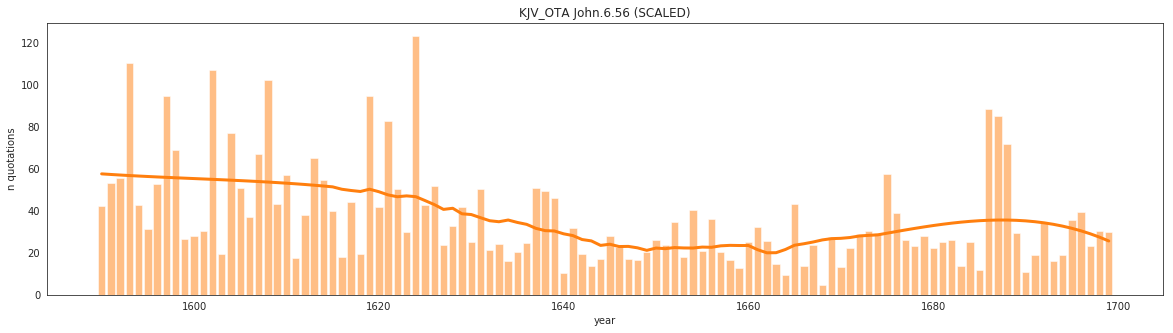

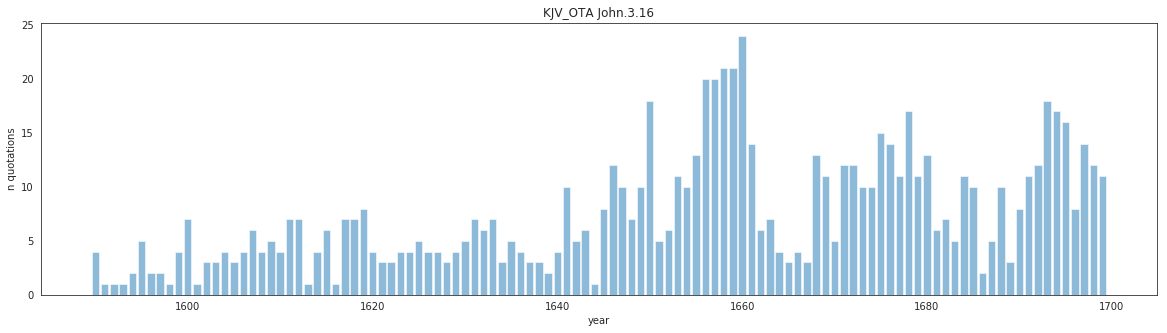

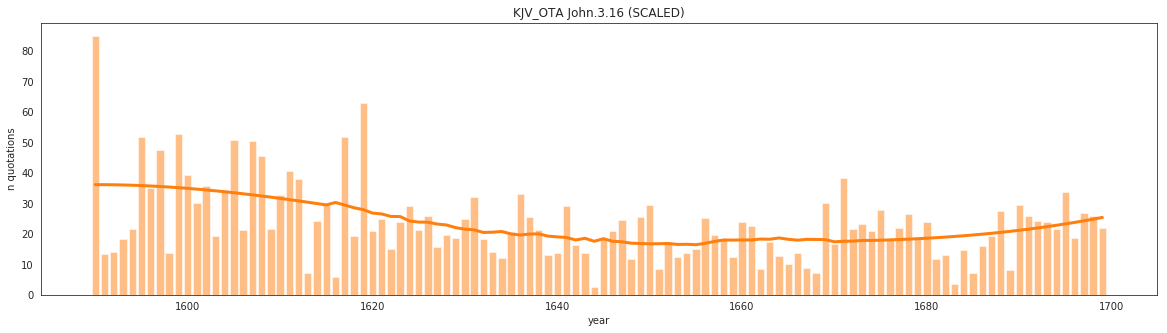

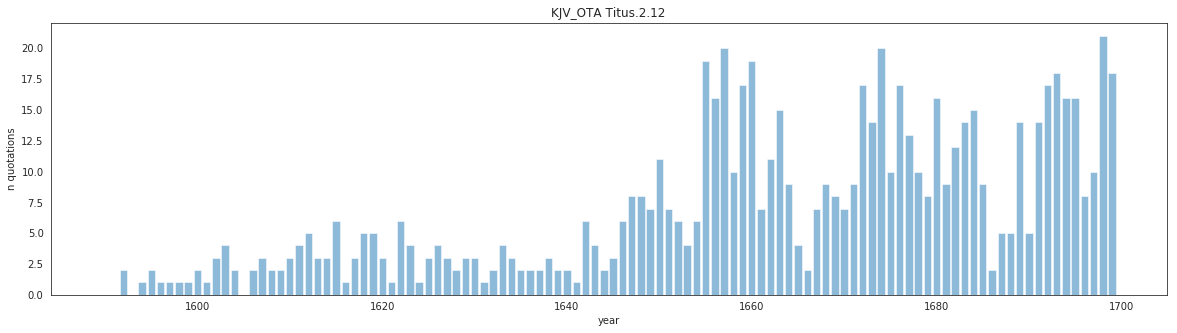

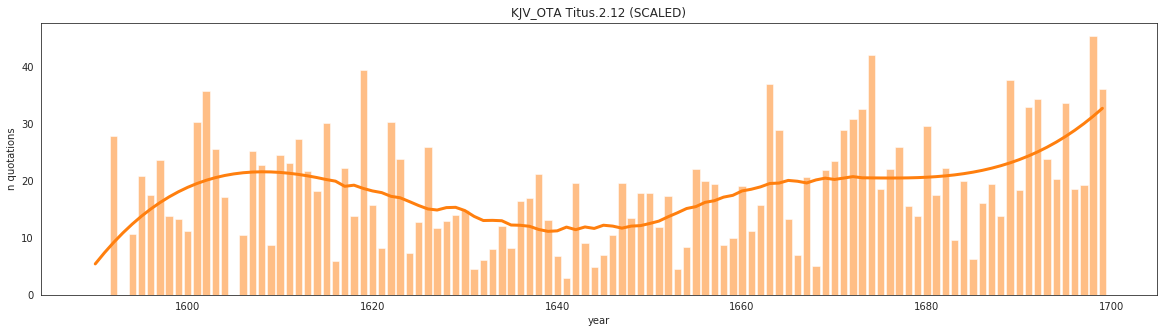

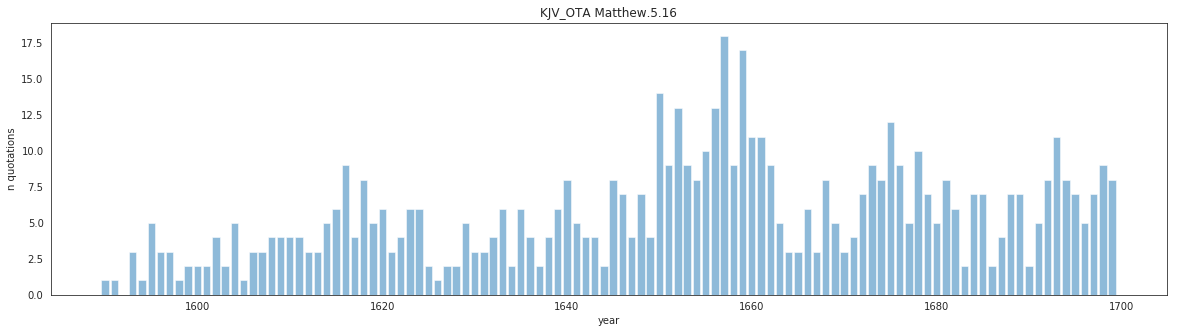

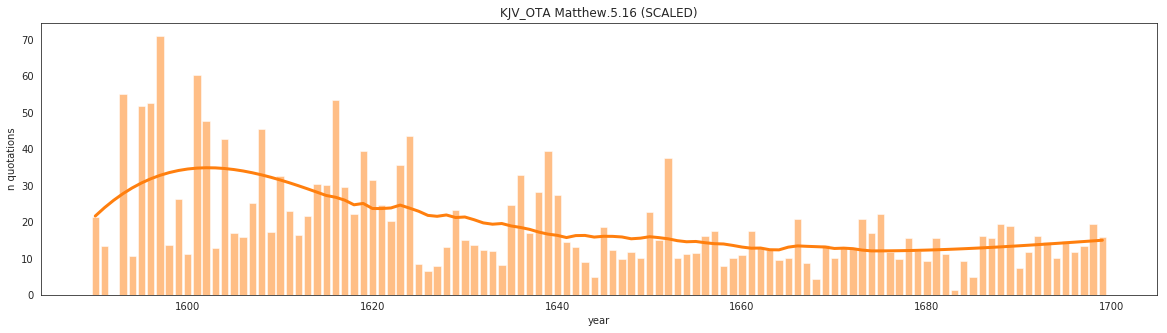

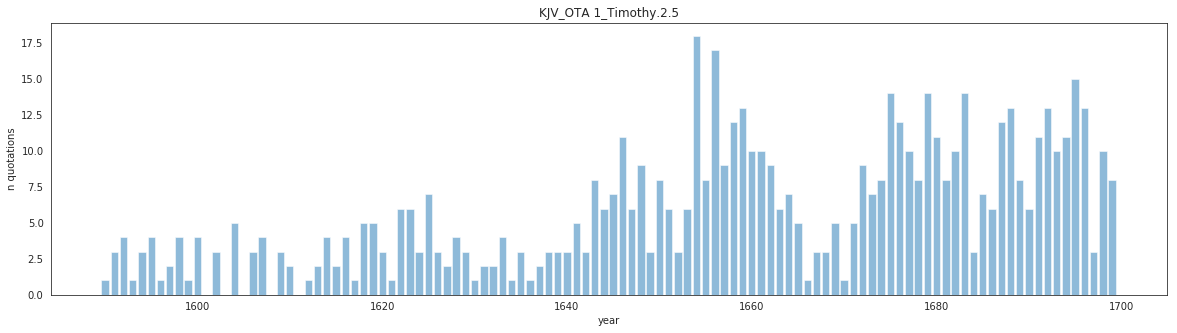

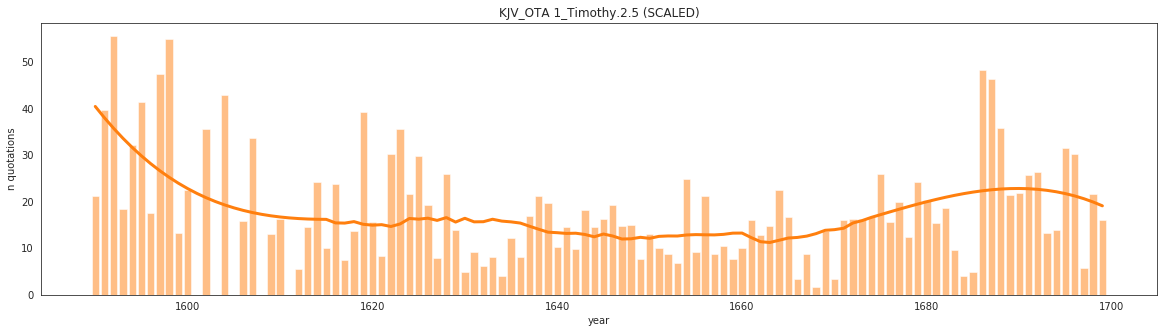

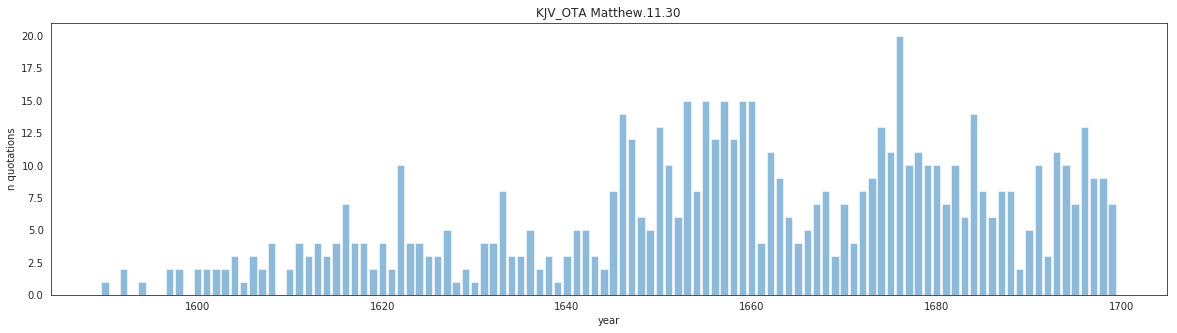

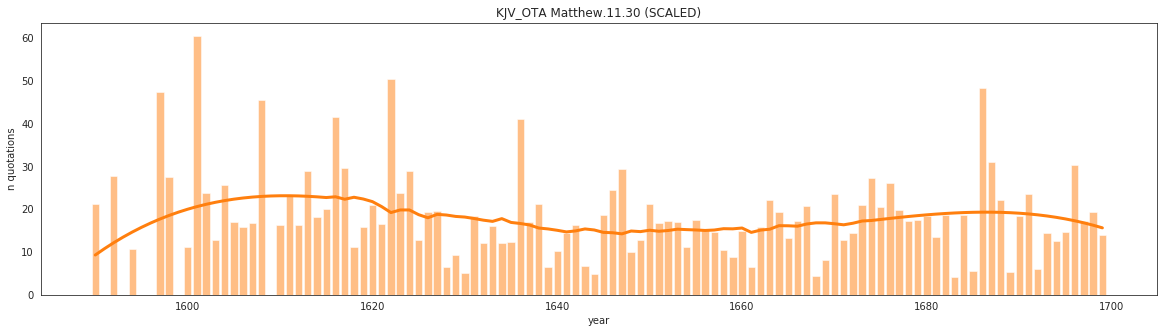

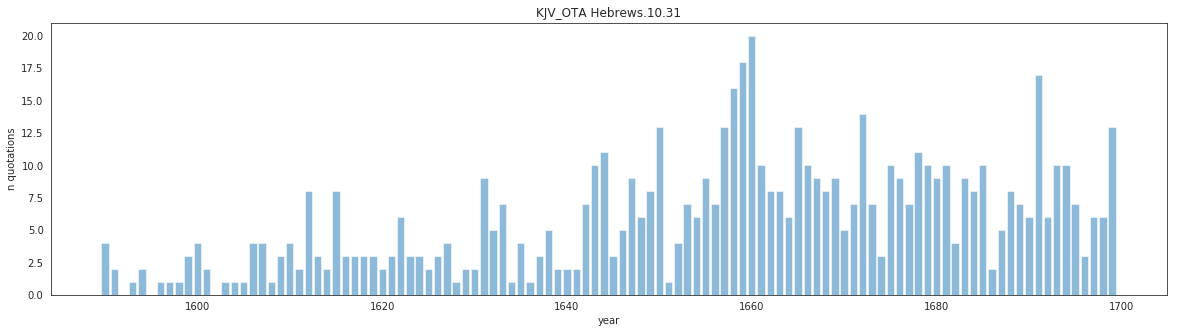

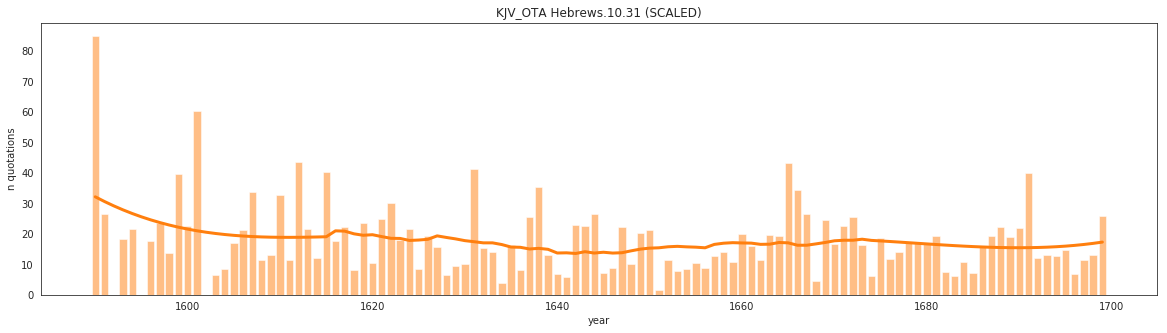

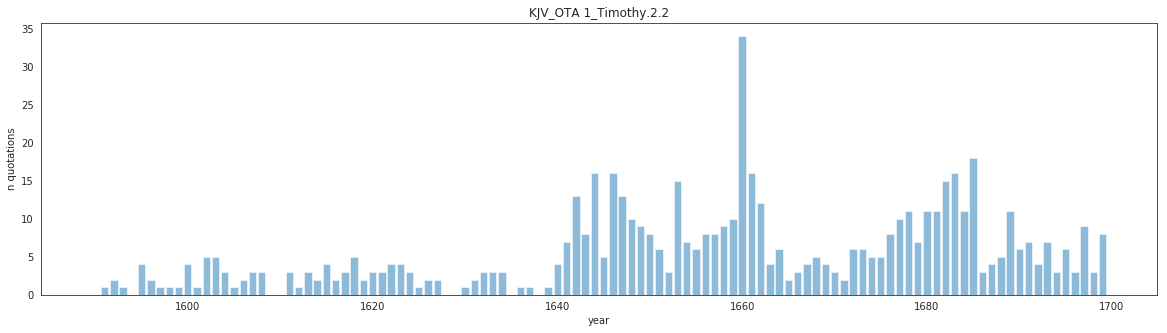

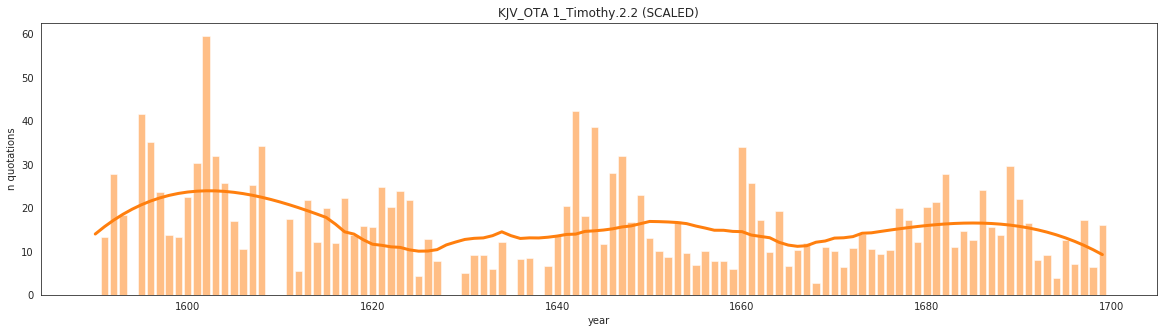

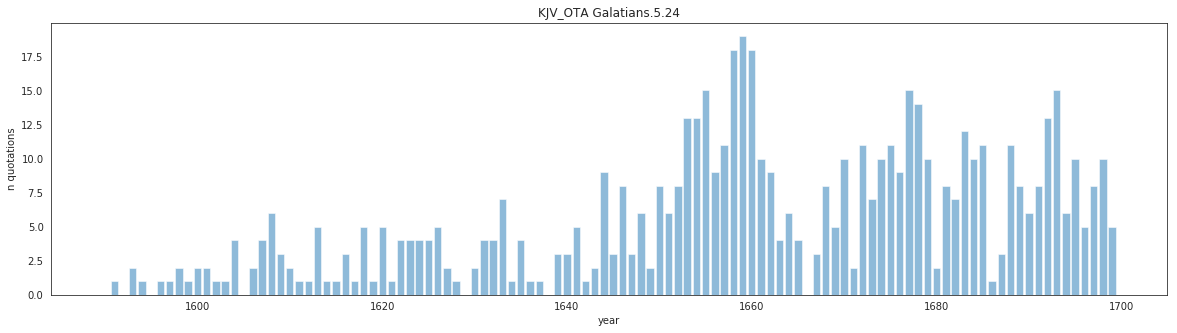

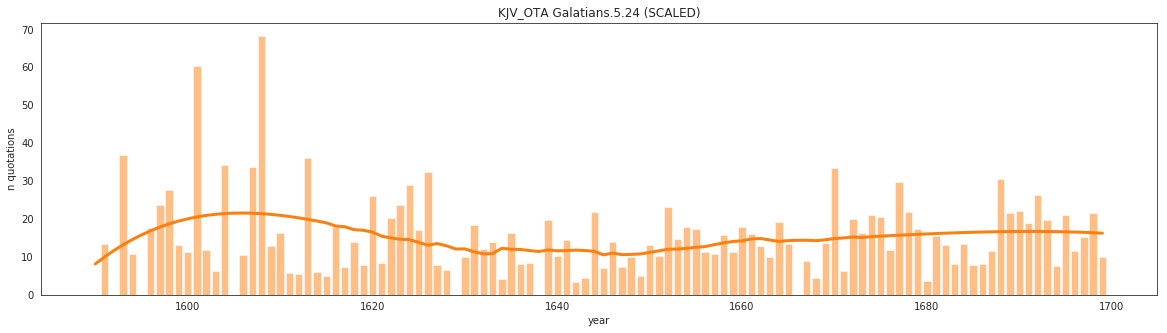

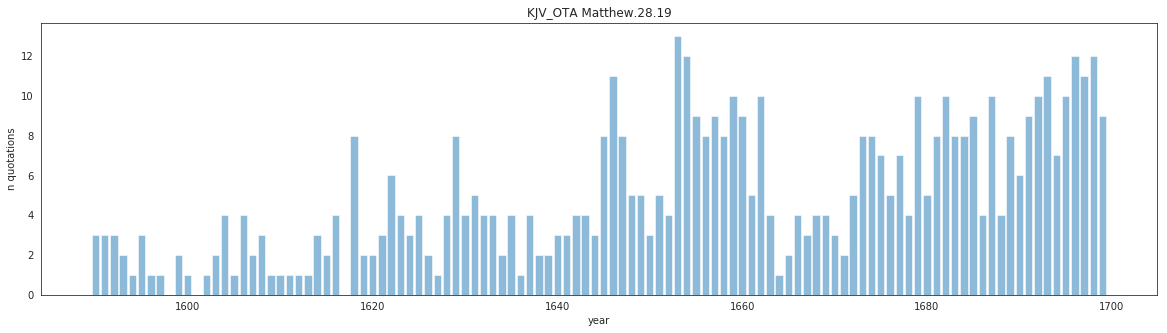

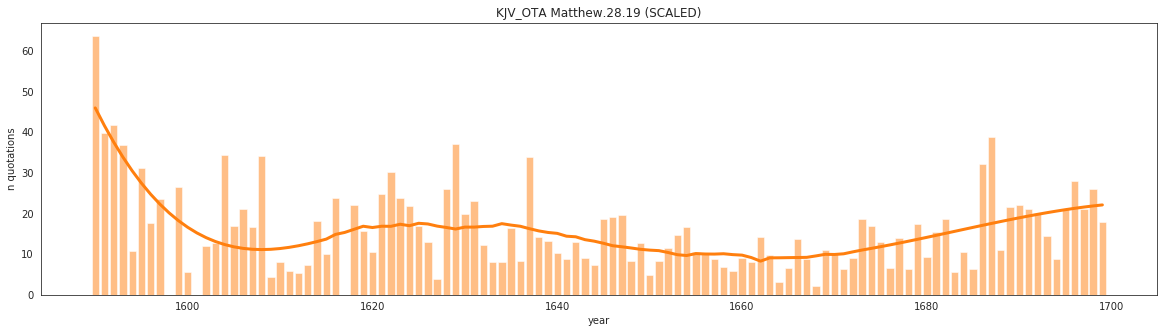

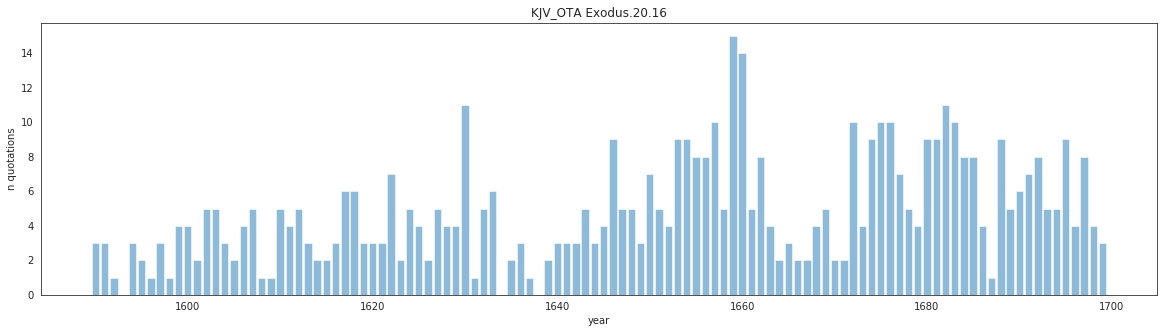

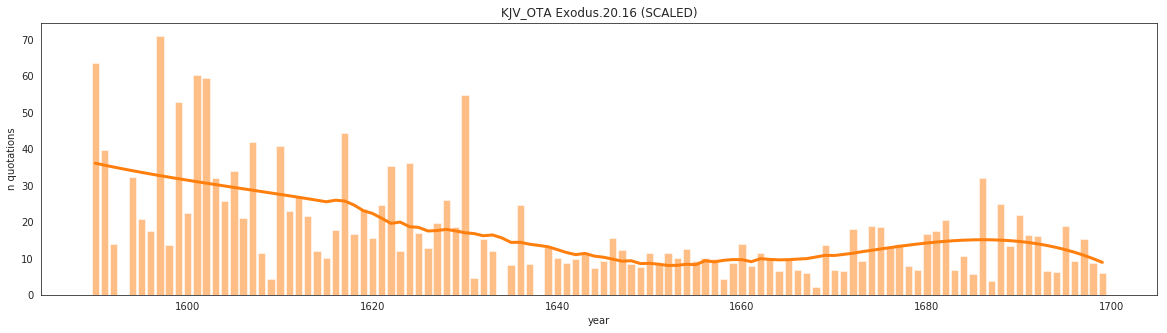

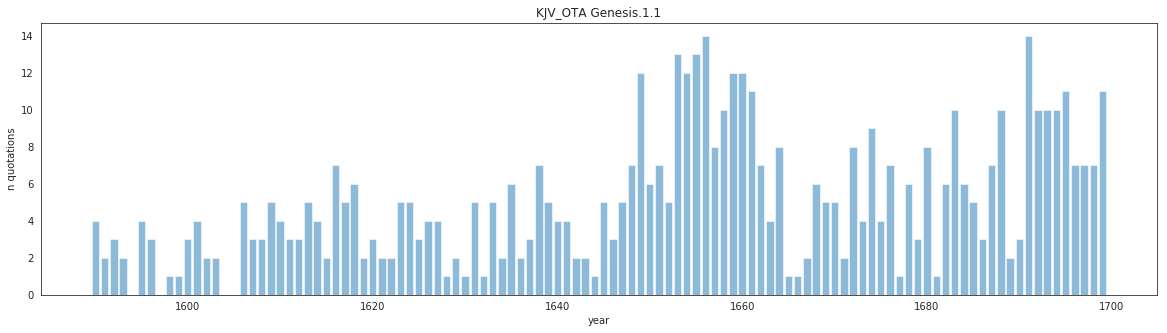

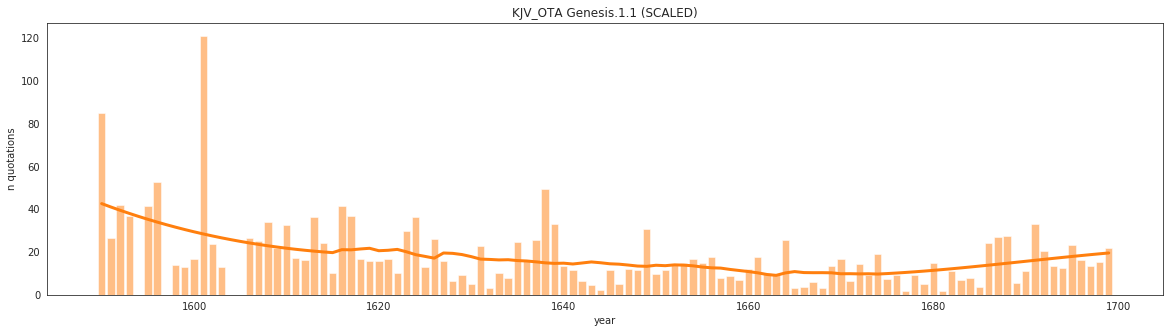

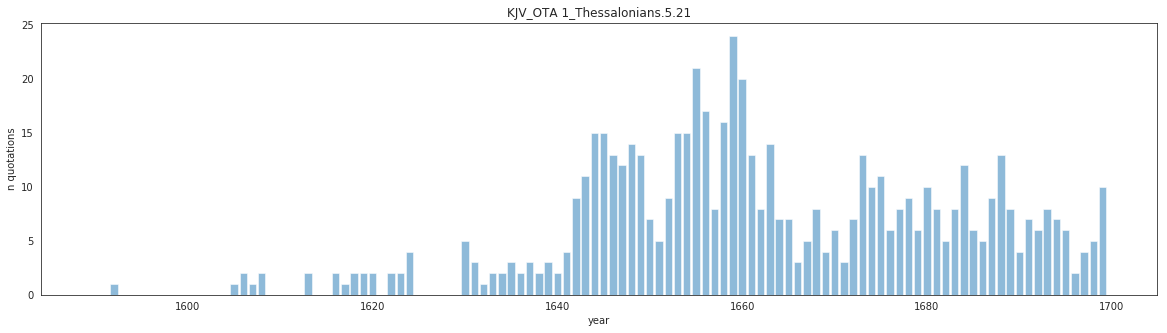

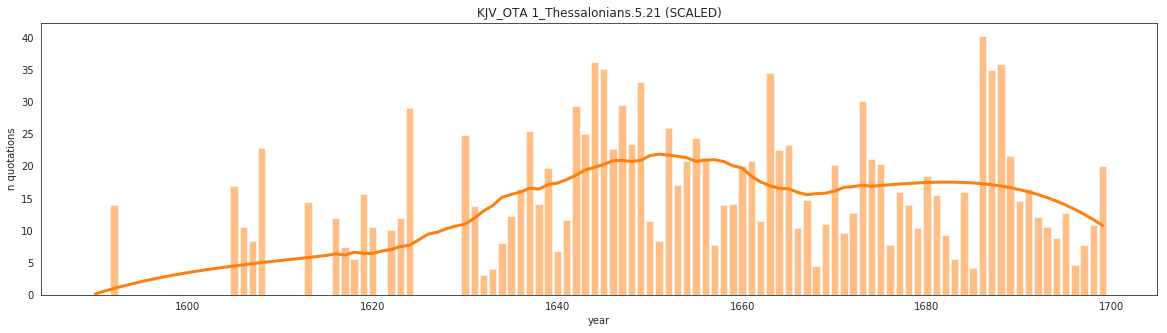

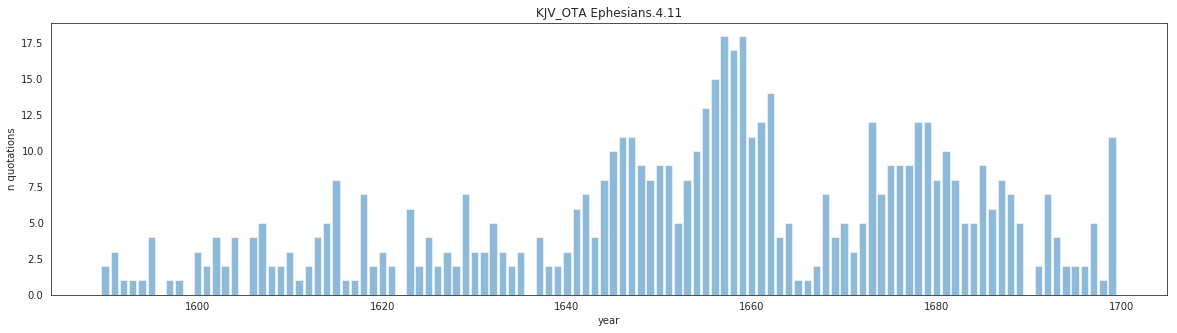

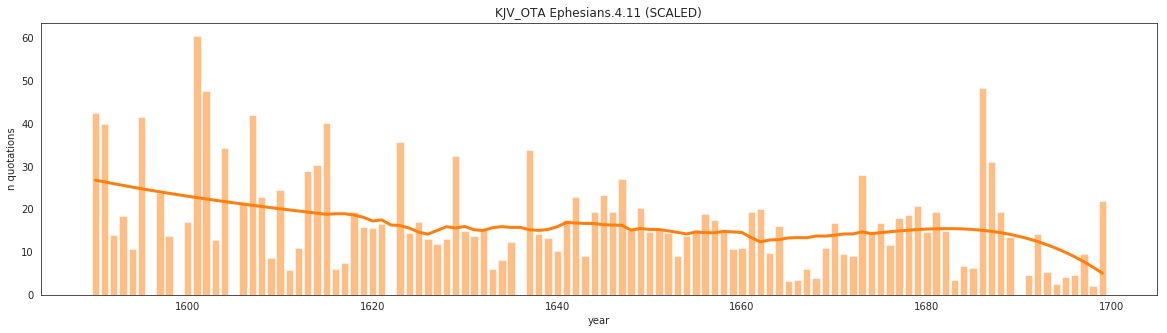

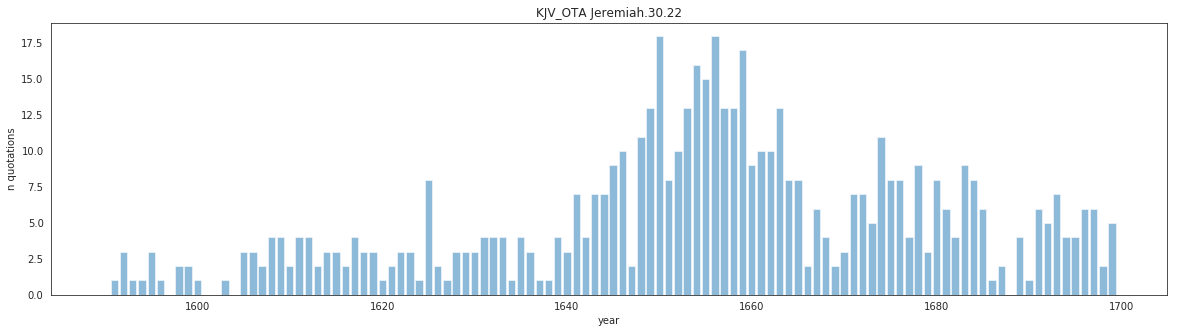

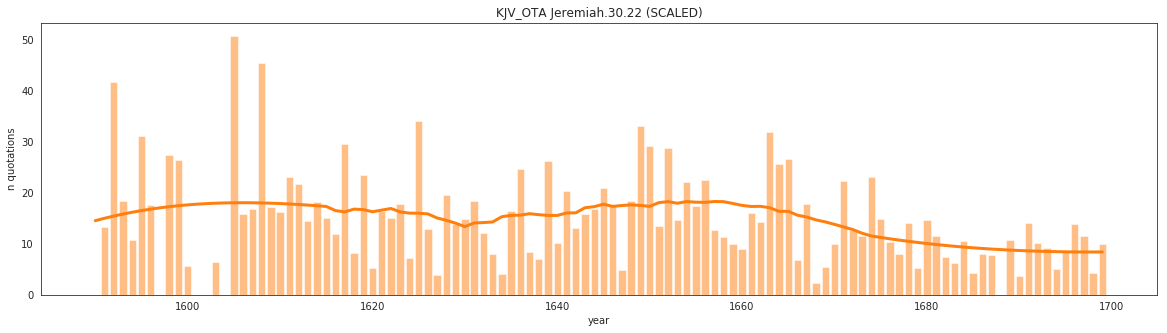

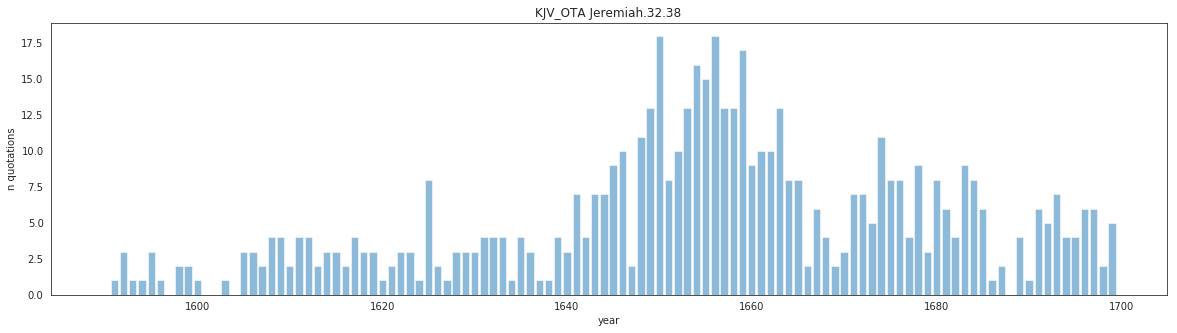

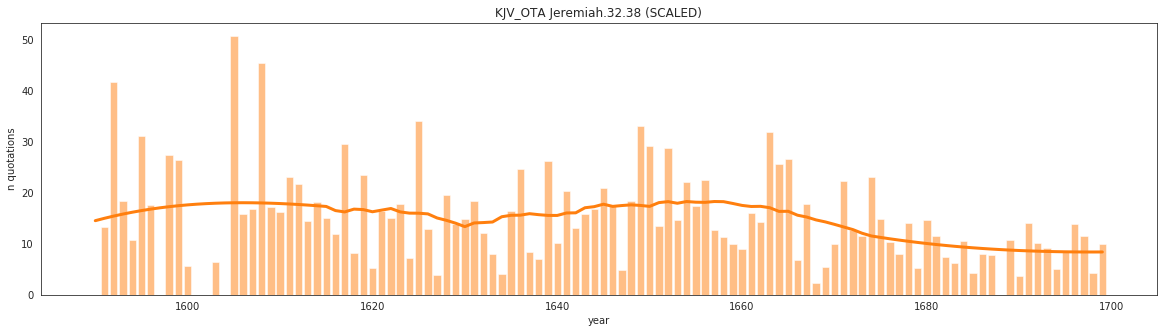

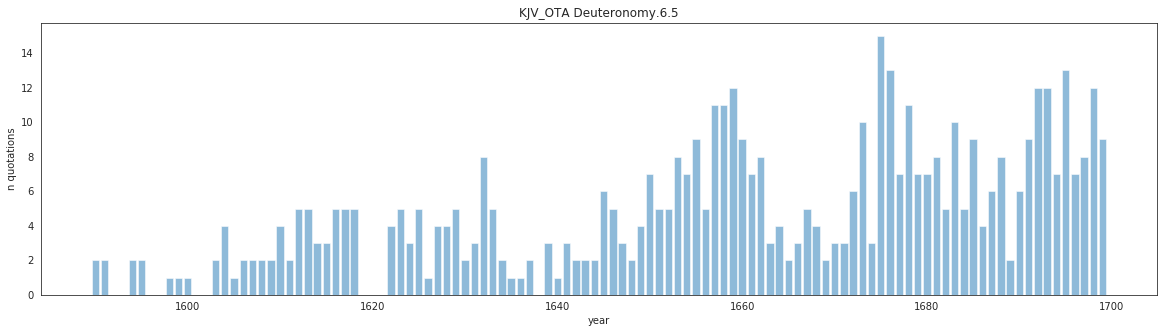

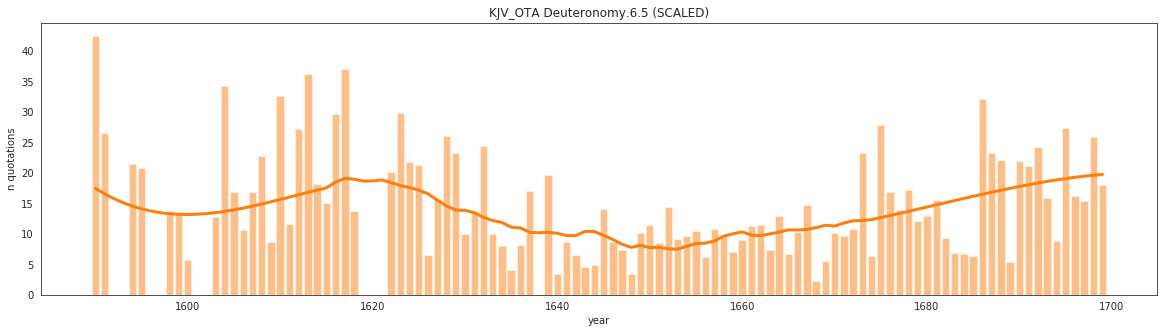

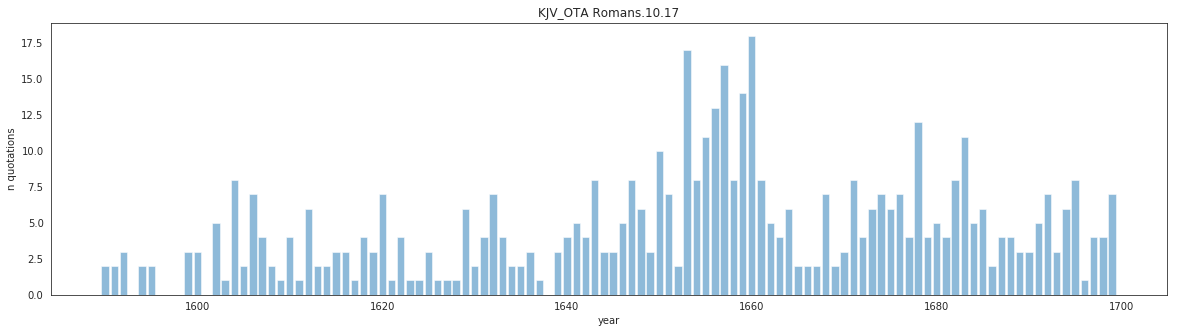

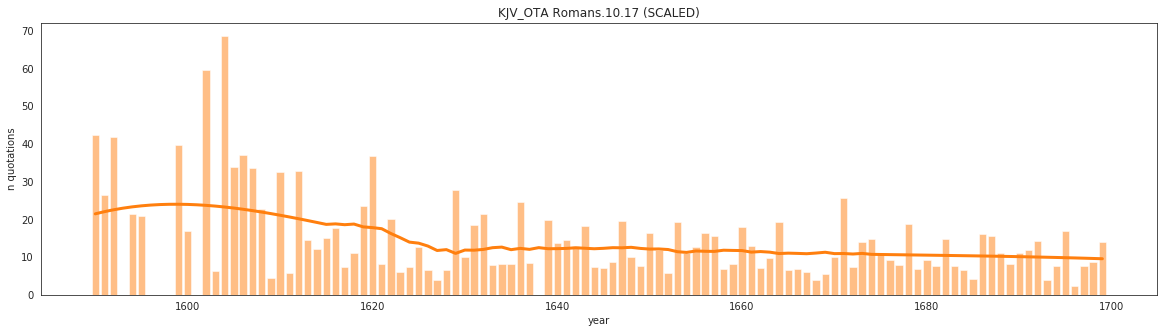

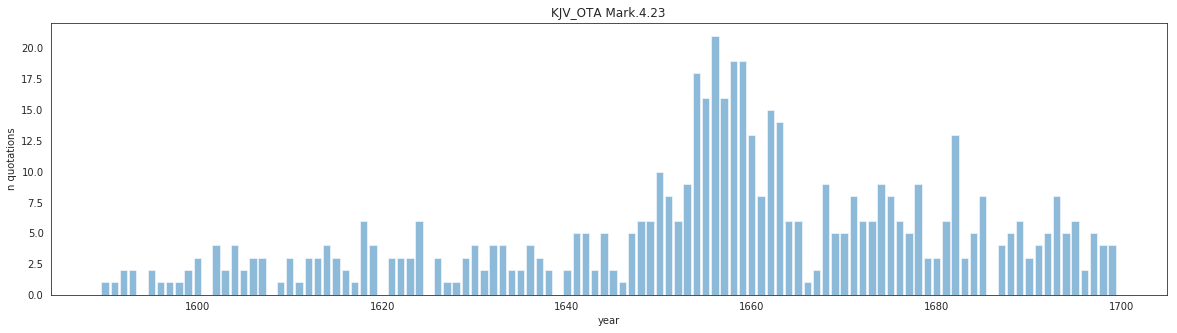

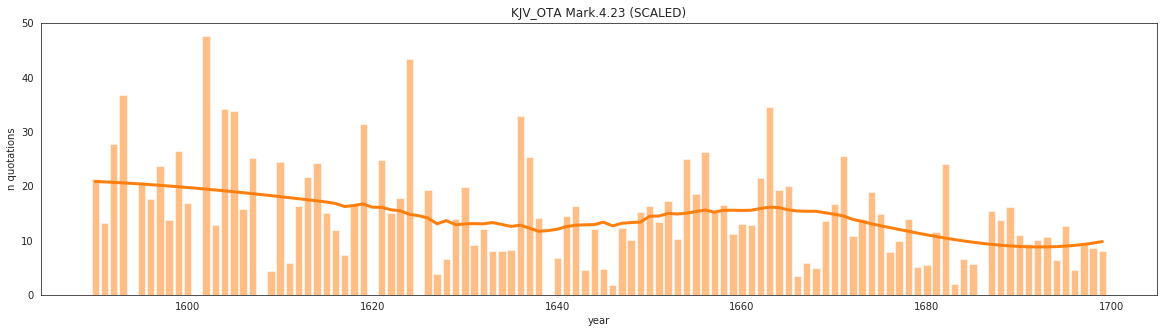

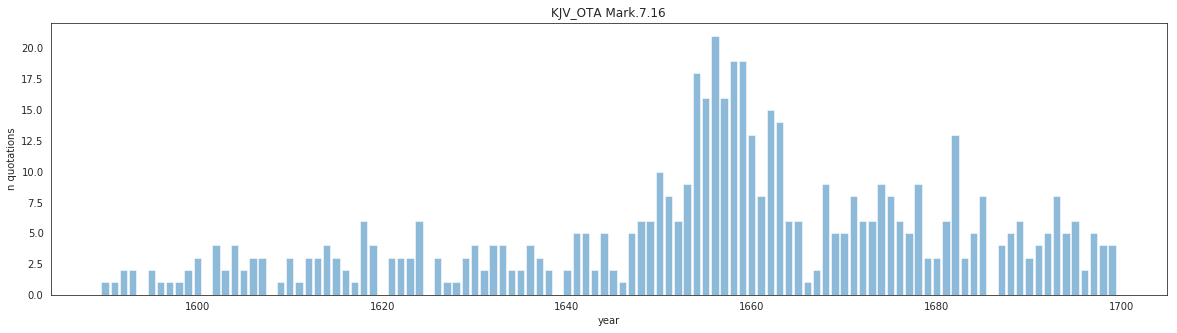

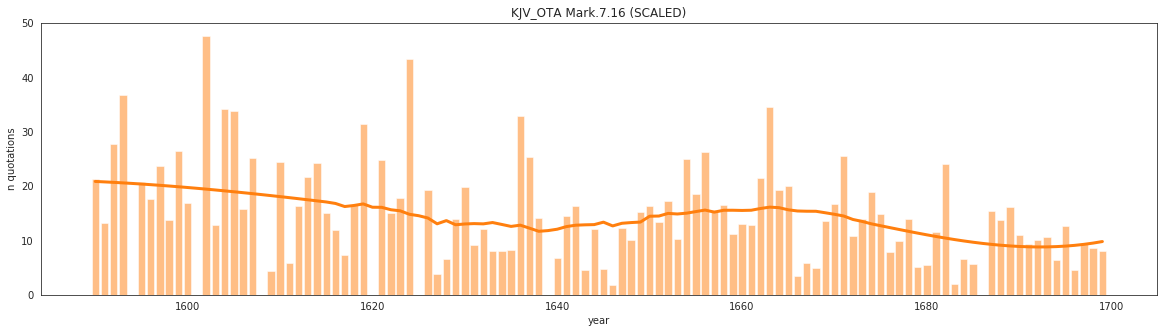

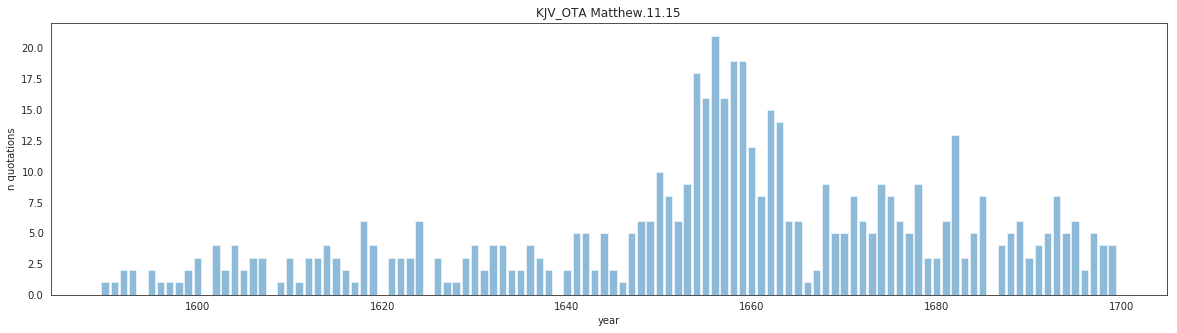

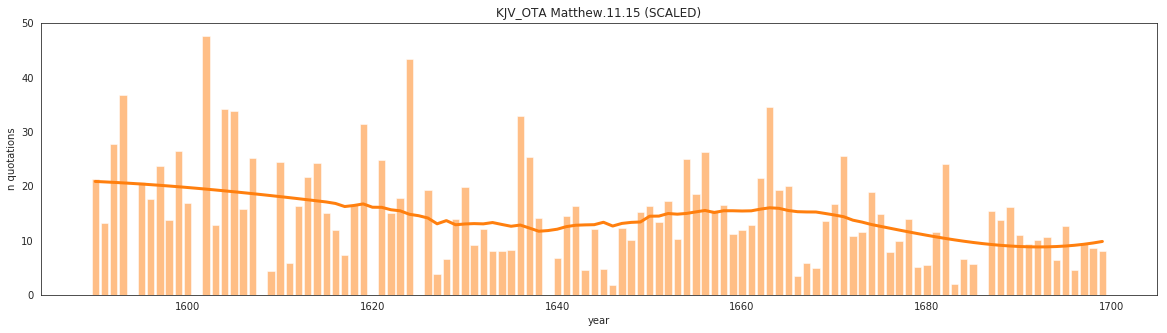

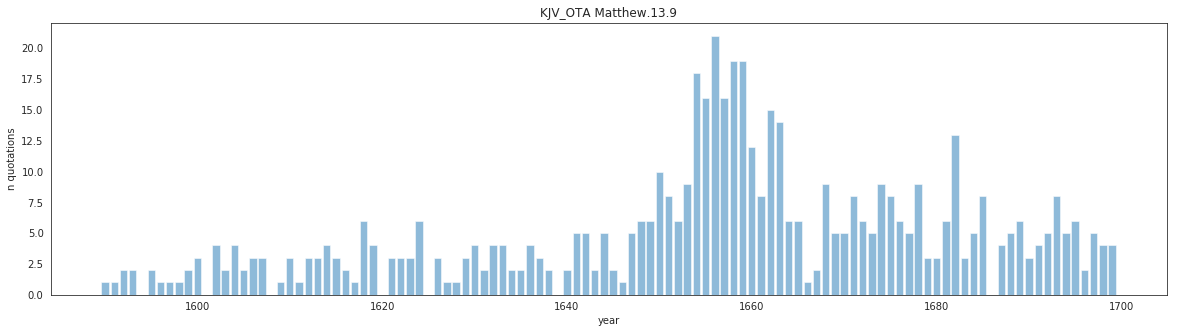

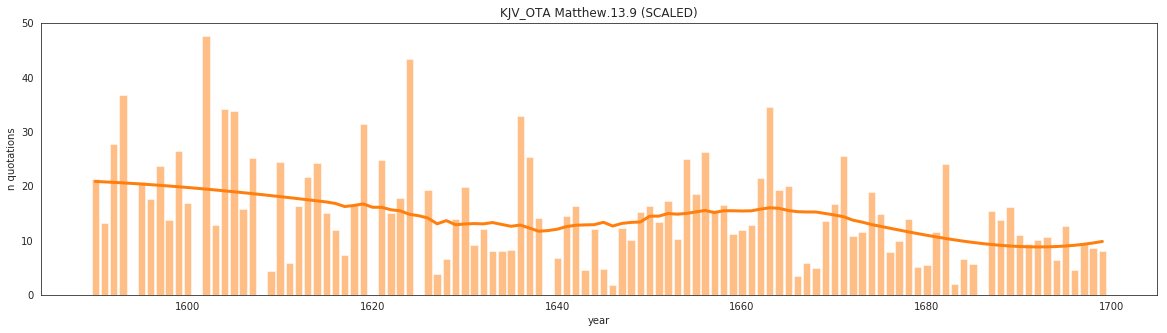

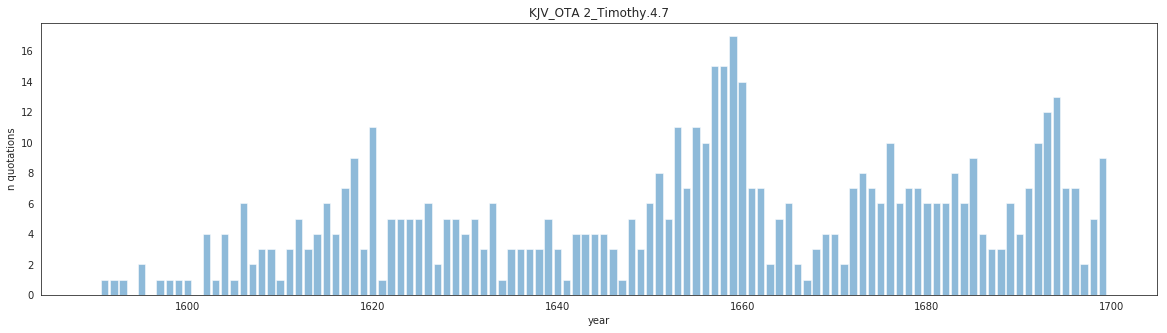

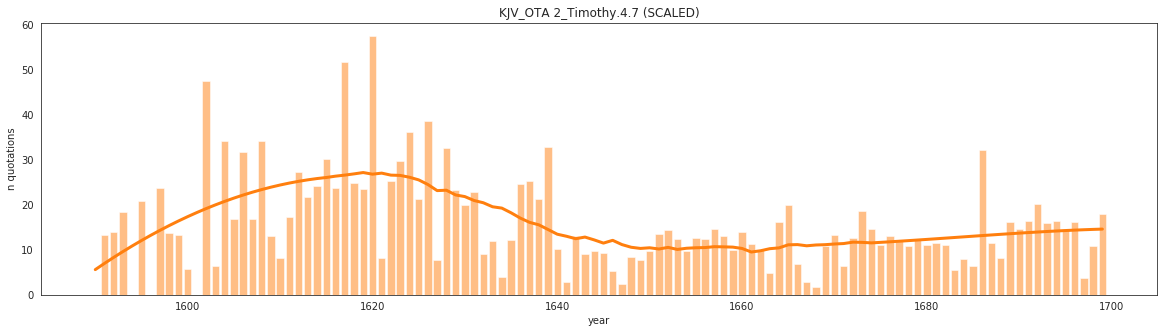

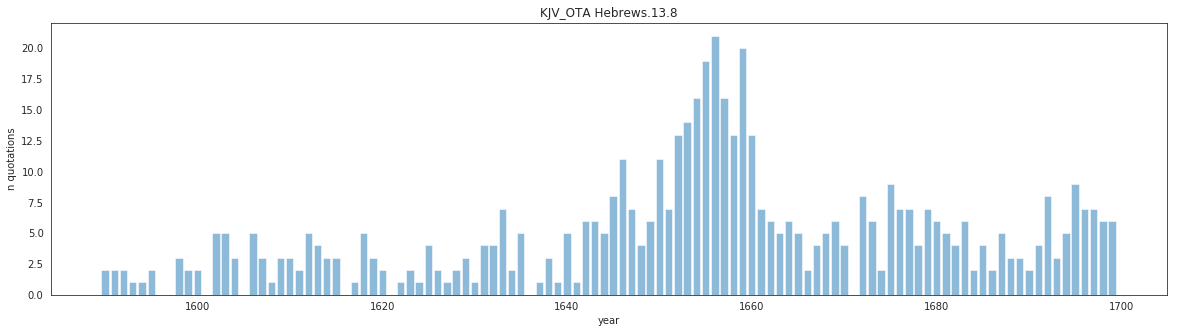

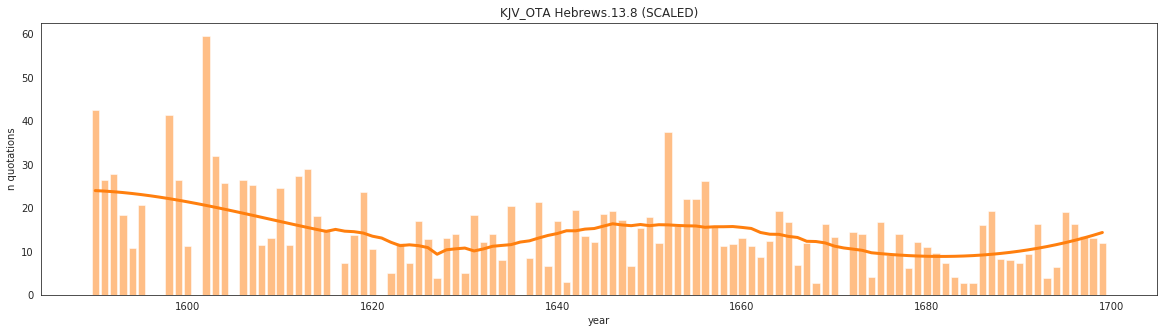

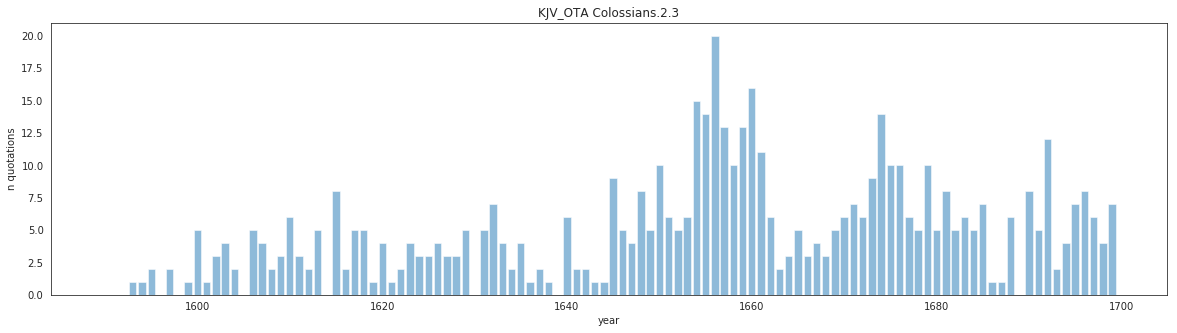

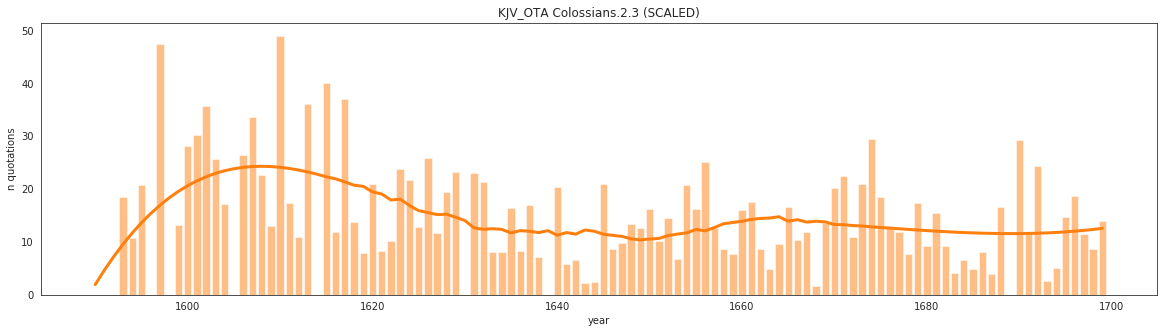

In [10]:
way_overquoted_verses = set(['1 Corinthians.16.23', '1 Corinthians.3.23', '1 Kings (3 Kings).17.2', 
'1 Kings (3 Kings).17.8', '1 Kings.17.2', '1 Kings.17.8', '1 Thessalonians.5.28',
'1_Corinthians.16.23', '1_Corinthians.3.23', '1_Kings.17.2', '1_Kings.17.8',
'1_Thessalonians.5.28', '2 Esdras.1.4', '2 Thessolonians.3.18',
'2_Thessalonians.3.18', 'Acts of the Apostles.13.30', 'Acts.13.30',
'Colossians.3.3', 'Deuteronomy.5.17', 'Ecclesiasticus.8.1', 'Ephesians.4.23',
'Ephesians.4.3', 'Ephesians.4.5', 'Ephesians.4.6', 'Exodus.13.1', 'Exodus.14.1',
'Exodus.16.11', 'Exodus.20.13', 'Exodus.20.14', 'Exodus.20.15', 'Exodus.20.3',
'Exodus.25.1', 'Exodus.30.11', 'Exodus.30.17', 'Exodus.31.1', 'Exodus.31.12',
'Exodus.40.1', 'Exodus.6.10', 'Ezechiel.11.14', 'Ezechiel.12.21',
'Ezechiel.13.1', 'Ezechiel.14.2', 'Ezechiel.15.1', 'Ezechiel.16.1',
'Ezechiel.17.1', 'Ezechiel.18.1', 'Ezechiel.21.1', 'Ezechiel.21.18',
'Ezechiel.21.8', 'Ezechiel.22.17', 'Ezechiel.22.23', 'Ezechiel.23.1',
'Ezechiel.25.1', 'Ezechiel.27.1', 'Ezechiel.28.1', 'Ezechiel.28.20',
'Ezechiel.30.1', 'Ezechiel.33.1', 'Ezechiel.33.23', 'Ezechiel.34.1',
'Ezechiel.37.15', 'Ezechiel.38.1', 'Ezechiel.6.1', 'Ezekiel.11.14',
'Ezekiel.12.21', 'Ezekiel.12.26', 'Ezekiel.13.1', 'Ezekiel.14.12',
'Ezekiel.14.2', 'Ezekiel.15.1', 'Ezekiel.16.1', 'Ezekiel.17.1', 'Ezekiel.18.1',
'Ezekiel.21.1', 'Ezekiel.21.-18', 'Ezekiel.21.8', 'Ezekiel.22.17',
'Ezekiel.22.23', 'Ezekiel.23.1', 'Ezekiel.25.1', 'Ezekiel.27.1', 'Ezekiel.28.1',
'Ezekiel.28.11', 'Ezekiel.28.20', 'Ezekiel.30.1', 'Ezekiel.33.1',
'Ezekiel.33.23', 'Ezekiel.34.1', 'Ezekiel.37.15', 'Ezekiel.38.1', 'Ezekiel.6.1',
'Galatians.1.5', 'Hebrews.12.29', 'Jeremiah.1.4', 'Jeremiah.13.8',
'Jeremiah.18.5', 'Jeremiah.24.4', 'John.14.15', 'John.15.12', 'INCLUDE ANYWAY John.3.16',
'INCLUDE ANYWAY John.6.56', 'Leviticus.12.1', 'Leviticus.14.1', 'Leviticus.17.1',
'Leviticus.18.1', 'Leviticus.19.1', 'Leviticus.20.1', 'Leviticus.21.16',
'Leviticus.22.1', 'Leviticus.22.17', 'Leviticus.22.26', 'Leviticus.23.1',
'Leviticus.23.23', 'Leviticus.23.26', 'Leviticus.23.33', 'Leviticus.23.9',
'Leviticus.24.1', 'Leviticus.24.13', 'Leviticus.27.1', 'Leviticus.4.1',
'Leviticus.5.14', 'Leviticus.6.1', 'Leviticus.6.19', 'Leviticus.6.24',
'Leviticus.6.8', 'Leviticus.7.22', 'Leviticus.7.28', 'Leviticus.8.1',
'Luke.1.75', 'Mark.10.36', 'Mark.13.37', 'Matthew.13.16', 'Matthew.16.15',
'Matthew.18.20', 'Matthew.22.14', 'Matthew.6.11', 'Numbers.1.48',
'Numbers.10.1', 'Numbers.13.1', 'Numbers.15.1', 'Numbers.15.17',
'Numbers.15.37', 'Numbers.16.23', 'Numbers.16.36', 'Numbers.16.44',
'Numbers.17.1', 'Numbers.18.25', 'Numbers.20.7', 'Numbers.25.10',
'Numbers.25.16', 'Numbers.26.52', 'Numbers.27.6', 'Numbers.28.1',
'Numbers.3.11', 'Numbers.3.44', 'Numbers.3.5', 'Numbers.31.1', 'Numbers.31.25',
'Numbers.34.1', 'Numbers.34.16', 'Numbers.35.9', 'Numbers.4.21', 'Numbers.5.1',
'Numbers.5.11', 'Numbers.5.5', 'Numbers.6.1', 'Numbers.6.22', 'Numbers.7.4',
'Numbers.8.1', 'Numbers.8.23', 'Numbers.8.5', 'Numbers.9.9', 'Philippians.4.23',
'Psalms.115.15', 'Revelation.22.21', 'Romans.16.24', 'Romans.2.6',
'Romans.7.24', 'Ruth.3.5', 'INCLUDE ANYWAY Titus.2.12', 'Zechariah.6.9'])
    
years_for_graph = []
    
for y in range(1590, 1700):
    years_for_graph.append(y)

# ------------------------------------------------------------------------------------

for tcp_id in ['A10675', 'A97378', 'KJV_OTA']:
    
    book_hash, verse_hash, year_hash, book_year_hash, verse_year_hash = get_data_for_graphs(tcp_id, 999999)
    
    verses_for_tcp_id = []
    
    for w in Counter(verse_hash).most_common():
        
        if w[0][0] == tcp_id and w[0][1] not in way_overquoted_verses:
            verses_for_tcp_id.append(w[0])
            if len(verses_for_tcp_id) == 25:
                break

    # ------------------------------------------------------------------------------------

    print()
    print(tcp_id)
    print()
    
    for verse in verses_for_tcp_id:
        
        print('\t', verse[1], verse_hash[verse])

# ------------------------------------------------------------------------------------

for tcp_id in ['A10675', 'A97378', 'KJV_OTA']:
    
    book_hash, verse_hash, year_hash, book_year_hash, verse_year_hash = get_data_for_graphs(tcp_id, 999999)
    
    verses_for_tcp_id = []
    
    for w in Counter(verse_hash).most_common():
        
        if w[0][0] == tcp_id and w[0][1] not in way_overquoted_verses:
            verses_for_tcp_id.append(w[0])
            if len(verses_for_tcp_id) == 25:
                break

    # ------------------------------------------------------------------------------------

    for verse in verses_for_tcp_id:
    
        raw_year_values_for_graph = []
        for year in years_for_graph:
            raw_year_values_for_graph.append(verse_year_hash[verse][year])

        graph_series(years_for_graph, raw_year_values_for_graph, ' '.join(verse), 'tab:blue')

        scaled_year_values_for_graph = []
        for a in range(0, len(years_for_graph)):
            scaled_year_values_for_graph.append(year_scale_factors[a] * raw_year_values_for_graph[a])

        graph_series(years_for_graph, 
                     scaled_year_values_for_graph, 
                     ' '.join(verse) + ' (SCALED)', 'tab:orange',
                     display_trend=True)
